In [1]:
import numpy as np
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', 0)

In [3]:
fight = pd.read_csv('Data/fight_table.csv')

In [4]:
fight['date_of_fight'] = pd.to_datetime(fight['date_of_fight'])
fight['digits'] = fight.apply(lambda row: re.findall("\d*\.*\d+", row['winner']), axis=1)
fight['Voted winner (%)'] = fight.apply(lambda row: row['digits'][0], axis=1)
fight['Voted rating'] = fight.apply(lambda row: row['digits'][1], axis=1)
del fight['digits']

In [5]:
fight = fight[fight['date_of_fight'] >= '2015-01-01']
fight = fight[fight['date_of_fight'] <= '2020-12-31']
fight.reset_index(drop = True, inplace=True)

In [6]:
fight.head()

date_of_fight  idk_column        player1_name player1_team  player2_name  \
0    2015-04-11  1 Pd 19:14        Eric Boulton          NYI  Dalton Prout   
1    2015-04-11  3 Pd 10:24         Tim Gleason          WAS  Tanner Glass   
2    2015-04-09  2 Pd 14:37       Alex Petrovic          FLA  Adam McQuaid   
3    2015-04-09  1 Pd 18:51  Vincent Lecavalier          PHI   Keegan Lowe   
4    2015-04-09   2 Pd 7:30     Brandon Manning          PHI   Brad Malone   

  player2_team                                             winner  \
0          CBJ  Voted winner: Dalton Prout (42.9%) - Voted rat...   
1          NYR  Voted winner: Tim Gleason (38.7%) - Voted rati...   
2          BOS  Voted winner: Adam McQuaid (61%) - Voted ratin...   
3          CAR  Voted winner: Keegan Lowe (88.3%) - Voted rati...   
4          CAR  Voted winner: Brandon Manning (75.6%) - Voted ...   

  Voted winner (%) Voted rating  
0             42.9         6.63  
1             38.7         7.59  
2               61          5.6  
3             88.3         6.33  
4             75.6         3.47

In [7]:
fight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_of_fight     1618 non-null   datetime64[ns]
 1   idk_column        1618 non-null   object        
 2   player1_name      1618 non-null   object        
 3   player1_team      1618 non-null   object        
 4   player2_name      1618 non-null   object        
 5   player2_team      1618 non-null   object        
 6   winner            1618 non-null   object        
 7   Voted winner (%)  1618 non-null   object        
 8   Voted rating      1618 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 113.9+ KB


In [8]:
fight.describe()

date_of_fight idk_column player1_name player1_team  \
count                  1618       1618         1618         1618   
unique                  679       1238          502           31   
top     2016-11-01 00:00:00  1 Pd 20:0  Cody McLeod          ANA   
freq                     12         11           33           80   
first   2015-01-02 00:00:00        NaN          NaN          NaN   
last    2020-03-11 00:00:00        NaN          NaN          NaN   

         player2_name player2_team  \
count            1618         1618   
unique            496           31   
top     Micheal Haley          ANA   
freq               30           91   
first             NaN          NaN   
last              NaN          NaN   

                                                   winner Voted winner (%)  \
count                                                1618             1618   
unique                                               1617              638   
top     Voted winner: Brad Marchand (89.6%) - Voted ra...               50   
freq                                                    2               33   
first                                                 NaN              NaN   
last                                                  NaN              NaN   

       Voted rating  
count          1618  
unique          534  
top            4.72  
freq             10  
first           NaN  
last            NaN

In [9]:
display(fight['player1_team'].unique())
print('Count:', fight['player1_team'].unique().size)

array(['NYI', 'WAS', 'FLA', 'PHI', 'EDM', 'SJS', 'OTT', 'BUF', 'STL',
       'TOR', 'VAN', 'MIN', 'PIT', 'BOS', 'WPG', 'CBJ', 'TBL', 'DET',
       'CAL', 'CAR', 'ANA', 'ARI', 'NJD', 'LAK', 'DAL', 'COL', 'NYR',
       'NSH', 'CHI', 'MON', 'VGK'], dtype=object)

Count: 31


In [10]:
display(fight['player2_team'].unique())
print('Count:', fight['player2_team'].unique().size)

array(['CBJ', 'NYR', 'BOS', 'CAR', 'LAK', 'NYI', 'DAL', 'WAS', 'ARI',
       'CHI', 'CAL', 'TBL', 'OTT', 'COL', 'MON', 'ANA', 'STL', 'MIN',
       'TOR', 'PHI', 'NSH', 'NJD', 'EDM', 'WPG', 'VAN', 'BUF', 'SJS',
       'DET', 'FLA', 'PIT', 'VGK'], dtype=object)

Count: 31


In [11]:
intersection = pd.Series(list(set(fight['player1_team']).intersection(set(fight['player2_team']))))
display(intersection.count())

31

In [12]:
match = pd.read_csv('Data/final_scrapped_data.csv')

In [13]:
match = match[match['date'] >= '2015-01-01']
match = match[match['date'] <= '2020-12-31']
match.reset_index(drop= True, inplace= True)

In [14]:
match['home_team'].unique()

array(['TOR', 'CHI', 'CGY', 'L.A', 'BOS', 'BUF', 'T.B', 'STL', 'NSH',
       'DAL', 'COL', 'N.J', 'CBJ', 'DET', 'NYI', 'FLA', 'NYR', 'WSH',
       'CAR', 'MIN', 'VAN', 'ARI', 'S.J', 'OTT', 'PHI', 'ANA', 'PIT',
       'MTL', 'EDM', 'WPG', 'VGK', 'KHI', 'AMERICAN ALL-STARS'],
      dtype=object)

In [15]:
mapping = {
    'CGY' : 'CAL',
    'L.A' : 'LAK',
    'N.J' : 'NJD',
    'S.J' : 'SJS',
    'T.B' : 'TBL',
    'WSH' : 'WAS',
    'MTL' : 'MON'
}
for idx, val in enumerate(match['home_team']):
    if val in mapping.keys():
        match.loc[idx, 'home_team'] = mapping[val]
    else:
        pass
for idx, val in enumerate(match['away_team']):
    if val in mapping.keys():
        match.loc[idx, 'away_team'] = mapping[val]
    else:
        pass
match = match[match['home_team'] != 'AMERICAN ALL-STARS']
match = match[match['home_team'] != 'KHI']
match = match[match['away_team'] != 'AMERICAN ALL-STARS']
match = match[match['away_team'] != 'KHI']
match.reset_index(drop= True, inplace=True)

In [16]:
match['date'] = pd.to_datetime(match['date'])

In [17]:
def categorise(row):
    
    for idx in range(fight.shape[0]):
        if ((fight.loc[idx, 'date_of_fight'] == row['date']) and \
            (fight.loc[idx, 'player1_team'] == row['home_team']) and \
            (fight.loc[idx, 'player2_team'] == row['away_team'])):
            return 1

match['fight'] = match.apply(lambda row: categorise(row), axis=1)
match['fight'] = match['fight'].fillna(0)

In [18]:
# for idx1 in range(fight.shape[0]):
#     for idx2 in range(match.shape[0]):
#         if((fight.loc[idx1, 'date_of_fight'] == match.loc[idx2, 'date']) and (fight.loc[idx1, 'player1_team'] == match.loc[idx2, 'date']) and (fight.loc[idx1, 'date_of_fight'] == match.loc[idx2, 'date'])):
#             match.loc[idx2, 'fight'] = 1
#         else:
#             match.loc[idx2, 'fight'] = 0

In [19]:
match.fight.value_counts()

0.0    5387
1.0    1188
Name: fight, dtype: int64

In [20]:
match.shape

(6575, 270)

In [21]:
match.head()

Unnamed: 0     game_id       date                  venue home_team  \
0           0  2015020001 2015-10-07      Air Canada Centre       TOR   
1           1  2015020002 2015-10-07          United Center       CHI   
2           2  2015020003 2015-10-07  Scotiabank Saddledome       CAL   
3           3  2015020004 2015-10-07         STAPLES Center       LAK   
4           4  2015020005 2015-10-08              TD Garden       BOS   

  away_team           start_time  home_score  away_score status  ...  \
0       MON  2015-10-07 23:00:00           1           3  Final  ...   
1       NYR  2015-10-08 00:00:00           2           3  Final  ...   
2       VAN  2015-10-08 02:00:00           1           5  Final  ...   
3       SJS  2015-10-08 02:30:00           1           5  Final  ...   
4       WPG  2015-10-08 23:00:00           2           6  Final  ...   

   away_xGA_Average_pk_TeamMoingAverage_40  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  away_xGA_Average_pk_TeamMoingAverage_5 away_Last_Game_Date  \
0                               0.034656          2015-10-03   
1                               0.047899          2015-09-30   
2                               0.044389          2015-10-03   
3                               0.041484          2015-10-03   
4                               0.043809          2015-10-03   

  away_Days_Since_Last_Game  away_B2B  home_Rating.A.Pre  away_Rating.A.Pre  \
0                    4 days       0.0            1447.52            1536.74   
1                    7 days       0.0            1560.23            1563.85   
2                    4 days       0.0            1508.62            1502.75   
3                    4 days       0.0                NaN                NaN   
4                    5 days       0.0            1540.28            1500.09   

  B2B_Status    Season  fight  
0    Neither  20152016    0.0  
1    Neither  20152016    0.0  
2    Neither  20152016    1.0  
3    Neither  20152016    1.0  
4    Neither  20152016    0.0  

[5 rows x 270 columns]

In [22]:
match['home_HDCF%'].replace('-', np.nan, inplace=True)
match['home_HDCF%'] = match['home_HDCF%'].astype('float64')
match['home_HDGF%'].replace('-', np.nan, inplace=True)
match['home_HDGF%'] = match['home_HDCF%'].astype('float64')
match['away_HDGF%'].replace('-', np.nan, inplace=True)
match['away_HDGF%'] = match['home_HDCF%'].astype('float64')

In [23]:
# match = match[['home_score', 'away_score', 'home_CF%', 'away_CF%', 'home_FF%', 'away_FF%', 'home_HDCF%', 'away_HDCF%', 'home_HDGF%', 'away_HDGF%', 'home_xGF_pp', 'away_xGF_pp', 'home_Rating.A.Pre', 'away_Rating.A.Pre', 'home_PDO', 'away_PDO', 'home_Attendance', 'fight']].copy()

In [24]:
def categorise(row):
    if row['home_score'] > row['away_score']:
        return 1
    else:
        return 0

match['home_team_won'] = match.apply(lambda row: categorise(row), axis=1)

In [25]:
def categorise(row):
    if row['home_score'] < row['away_score']:
        return 1
    else:
        return 0

match['away_team_won'] = match.apply(lambda row: categorise(row), axis=1)

In [26]:
subset_match = match[['fight', 'home_score', 'away_score', 'home_CF%', 'away_CF%', 'home_FF%',\
               'away_FF%', 'home_HDCF%', 'away_HDCF%', 'home_HDGF%', 'away_HDGF%',\
               'home_xGF_pp', 'away_xGF_pp', 'home_Rating.A.Pre', 'away_Rating.A.Pre',\
               'home_PDO', 'away_PDO', 'home_Attendance', 'home_team_won',\
               'away_team_won']].copy()

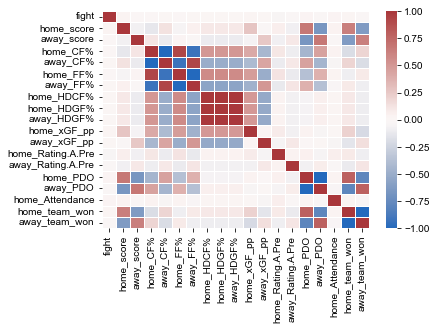

In [27]:
import seaborn as sns
sns.heatmap(subset_match.corr(), linewidths=1, cmap = 'vlag')
sns.set(rc = {'figure.figsize':(25,25)})
plt.show()

In [28]:
fight = match[match['fight'] == 1]

In [29]:
fight

Unnamed: 0     game_id       date                     venue home_team  \
2              2  2015020003 2015-10-07     Scotiabank Saddledome       CAL   
3              3  2015020004 2015-10-07            STAPLES Center       LAK   
7              7  2015020008 2015-10-08          Scottrade Center       STL   
20            20  2015020020 2015-10-10               BB&T Center       FLA   
26            26  2015020027 2015-10-10              Pepsi Center       COL   
...          ...         ...        ...                       ...       ...   
6411        1066  2019021061 2020-03-08             United Center       CHI   
6412        1067  2019021063 2020-03-08              Honda Center       ANA   
6416        1071  2019021067 2020-03-09            Bell MTS Place       WPG   
6425        1080  2019021076 2020-03-10  American Airlines Center       DAL   
6432        1087  2019021082 2020-03-11            STAPLES Center       LAK   

     away_team           start_time  home_score  away_score status  ...  \
2          VAN  2015-10-08 02:00:00           1           5  Final  ...   
3          SJS  2015-10-08 02:30:00           1           5  Final  ...   
7          EDM  2015-10-09 00:00:00           3           1  Final  ...   
20         PHI  2015-10-10 23:00:00           7           1  Final  ...   
26         DAL  2015-10-11 01:00:00           6           3  Final  ...   
...        ...                  ...         ...         ...    ...  ...   
6411       STL  2020-03-08 23:30:00           0           2  Final  ...   
6412       MIN  2020-03-09 01:00:00           4           5  Final  ...   
6416       ARI  2020-03-10 00:00:00           4           2  Final  ...   
6425       NYR  2020-03-11 00:30:00           2           4  Final  ...   
6432       OTT  2020-03-12 02:30:00           3           2  Final  ...   

      away_Last_Game_Date away_Days_Since_Last_Game away_B2B  \
2              2015-10-03                    4 days      0.0   
3              2015-10-03                    4 days      0.0   
7              2015-10-03                    5 days      0.0   
20             2015-10-08                    2 days      0.0   
26             2015-10-08                    2 days      0.0   
...                   ...                       ...      ...   
6411           2020-03-06                    2 days      0.0   
6412           2020-03-07                    1 days      1.0   
6416           2020-03-06                    3 days      0.0   
6425           2020-03-07                    3 days      0.0   
6432           2020-03-10                    1 days      1.0   

     home_Rating.A.Pre  away_Rating.A.Pre  B2B_Status    Season fight  \
2              1508.62            1502.75     Neither  20152016   1.0   
3                  NaN                NaN     Neither  20152016   1.0   
7              1531.65            1428.31     Neither  20152016   1.0   
20             1475.72            1495.72     Neither  20152016   1.0   
26             1496.31            1514.89     Neither  20152016   1.0   
...                ...                ...         ...       ...   ...   
6411           1484.79            1557.97     Neither  20192020   1.0   
6412           1444.24            1501.38   Away_only  20192020   1.0   
6416           1520.79            1493.08     Neither  20192020   1.0   
6425           1528.46            1495.97     Neither  20192020   1.0   
6432               NaN            1423.55   Away_only  20192020   1.0   

      home_team_won  away_team_won  
2                 0              1  
3                 0              1  
7                 1              0  
20                1              0  
26                1              0  
...             ...            ...  
6411              0              1  
6412              0              1  
6416              1              0  
6425              0              1  
6432              1              0  

[1188 rows x 272 columns]

In [30]:
match

Unnamed: 0     game_id       date                  venue home_team  \
0              0  2015020001 2015-10-07      Air Canada Centre       TOR   
1              1  2015020002 2015-10-07          United Center       CHI   
2              2  2015020003 2015-10-07  Scotiabank Saddledome       CAL   
3              3  2015020004 2015-10-07         STAPLES Center       LAK   
4              4  2015020005 2015-10-08              TD Garden       BOS   
...          ...         ...        ...                    ...       ...   
6570        1225  2019030412 2020-09-21           Rogers Place       TBL   
6571        1226  2019030413 2020-09-23           Rogers Place       DAL   
6572        1227  2019030414 2020-09-25           Rogers Place       DAL   
6573        1228  2019030415 2020-09-26           Rogers Place       TBL   
6574        1229  2019030416 2020-09-28           Rogers Place       DAL   

     away_team           start_time  home_score  away_score status  ...  \
0          MON  2015-10-07 23:00:00           1           3  Final  ...   
1          NYR  2015-10-08 00:00:00           2           3  Final  ...   
2          VAN  2015-10-08 02:00:00           1           5  Final  ...   
3          SJS  2015-10-08 02:30:00           1           5  Final  ...   
4          WPG  2015-10-08 23:00:00           2           6  Final  ...   
...        ...                  ...         ...         ...    ...  ...   
6570       DAL  2020-09-22 00:00:00           3           2  Final  ...   
6571       TBL  2020-09-24 00:00:00           2           5  Final  ...   
6572       TBL  2020-09-26 00:00:00           4           5  Final  ...   
6573       DAL  2020-09-27 00:00:00           2           3  Final  ...   
6574       TBL  2020-09-29 00:00:00           0           2  Final  ...   

      away_Last_Game_Date away_Days_Since_Last_Game away_B2B  \
0              2015-10-03                    4 days      0.0   
1              2015-09-30                    7 days      0.0   
2              2015-10-03                    4 days      0.0   
3              2015-10-03                    4 days      0.0   
4              2015-10-03                    5 days      0.0   
...                   ...                       ...      ...   
6570           2020-09-19                    2 days      0.0   
6571           2020-09-21                    2 days      0.0   
6572           2020-09-23                    2 days      0.0   
6573           2020-09-25                    1 days      1.0   
6574           2020-09-26                    2 days      0.0   

     home_Rating.A.Pre  away_Rating.A.Pre  B2B_Status    Season fight  \
0              1447.52            1536.74     Neither  20152016   0.0   
1              1560.23            1563.85     Neither  20152016   0.0   
2              1508.62            1502.75     Neither  20152016   1.0   
3                  NaN                NaN     Neither  20152016   1.0   
4              1540.28            1500.09     Neither  20152016   0.0   
...                ...                ...         ...       ...   ...   
6570               NaN            1544.11     Neither  20192020   0.0   
6571           1541.14                NaN     Neither  20192020   0.0   
6572           1535.57                NaN     Neither  20192020   0.0   
6573               NaN            1532.77        Both  20192020   0.0   
6574           1537.26                NaN     Neither  20192020   0.0   

      home_team_won  away_team_won  
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              1  
...             ...            ...  
6570              1              0  
6571              0              1  
6572              0              1  
6573              0              1  
6574              0              1  

[6575 rows x 272 columns]

In [31]:
# final_dataframe = pd.DataFrame()

In [32]:
# fight_index = set(fight[(fight['home_team'] == 'LAK') | (fight['away_team'] == 'LAK')].index)
# match_index = match[(match['home_team'] == 'LAK') | (match['away_team'] == 'LAK')].index

In [33]:
# fight_index
# len(match_index)

In [34]:
# for val in match_index:
#     print(val)

In [35]:
# two_matches = []

# for idx in range(len(match_index)):
#     print(idx)
#     if match_index[idx] in fight_index:
#         two_matches.append(match_index[idx])
#         if idx+1 < len(match_index):
#             two_matches.append(match_index[idx+1])
#         if idx+2 < len(match_index):
#             two_matches.append(match_index[idx+2])
#     else:
#         pass

In [36]:
# two_matches

In [37]:
# final_dataframe.append(match.loc[match.index[two_matches]])

In [38]:
# final_dataframe = pd.DataFrame()
# teams = list(fight['home_team'].unique())

# for team in teams:
#     fight_index = set(fight[(fight['home_team'] == team) | (fight['away_team'] == team)].index)
#     match_index = match[(match['home_team'] == team) | (match['away_team'] == team)].index
#     two_matches = []
#     for idx in range(len(match_index)):
#         if match_index[idx] in fight_index:
#             two_matches.append(match_index[idx])
#             if idx+1 < len(match_index):
#                 two_matches.append(match_index[idx+1])
#             if idx+2 < len(match_index):
#                 two_matches.append(match_index[idx+2])
#         else:
#             pass
#     df = match.loc[match.index[two_matches]]
#     df = df[['fight', 'home_score', 'away_score', 'home_CF%', 'away_CF%', 'home_FF%',\
#             'away_FF%', 'home_HDCF%', 'away_HDCF%', 'home_HDGF%', 'away_HDGF%',\
#             'home_xGF_pp', 'away_xGF_pp', 'home_Rating.A.Pre', 'away_Rating.A.Pre',\
#             'home_PDO', 'away_PDO', 'home_Attendance', 'home_team_won',\
#             'away_team_won']].copy()
#     print('Team Name:', team)
#     sns.heatmap(df.corr(), linewidths=1, cmap = 'vlag')
#     sns.set(rc = {'figure.figsize':(25,25)})
#     plt.show()
#     final_dataframe = final_dataframe.append(df, ignore_index = True)

In [39]:
# final_dataframe = final_dataframe[['fight', 'home_score', 'away_score', 'home_CF%', 'away_CF%', 'home_FF%',\
#                'away_FF%', 'home_HDCF%', 'away_HDCF%', 'home_HDGF%', 'away_HDGF%',\
#                'home_xGF_pp', 'away_xGF_pp', 'home_Rating.A.Pre', 'away_Rating.A.Pre',\
#                'home_PDO', 'away_PDO', 'home_Attendance', 'home_team_won',\
#                'away_team_won']].copy()

In [40]:
# sns.heatmap(final_dataframe.corr(), linewidths=1, cmap = 'vlag')
# sns.set(rc = {'figure.figsize':(25,25)})
# plt.show()

In [41]:
# df = pd.DataFrame()

In [42]:
# fight_index = set(fight[(fight['home_team'] == 'TOR') | (fight['away_team'] == 'TOR')].index)
# match_index = match[(match['home_team'] == 'TOR') | (match['away_team'] == 'TOR')].index

# # print(fight_index)
# # print(match_index)
# for idx in range(len(match_index)):
#     two_matches = []
#     l = []
#     df_merge = pd.DataFrame()
#     if match_index[idx] in fight_index:
# #         print(match_index[idx])
#         two_matches.append(match_index[idx])
#         s1 = match.iloc[match_index[idx], :]
#         s1 = s1.add_suffix('_1')
#         s1.columns = '1_' + s1.columns
#         if idx+1 < len(match_index):
#             two_matches.append(match_index[idx+1])
#             s2 = match.iloc[match_index[idx+1], :]
#             s2 = s2.add_suffix('_2')
# #             s2.columns = '2_' + s1.columns
#             df_merge = pd.concat([s1,s2],axis=1)
#         if idx+2 < len(match_index):
#             two_matches.append(match_index[idx+2])
#             s3 = match.iloc[match_index[idx+2], :]
#             df_merge = pd.concat([df_merge,s3],axis=1)
#         df_merge = df_merge.T
# #         count = 0
# #         df_merge_t = df_merge.notnull()
# #         for idx1 in range(df_merge.shape[0]):
# #             for idx2 in range(df_merge.shape[1]):
# #                 if df_merge_t.iloc[idx1, idx2] == True:
# #                     count = count + 1
#         display(df_merge)
#         df = df.append((df_merge), ignore_index=True)
#         print(two_matches)

In [43]:
# fight_index = set(fight[(fight['home_team'] == 'TOR') | (fight['away_team'] == 'TOR')].index)
# match_index = match[(match['home_team'] == 'TOR') | (match['away_team'] == 'TOR')].index



# # fight_index
# for idx in range(len(match_index)):
#     two_matches = []
#     l = []
#     df_merge = pd.DataFrame()
#     if match_index[idx] in fight_index:
#         two_matches.append(match_index[idx])
#         s1 = match.iloc[match_index[idx], :]
#         s1 = s1.add_suffix('_1')
#         display(s1)
# #         s1.columns = '1_' + s1.columns
#         if idx+1 < len(match_index):
#             two_matches.append(match_index[idx+1])
#             s2 = match.iloc[match_index[idx+1], :]
#             s2 = s2.add_suffix('_2')
# #             s2.columns = '2_' + s1.columns
#             df_merge = pd.concat([s1,s2],axis=1)
#         if idx+2 < len(match_index):
#             two_matches.append(match_index[idx+2])
#             s3 = match.iloc[match_index[idx+2], :]
#             df_merge = pd.concat([df_merge,s3],axis=1)
#         df_merge = df_merge.T
# #         count = 0
# #         df_merge_t = df_merge.notnull()
# #         for idx1 in range(df_merge.shape[0]):
# #             for idx2 in range(df_merge.shape[1]):
# #                 if df_merge_t.iloc[idx1, idx2] == True:
# #                     count = count + 1
#         display(df_merge)
#         df = df.append((df_merge), ignore_index=True)
# #         print(two_matches)

In [44]:
features = ['fight_1', 'fight_2', 'fight','home_score_2', 'home_score_1', \
            'home_score', 'home_CF%_2', 'home_CF%_1', 'home_CF%','home_FF%_2', \
            'home_FF%_1', 'home_FF%', 'home_HDCF%_2', 'home_HDCF%_1', 'home_HDCF%', \
            'home_HDGF%_2', 'home_HDGF%_1', 'home_HDGF%','home_PDO_2', 'home_PDO_1', \
            'home_PDO', 'home_Attendance_2', 'home_Attendance_1', \
            'home_Attendance', 'home_team_won_2', 'home_team_won_1', 'home_team_won', \
            'home_score_2', 'home_score_1', 'home_score', \
            'home_xGF_pp_2', 'home_xGF_pp_1', 'home_xGF_pp',  'home_Rating.A.Pre_2',\
            'home_Rating.A.Pre_1', 'home_Rating.A.Pre', 'home_PDO_2', 'home_PDO_1', \
            'home_PDO']

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: CAL


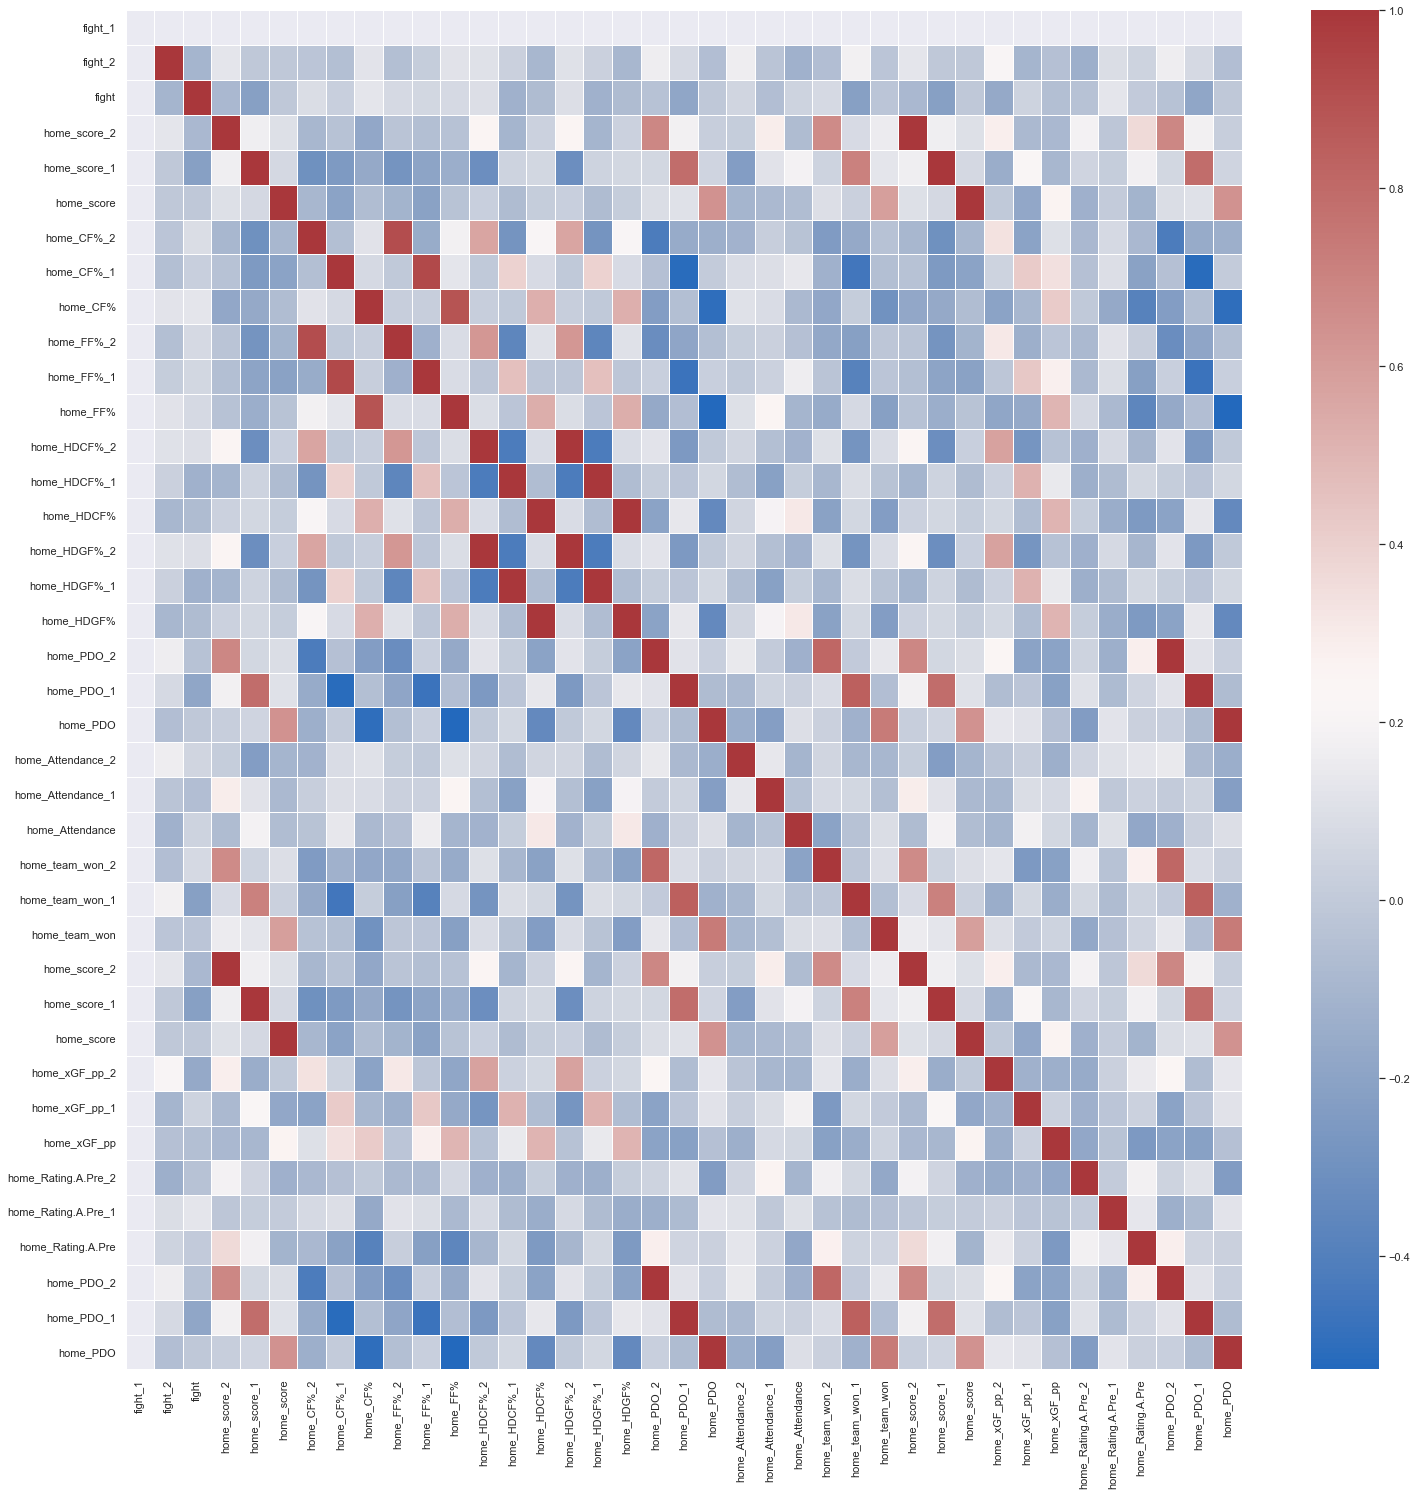

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: LAK


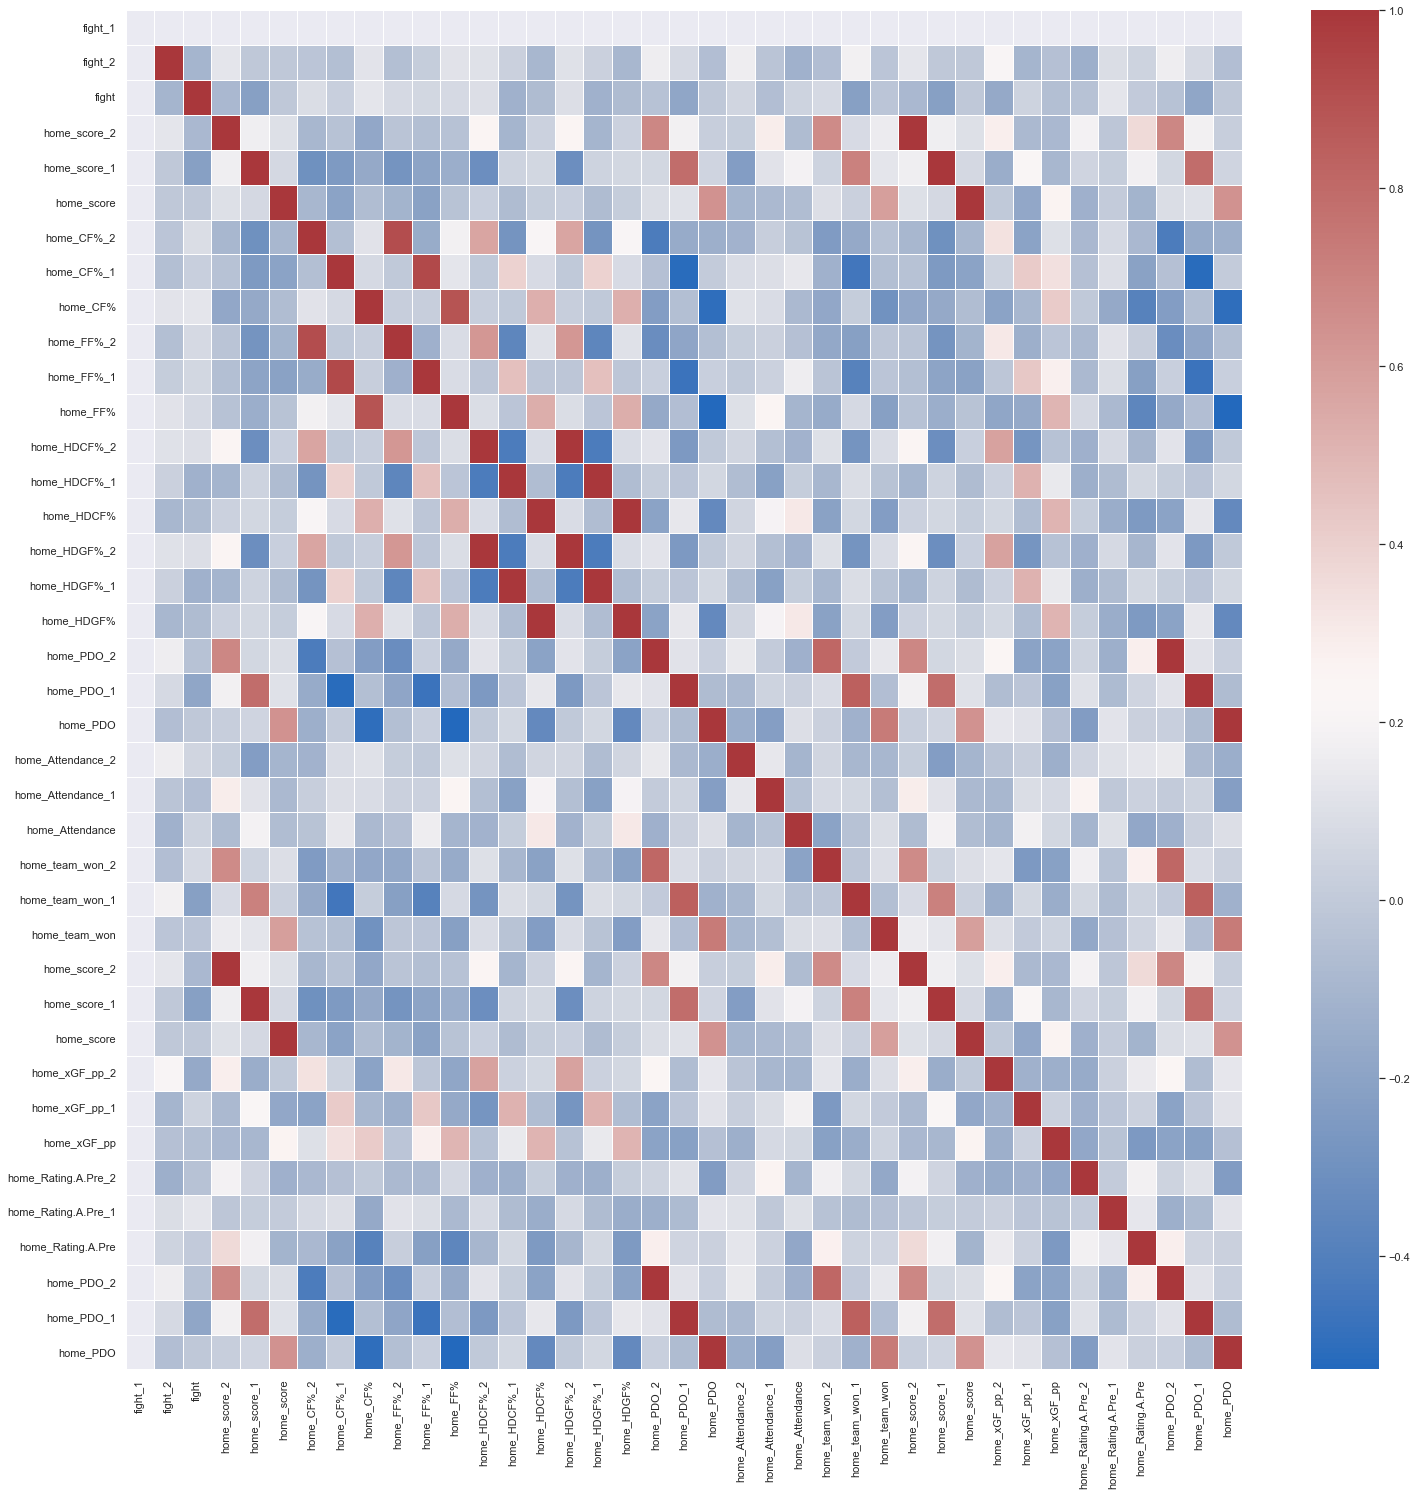

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: STL


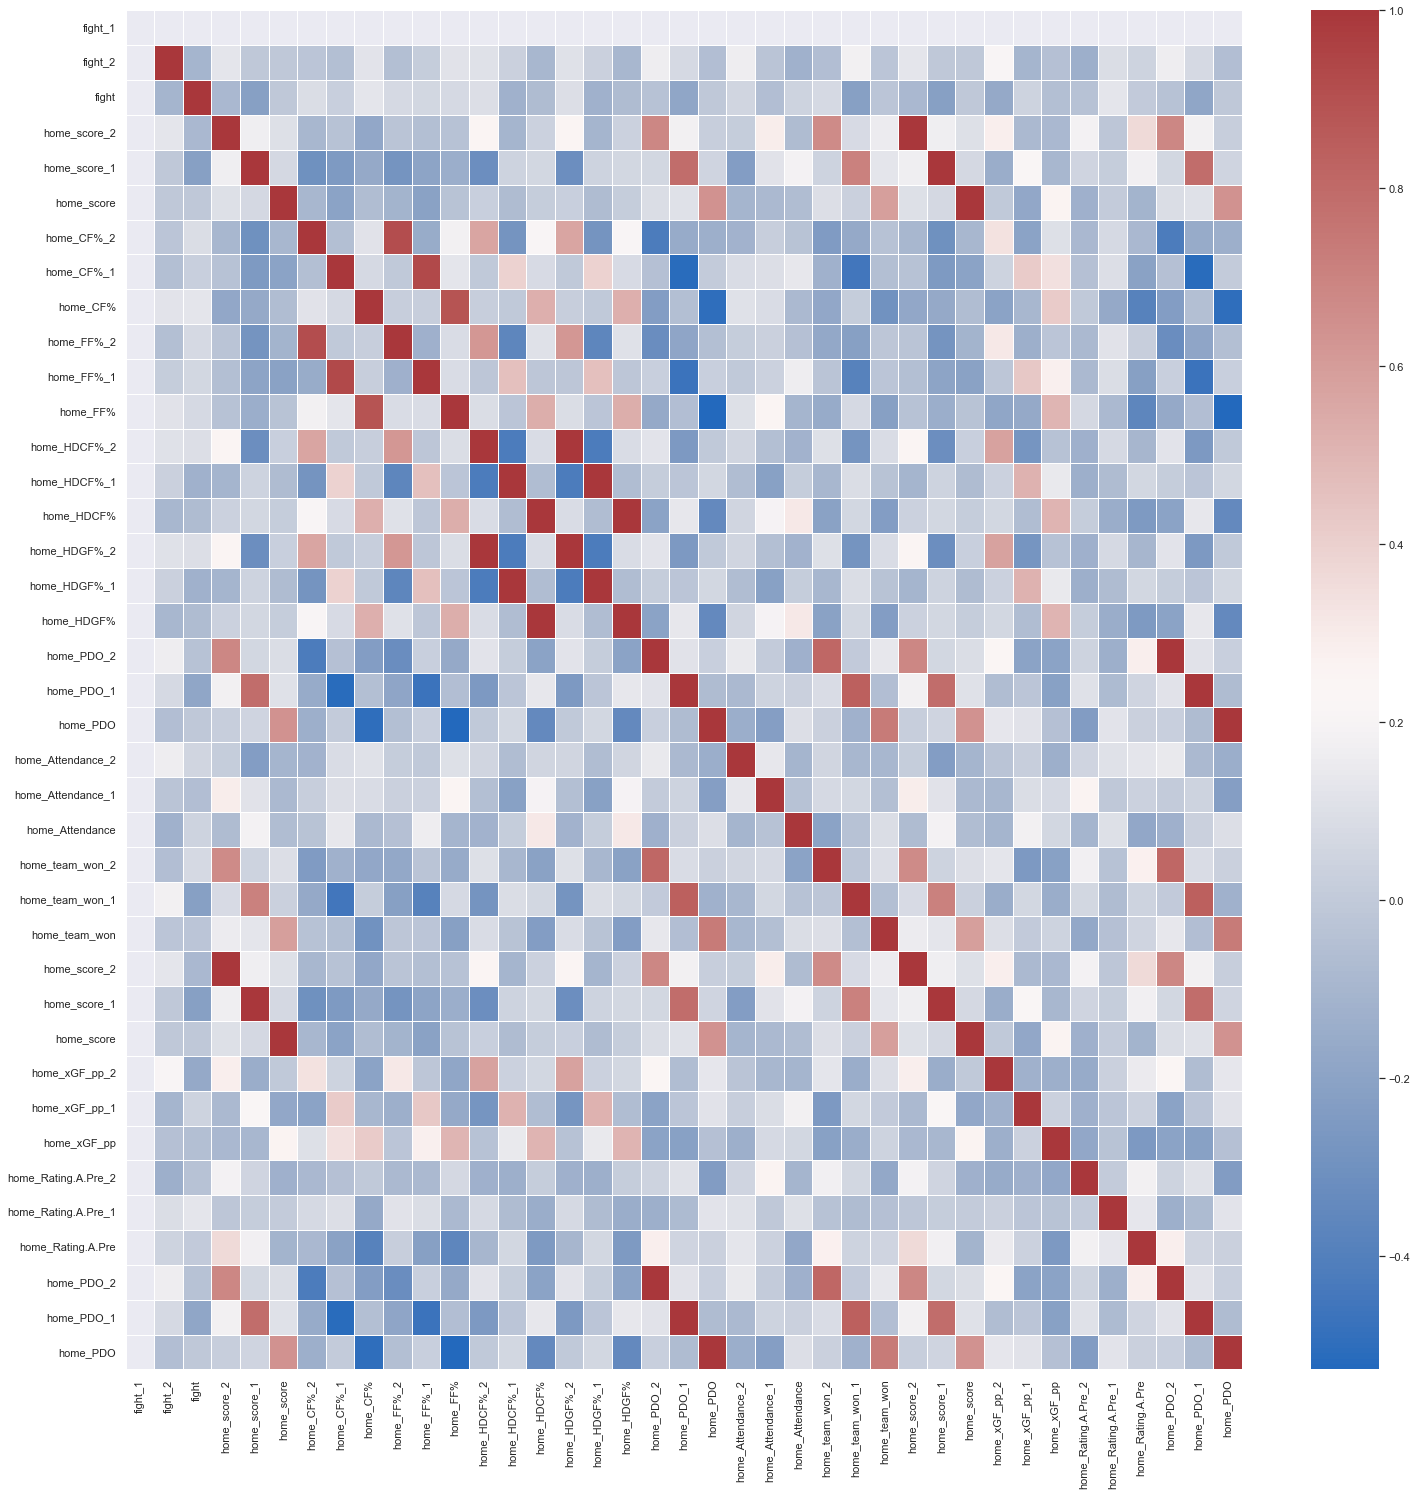

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: FLA


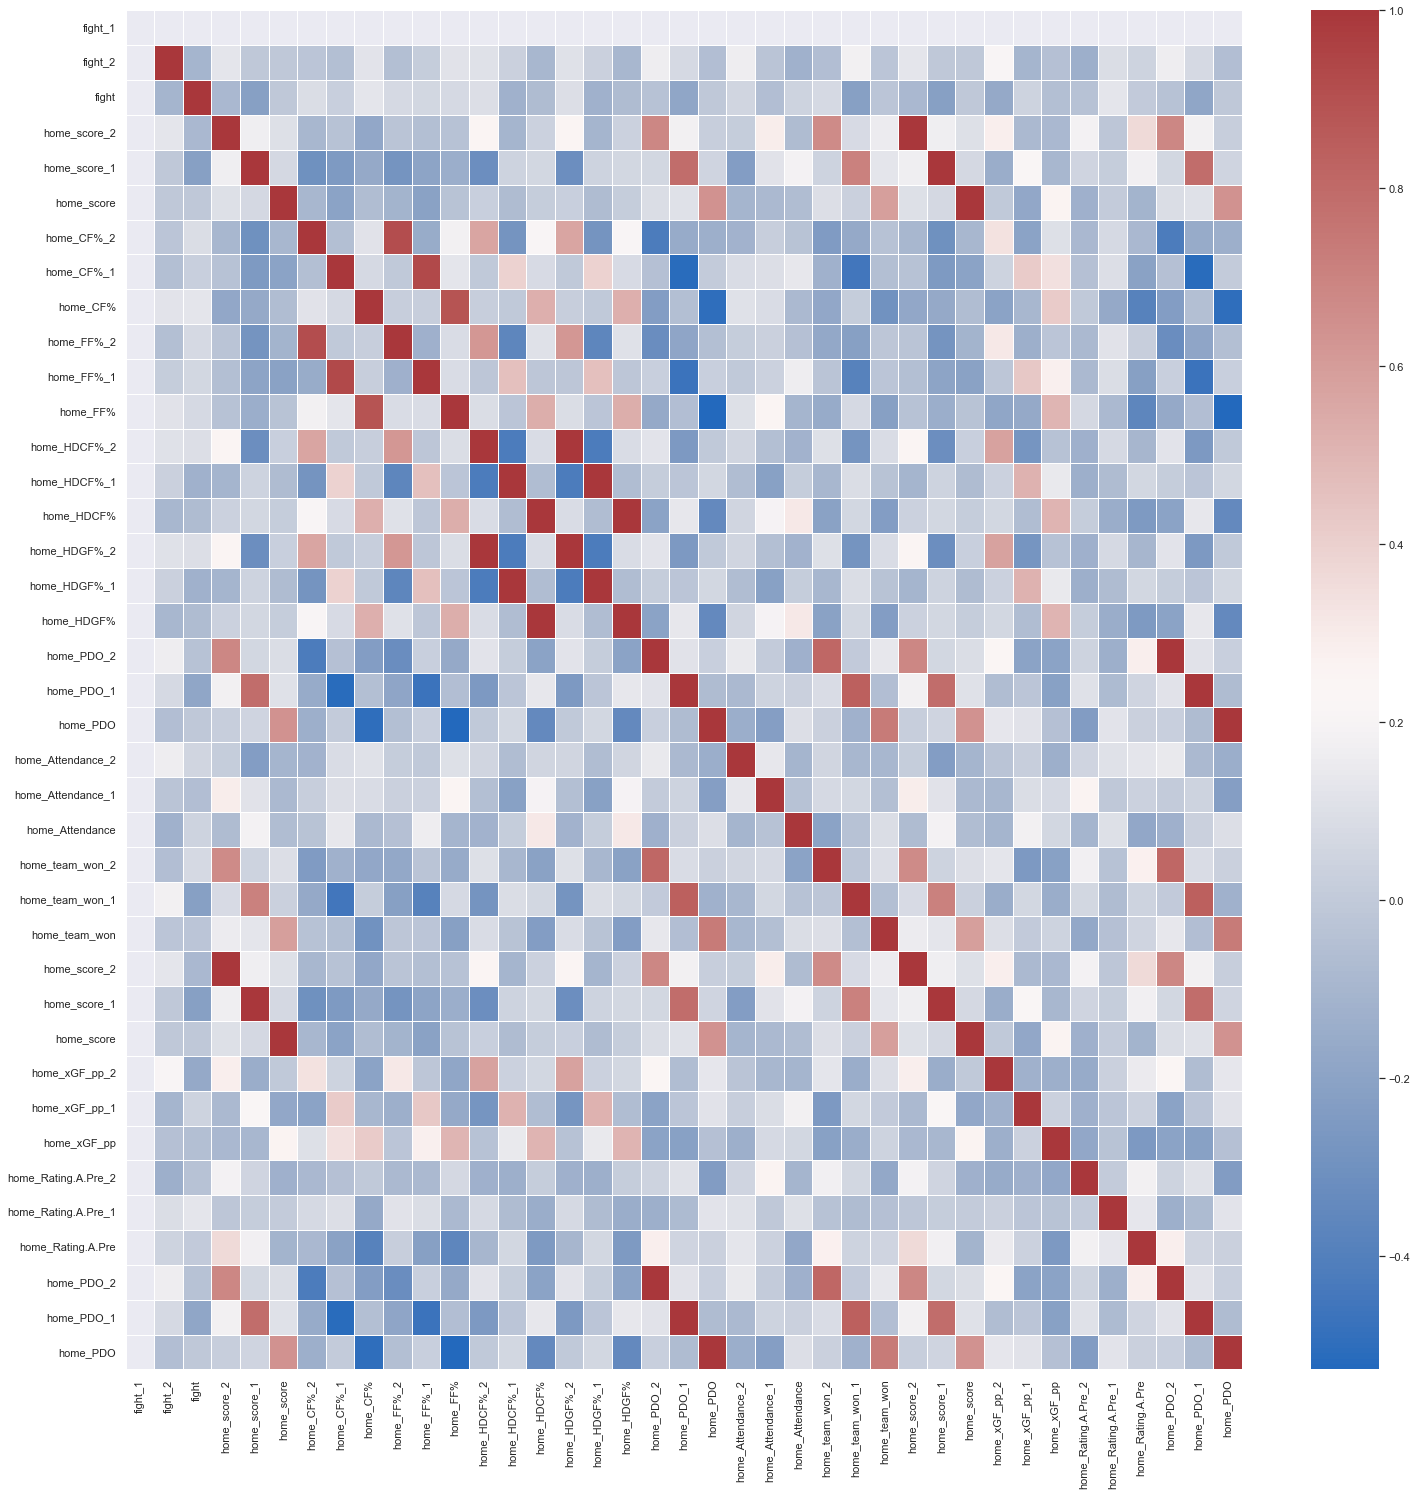

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: COL


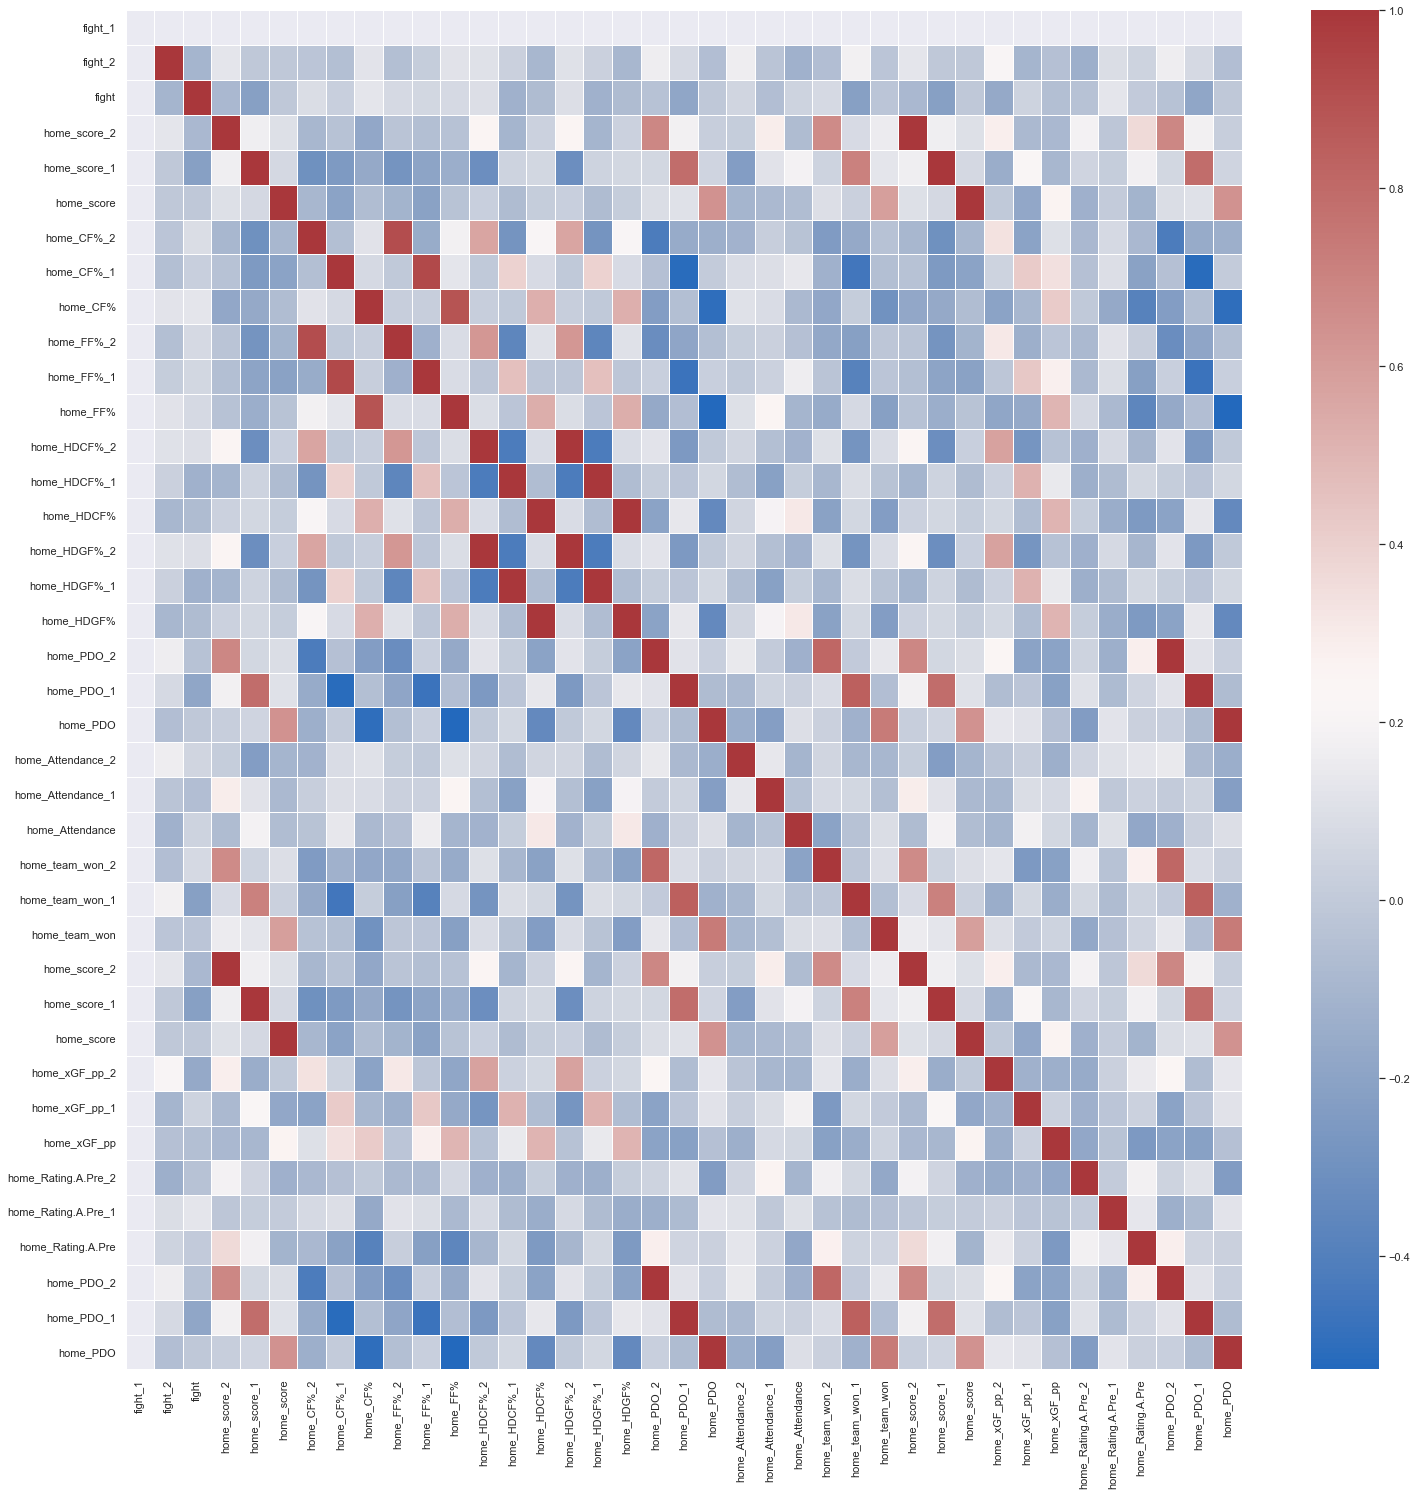

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: BUF


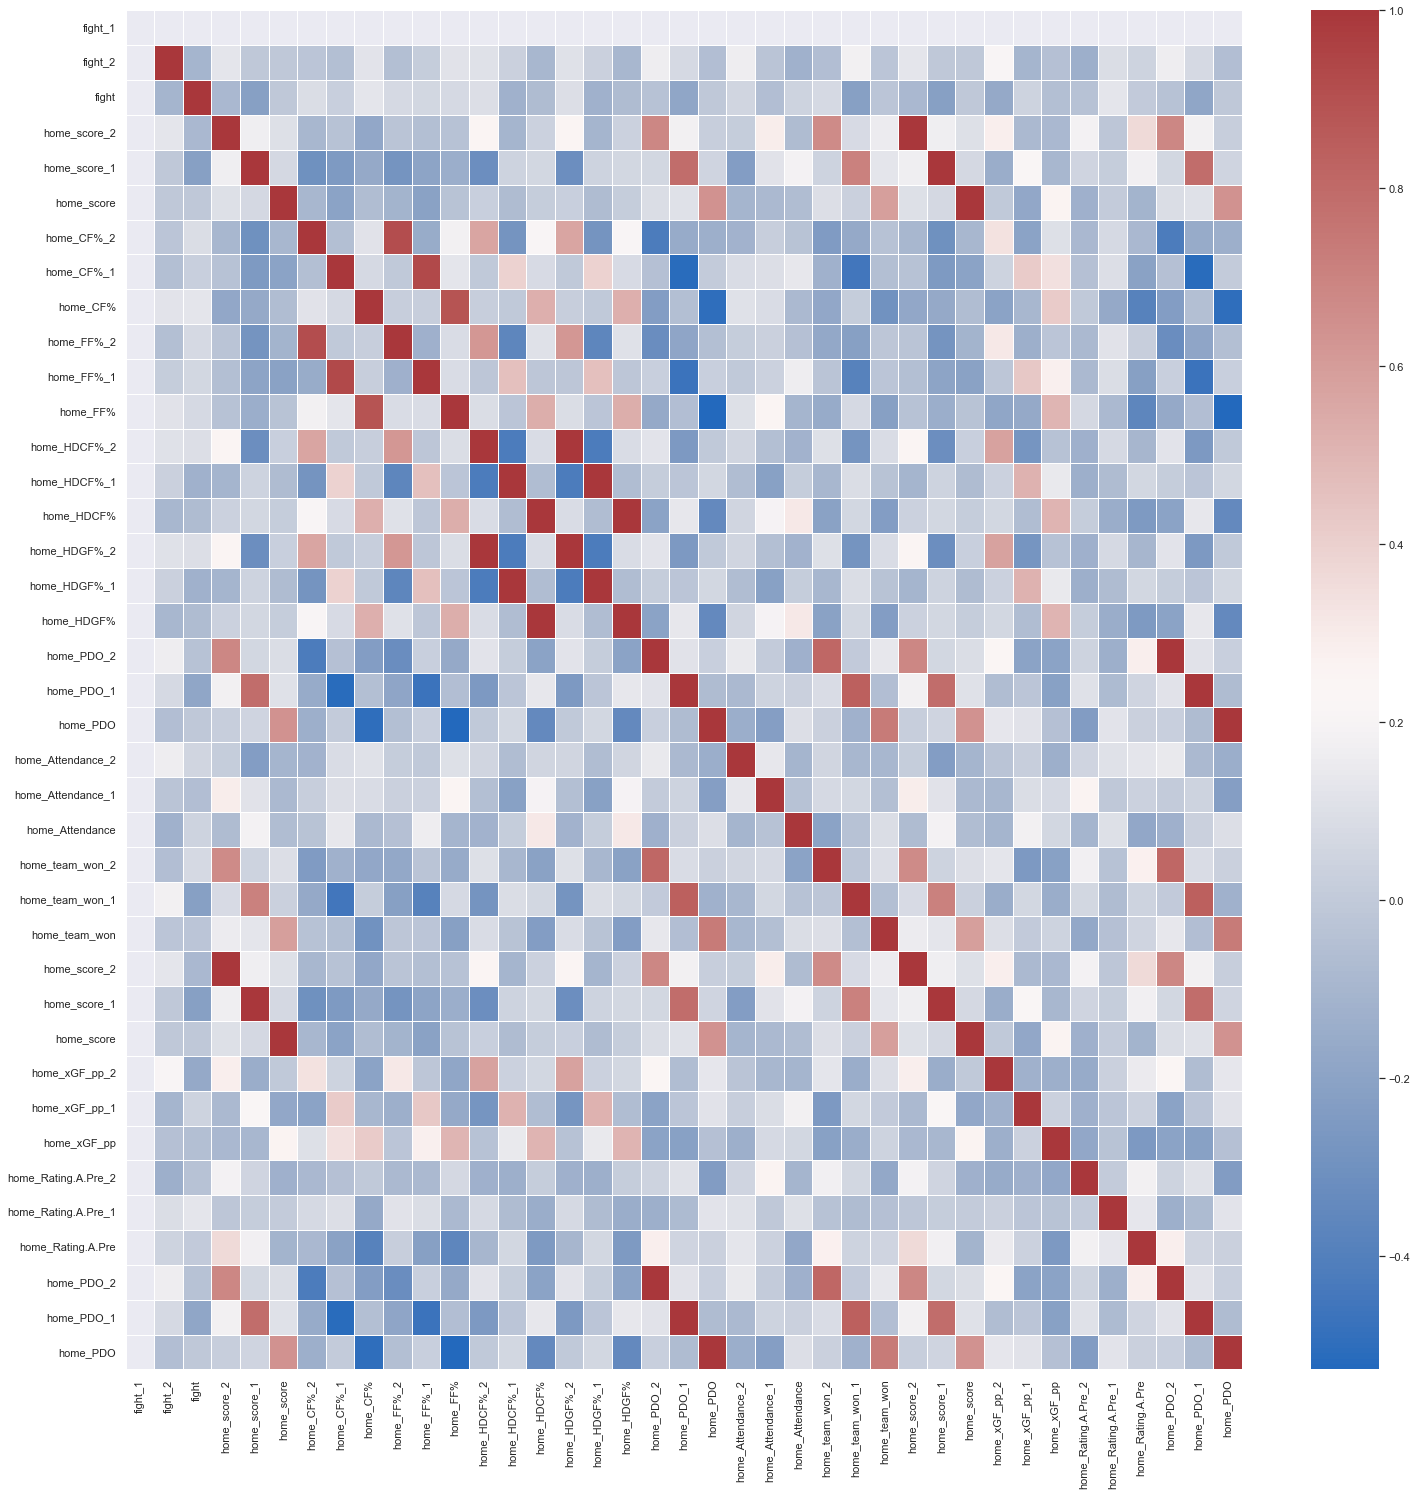

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: ANA


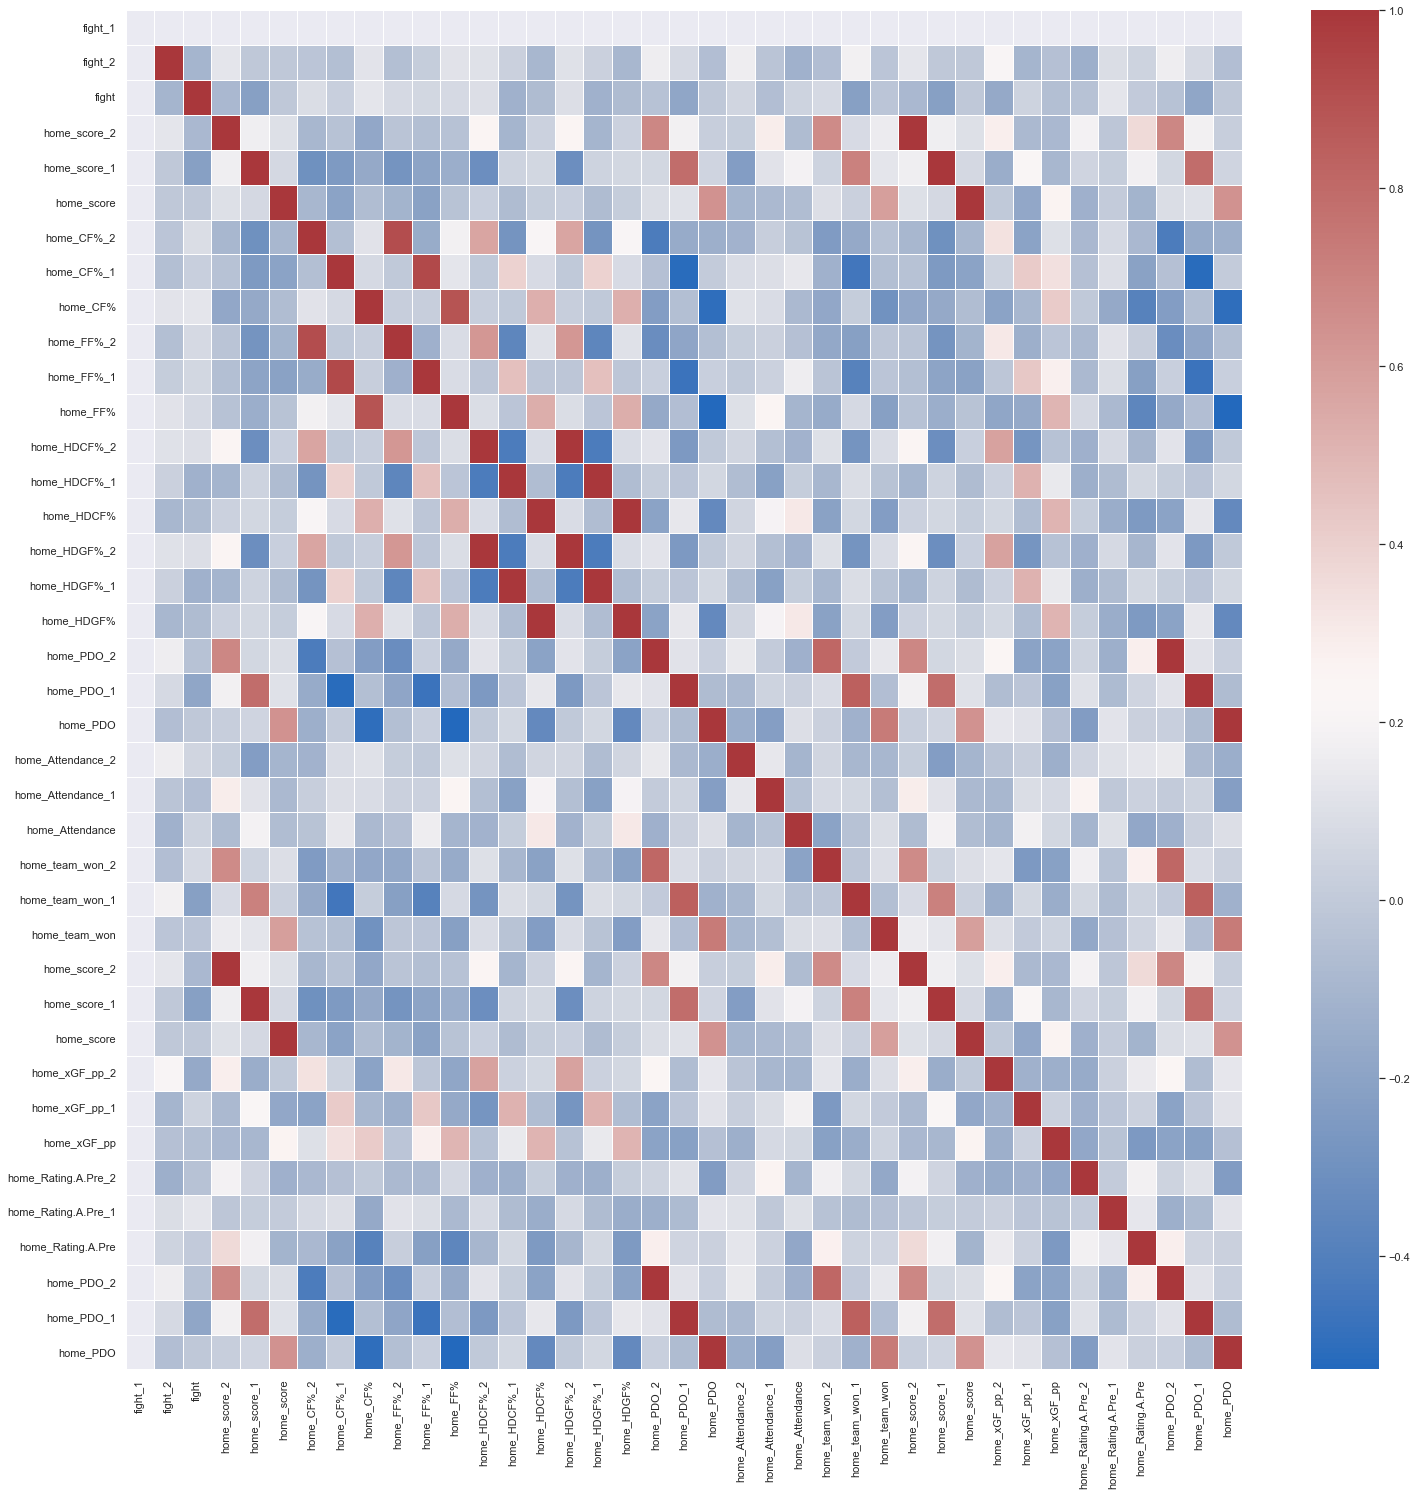

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: CBJ


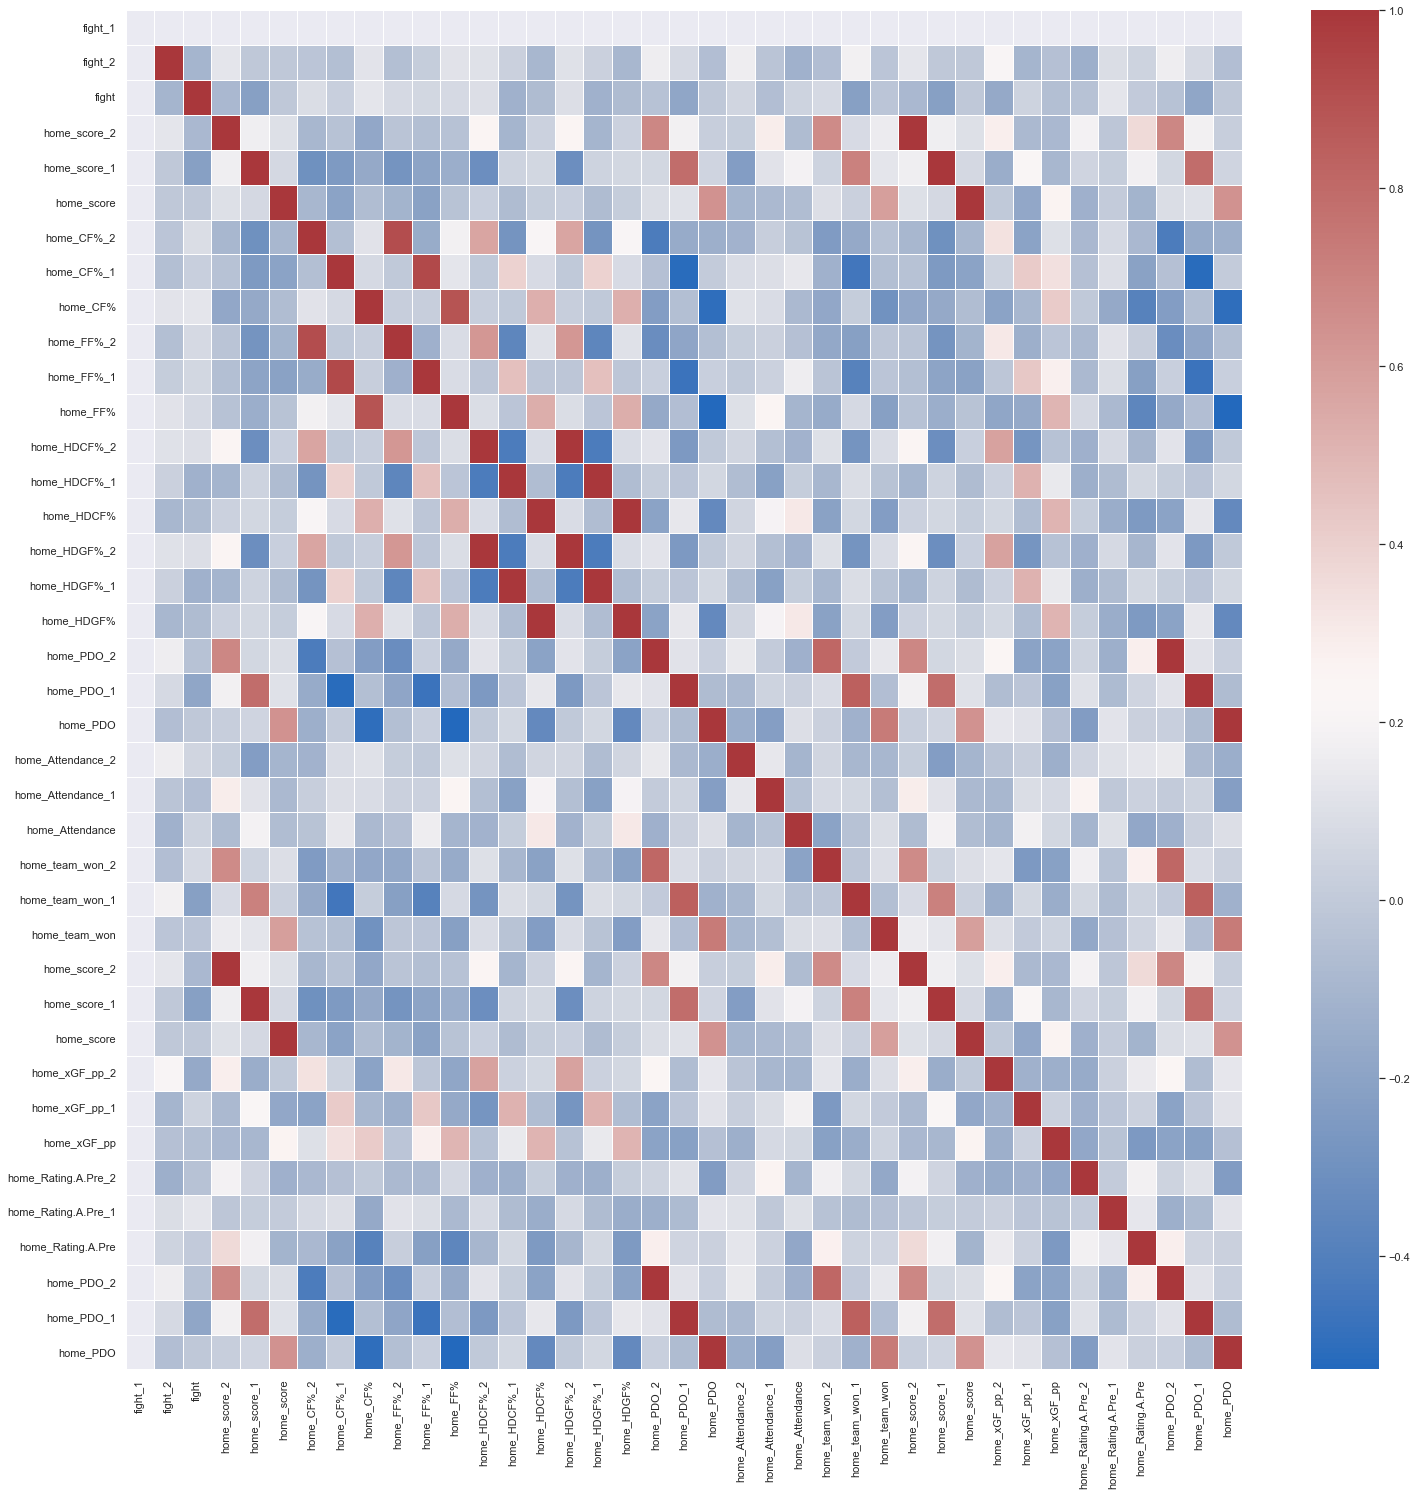

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: PIT


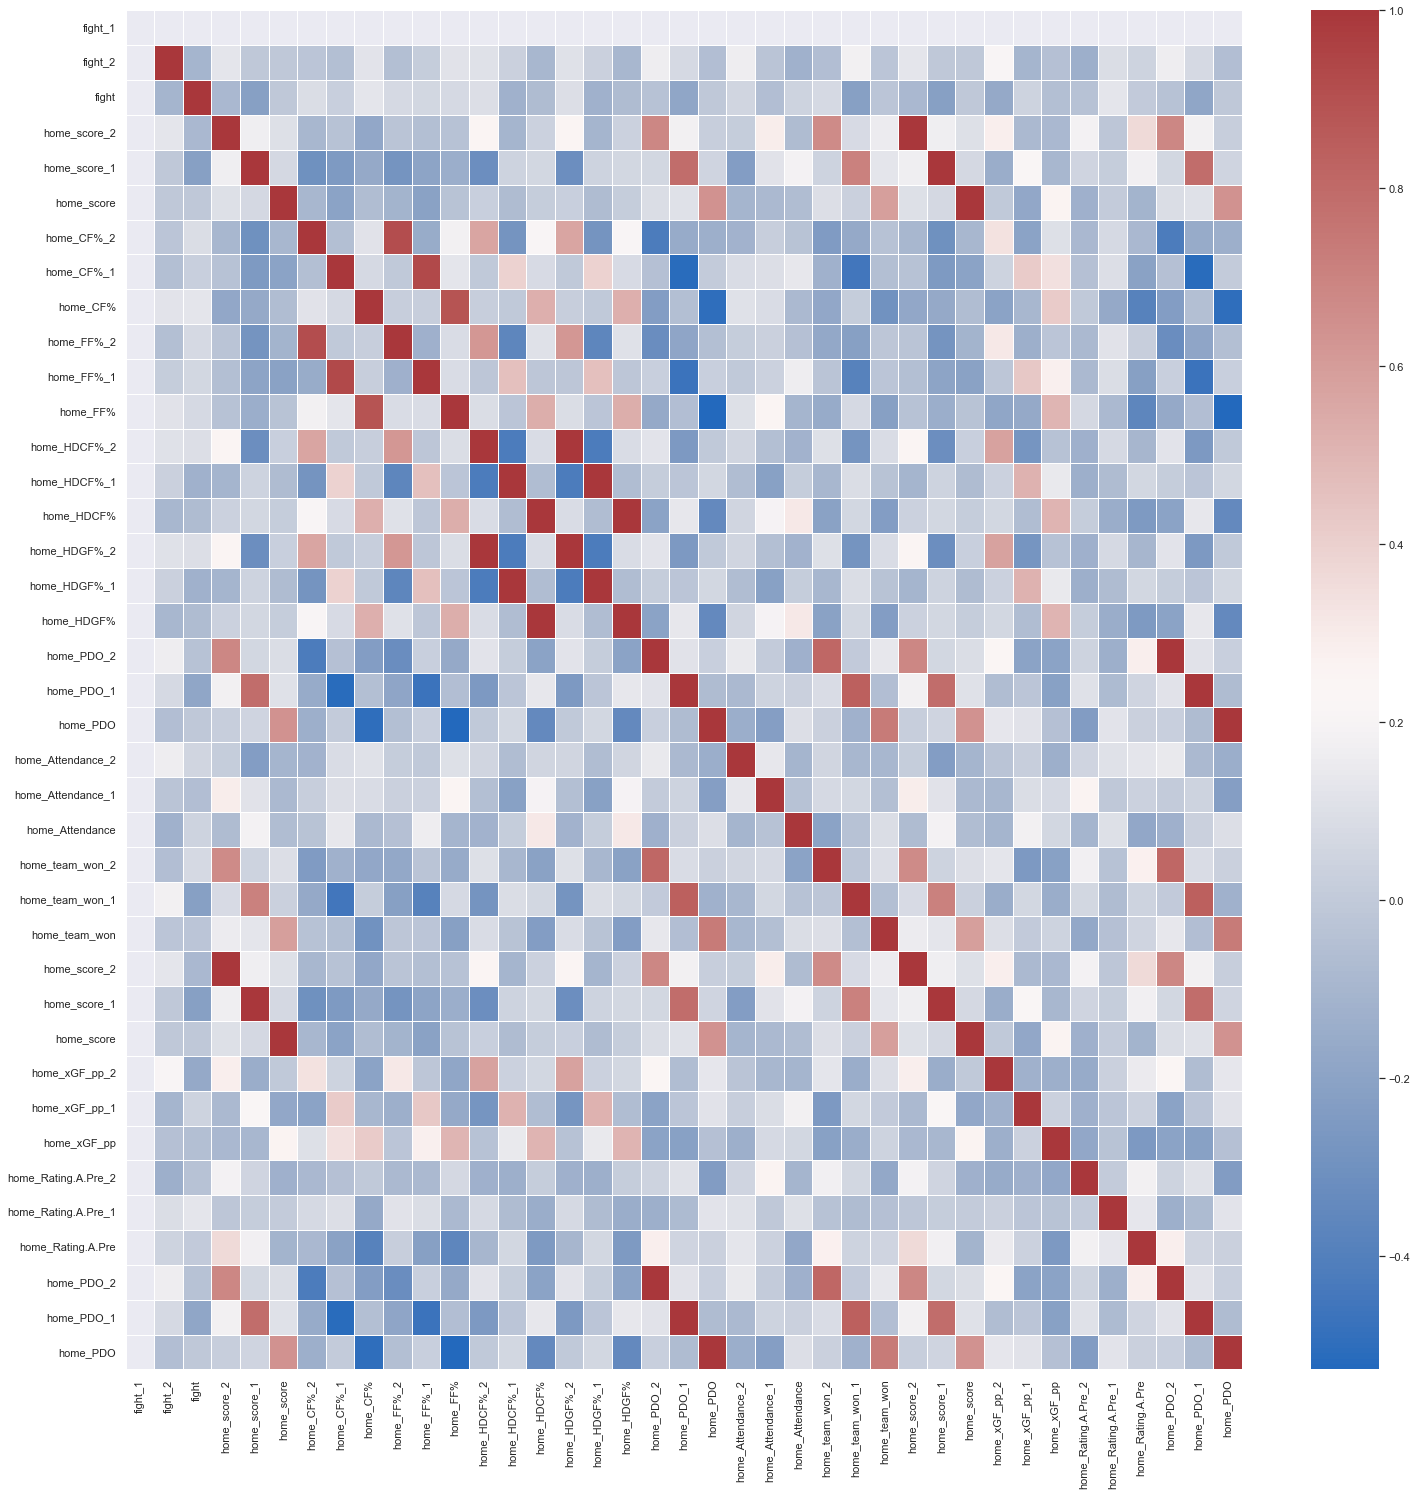

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: VAN


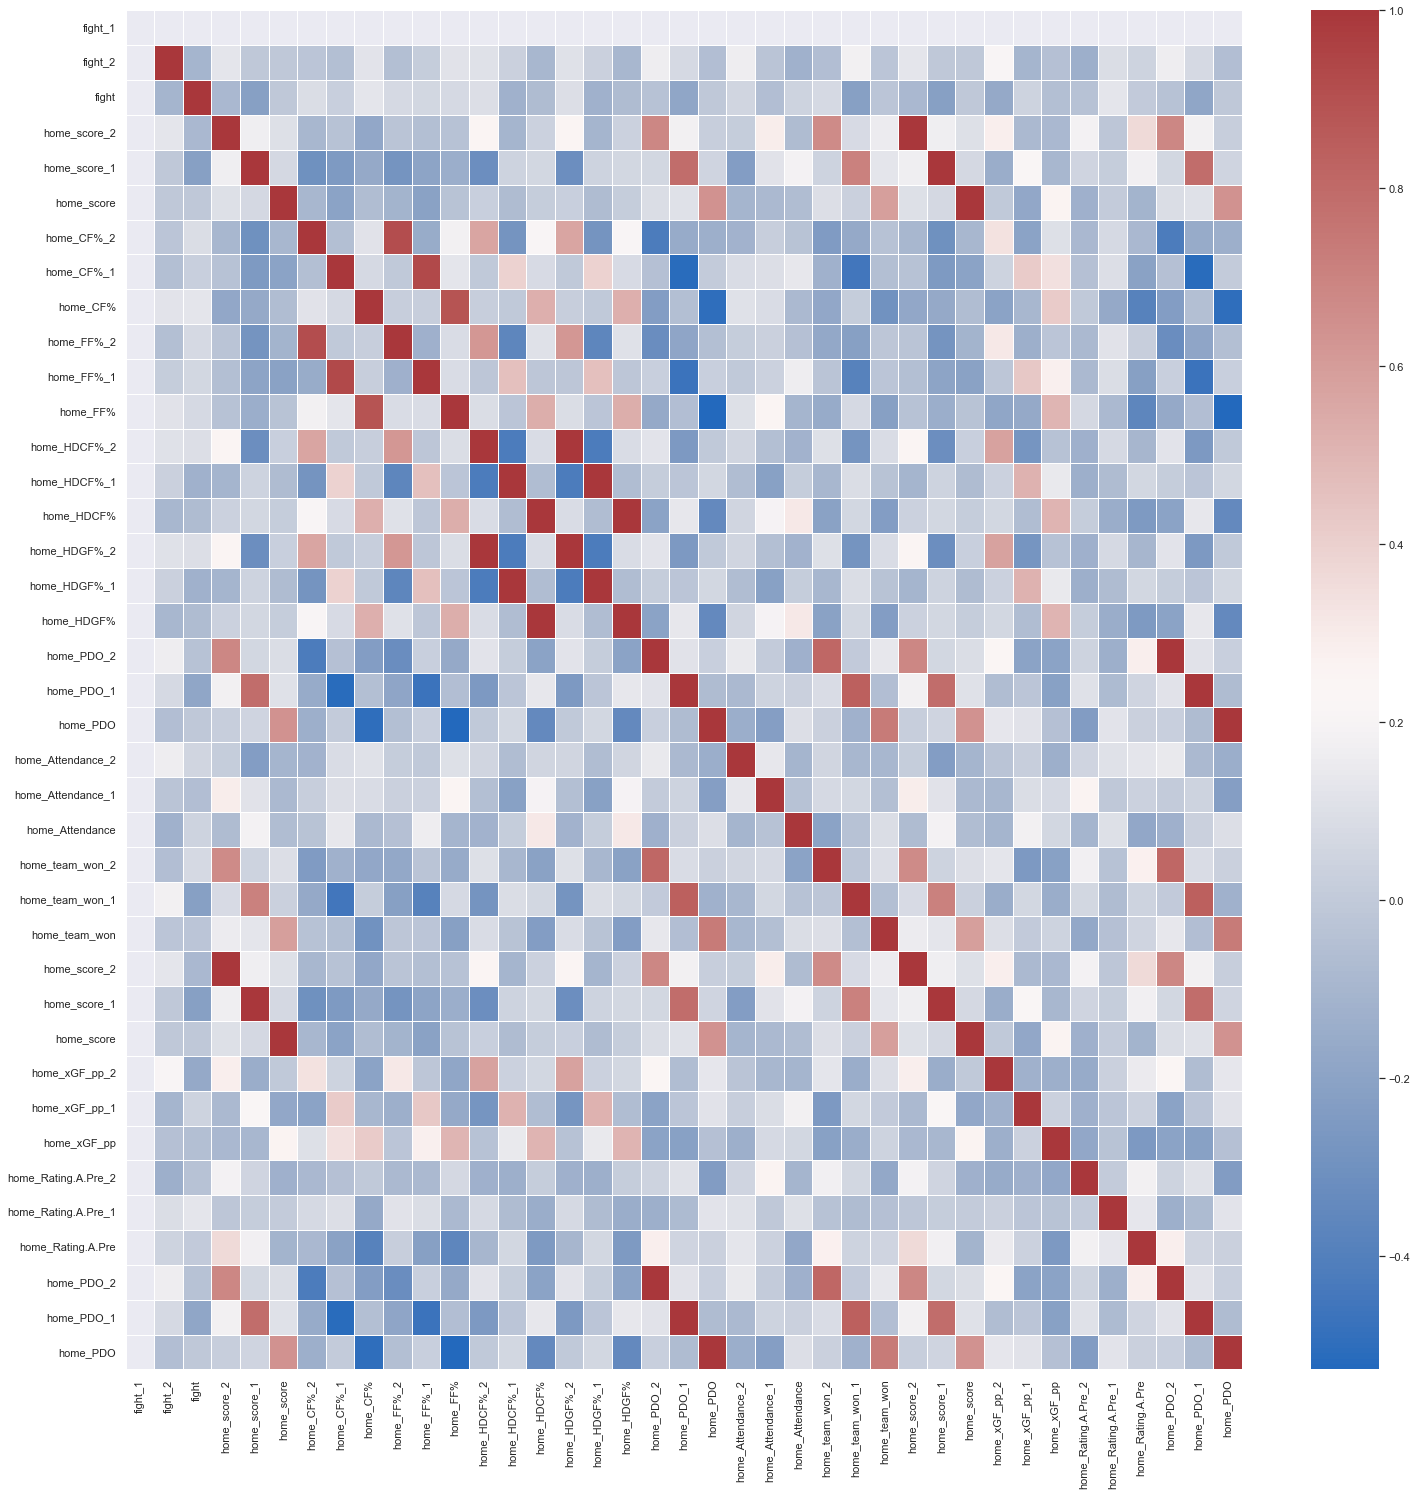

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: OTT


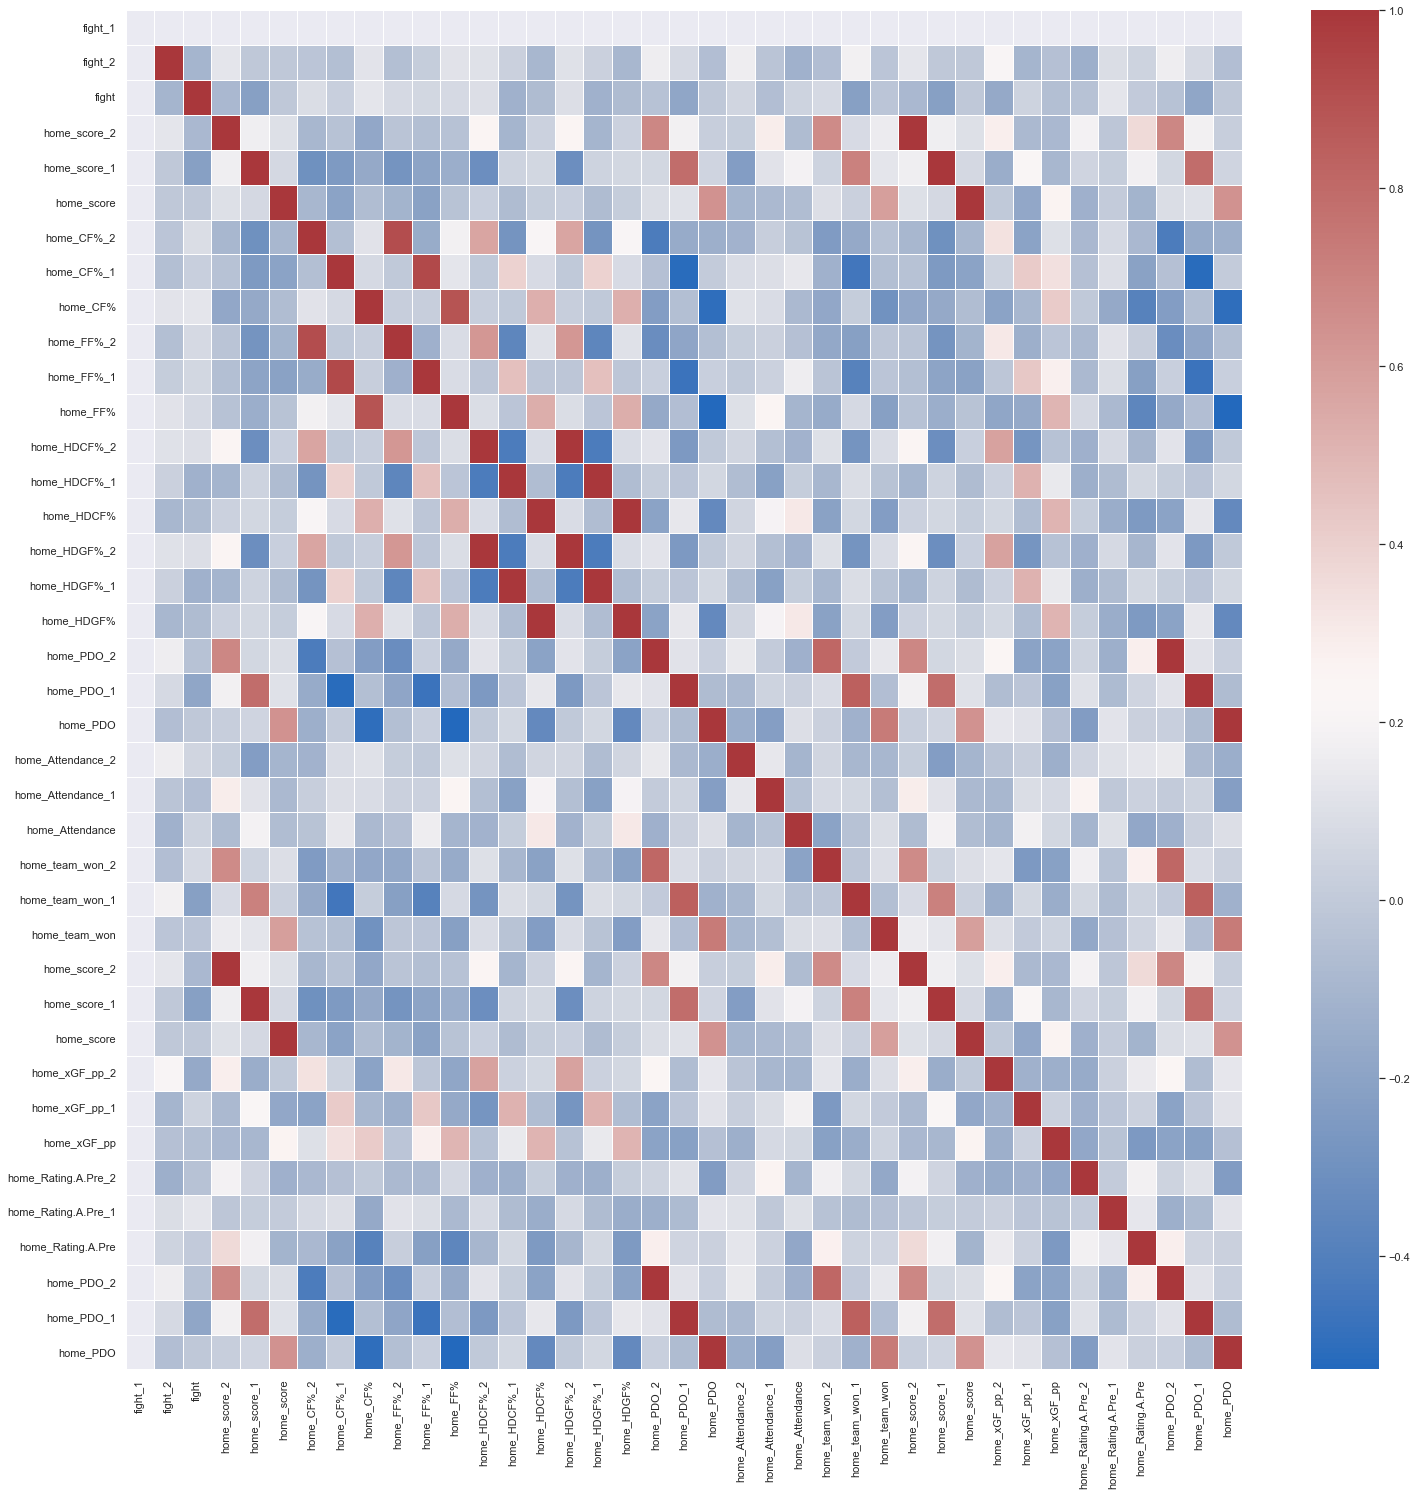

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: CHI


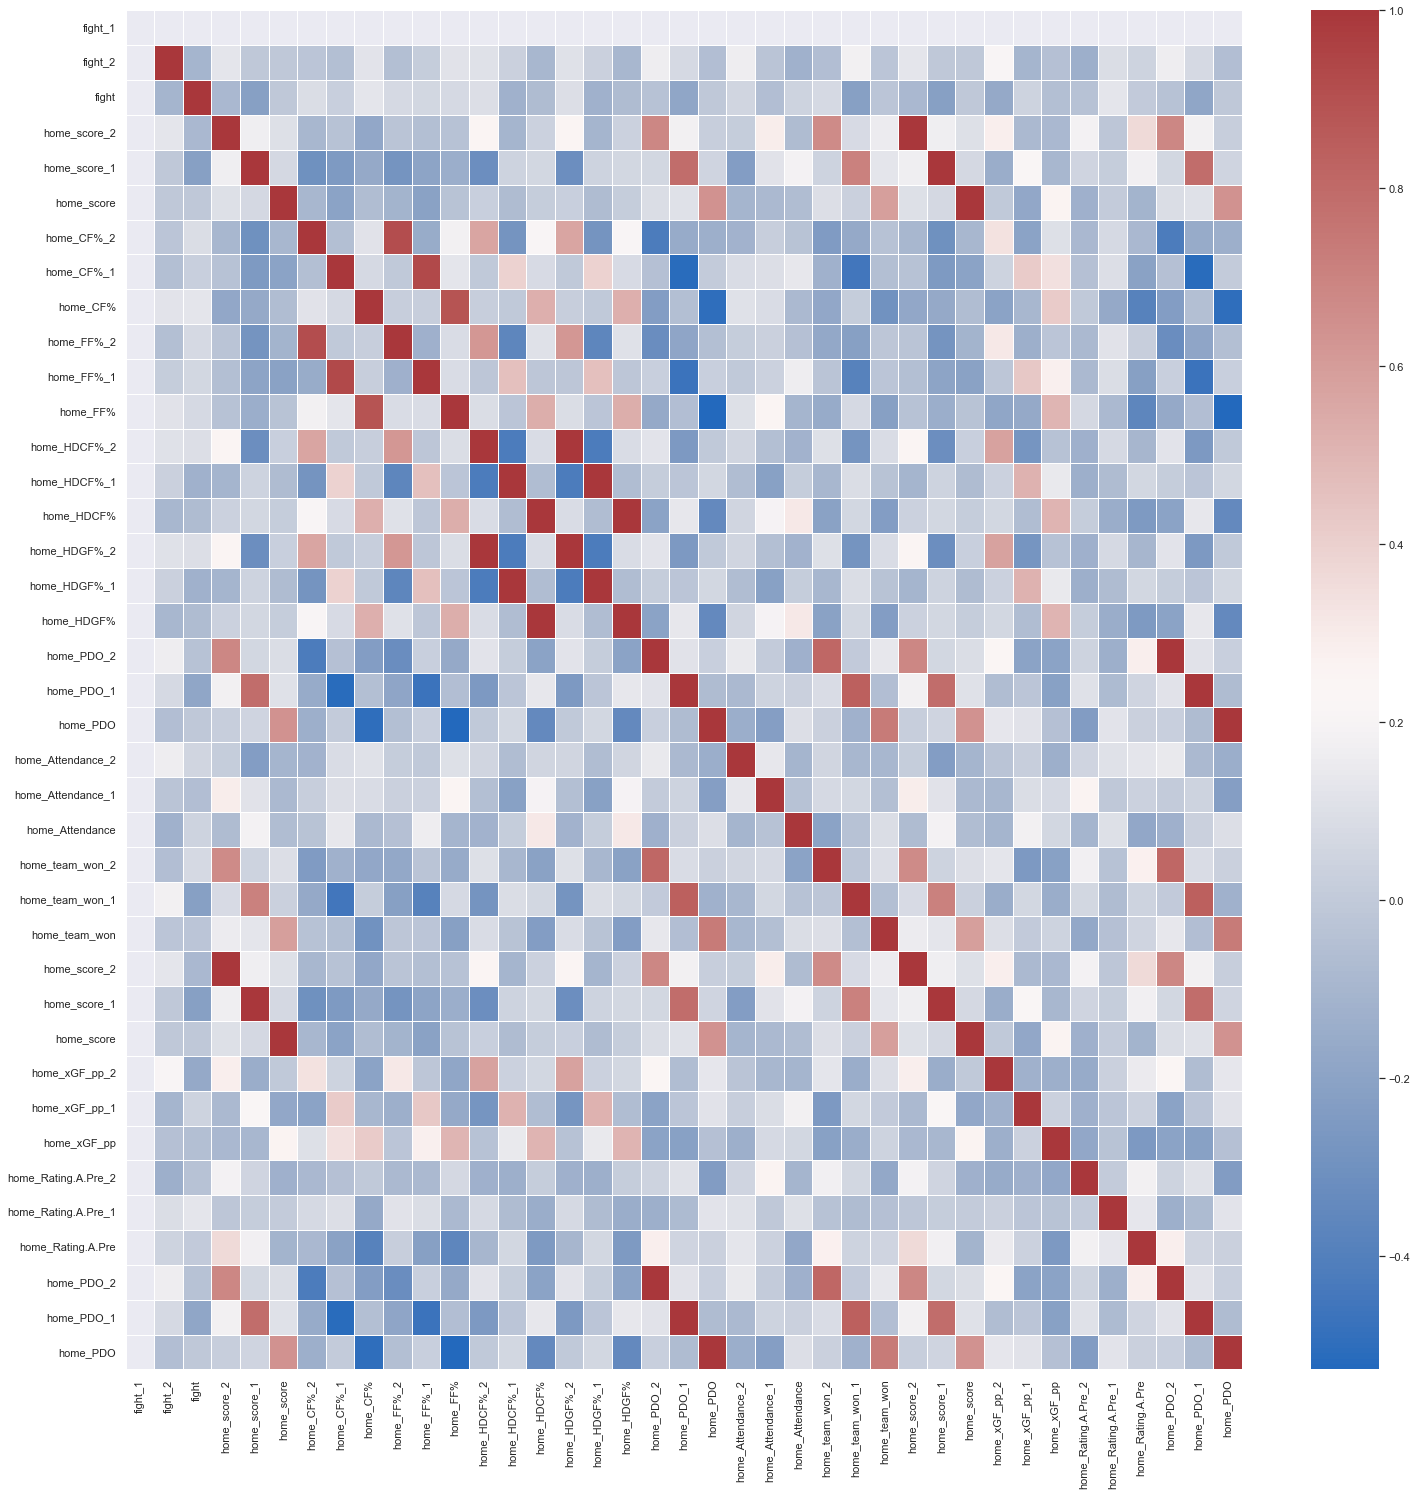

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: ARI


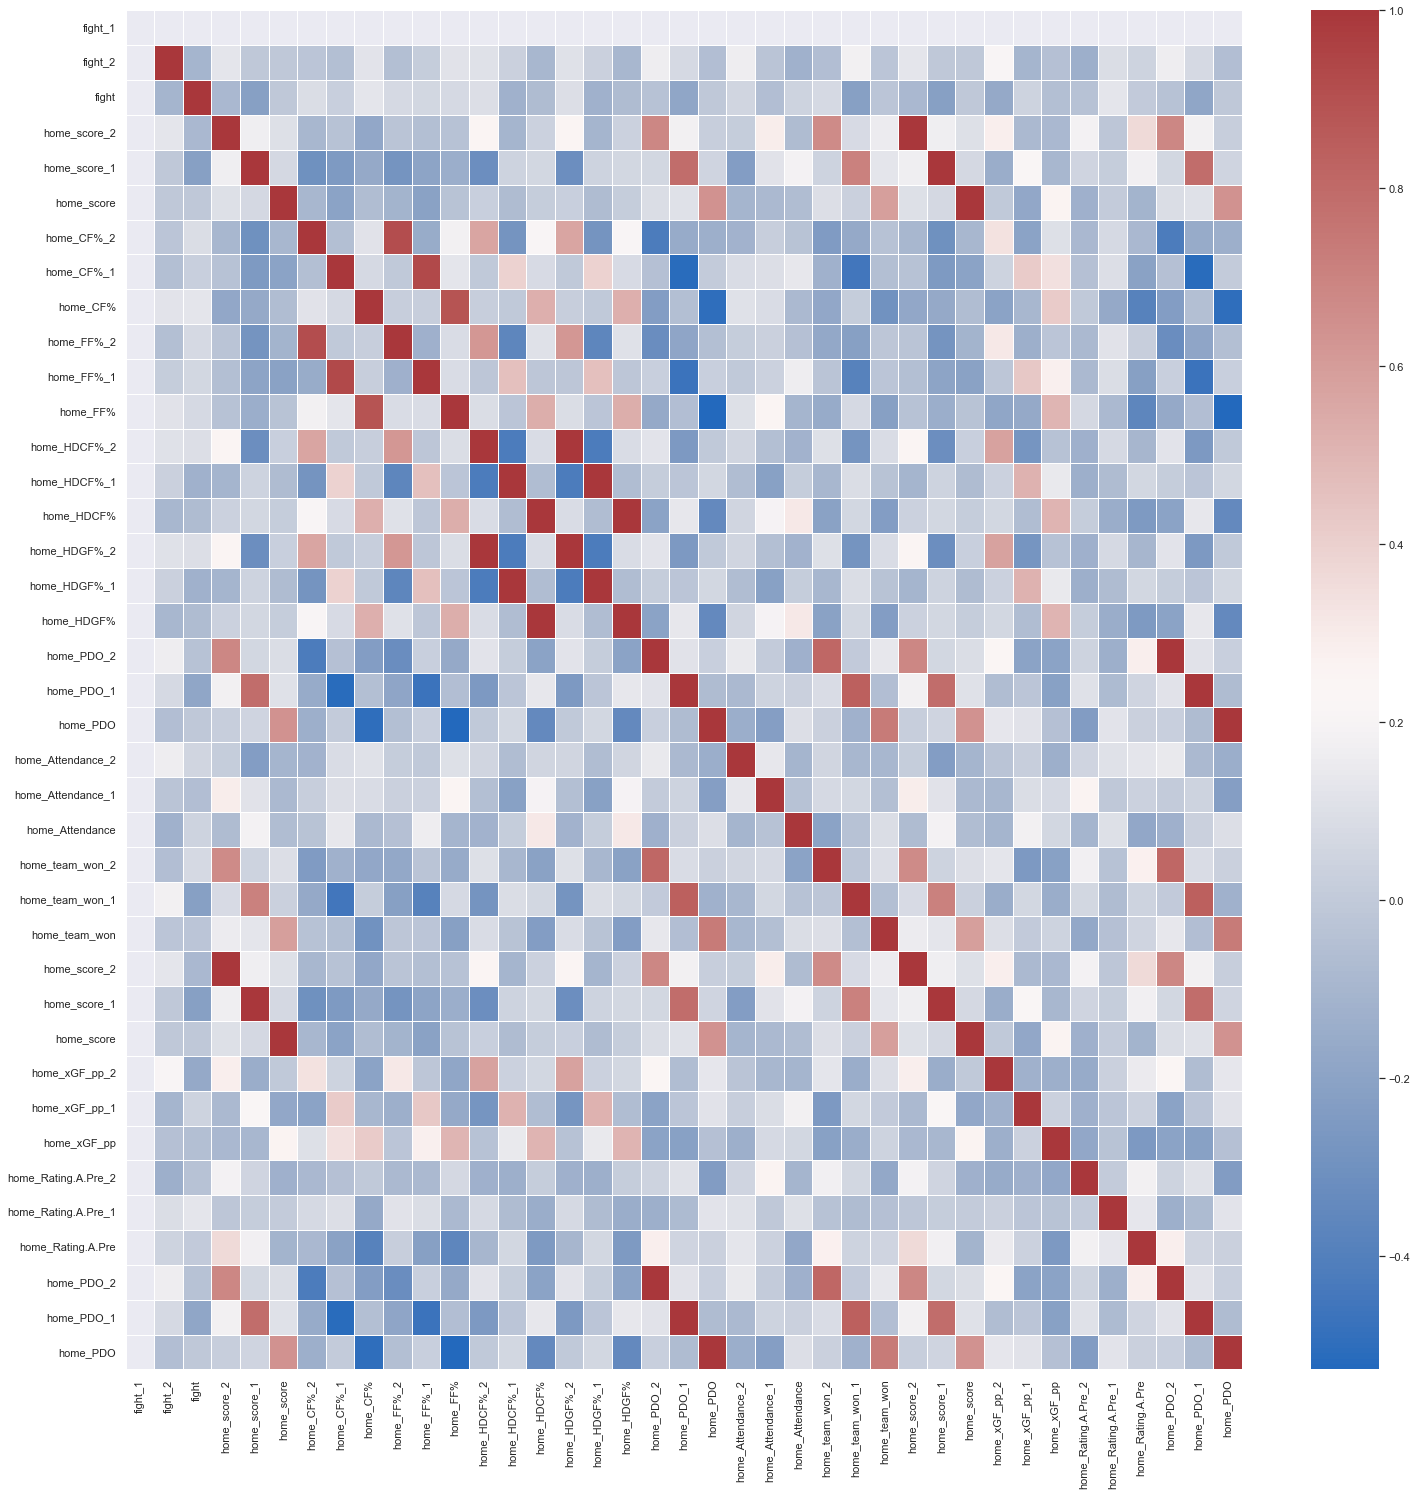

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: NYR


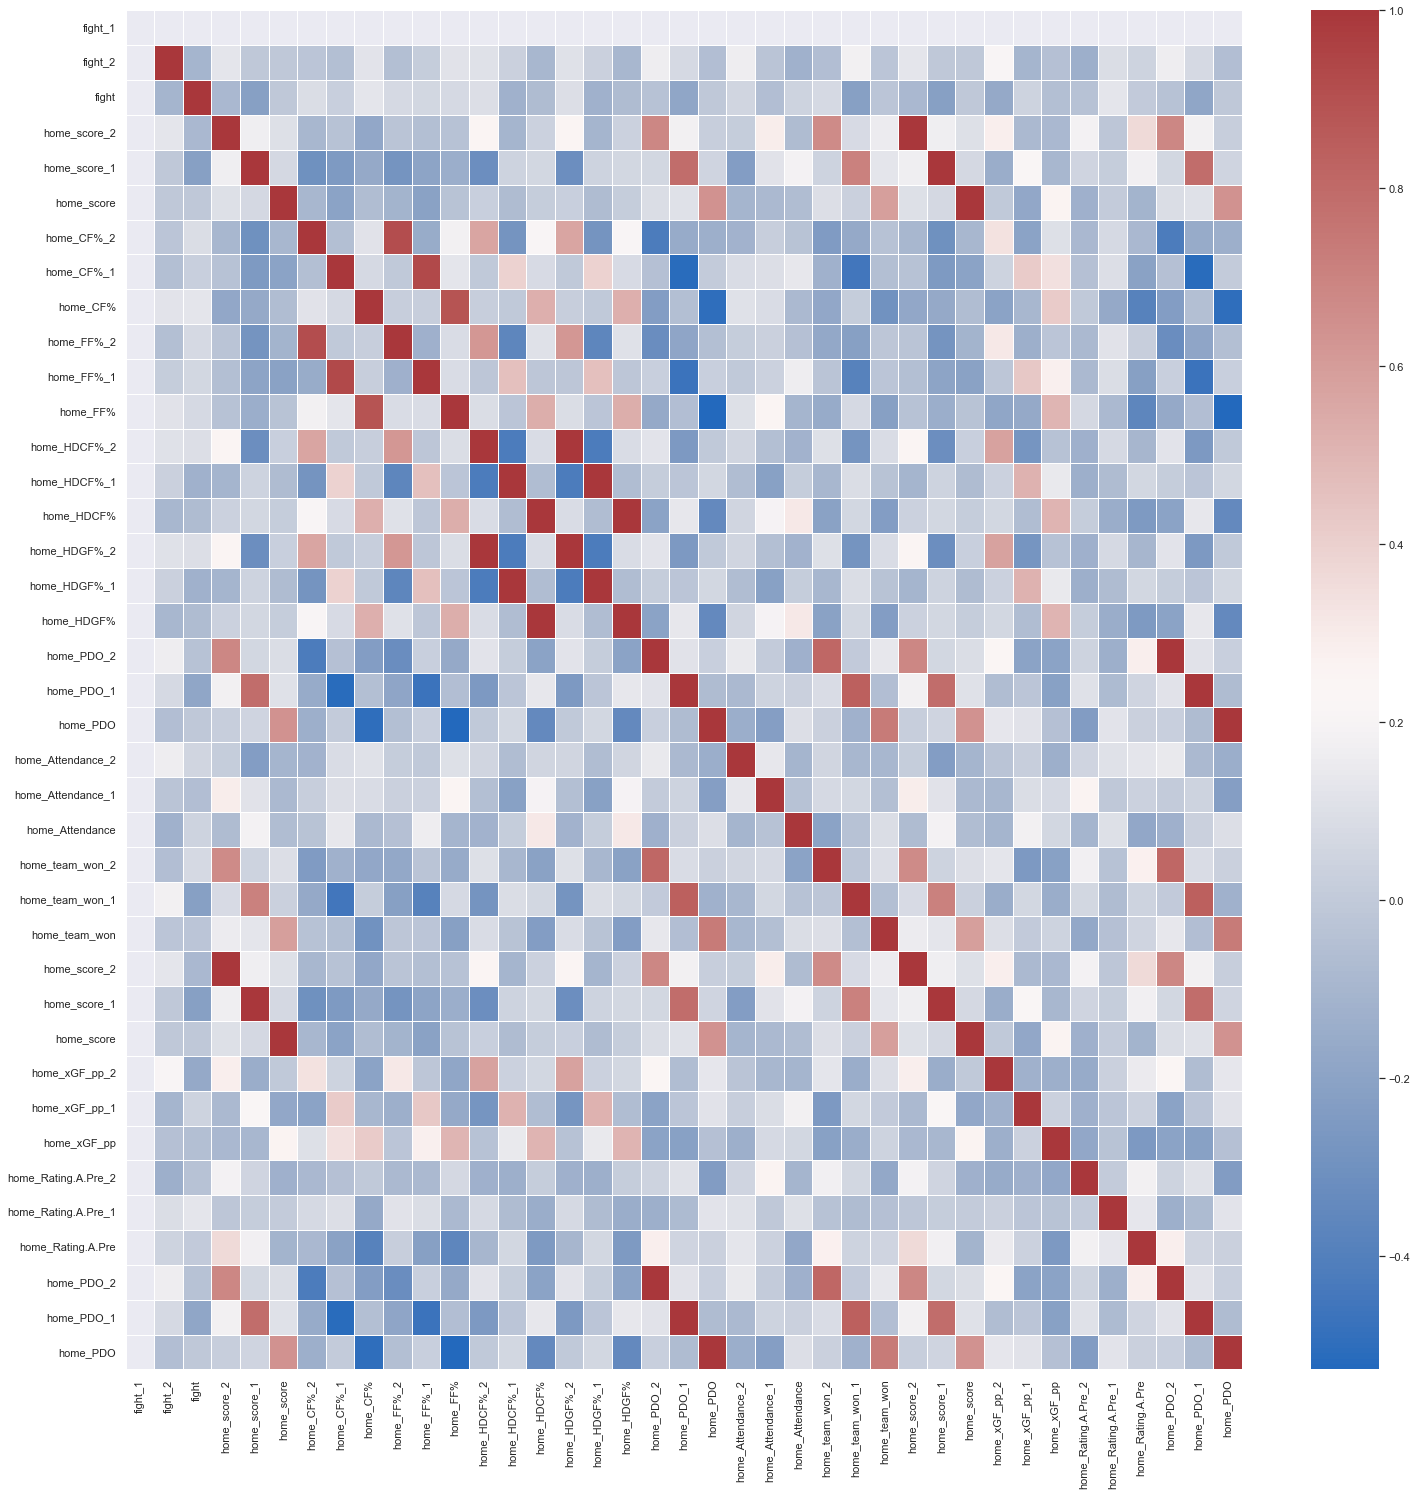

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: NJD


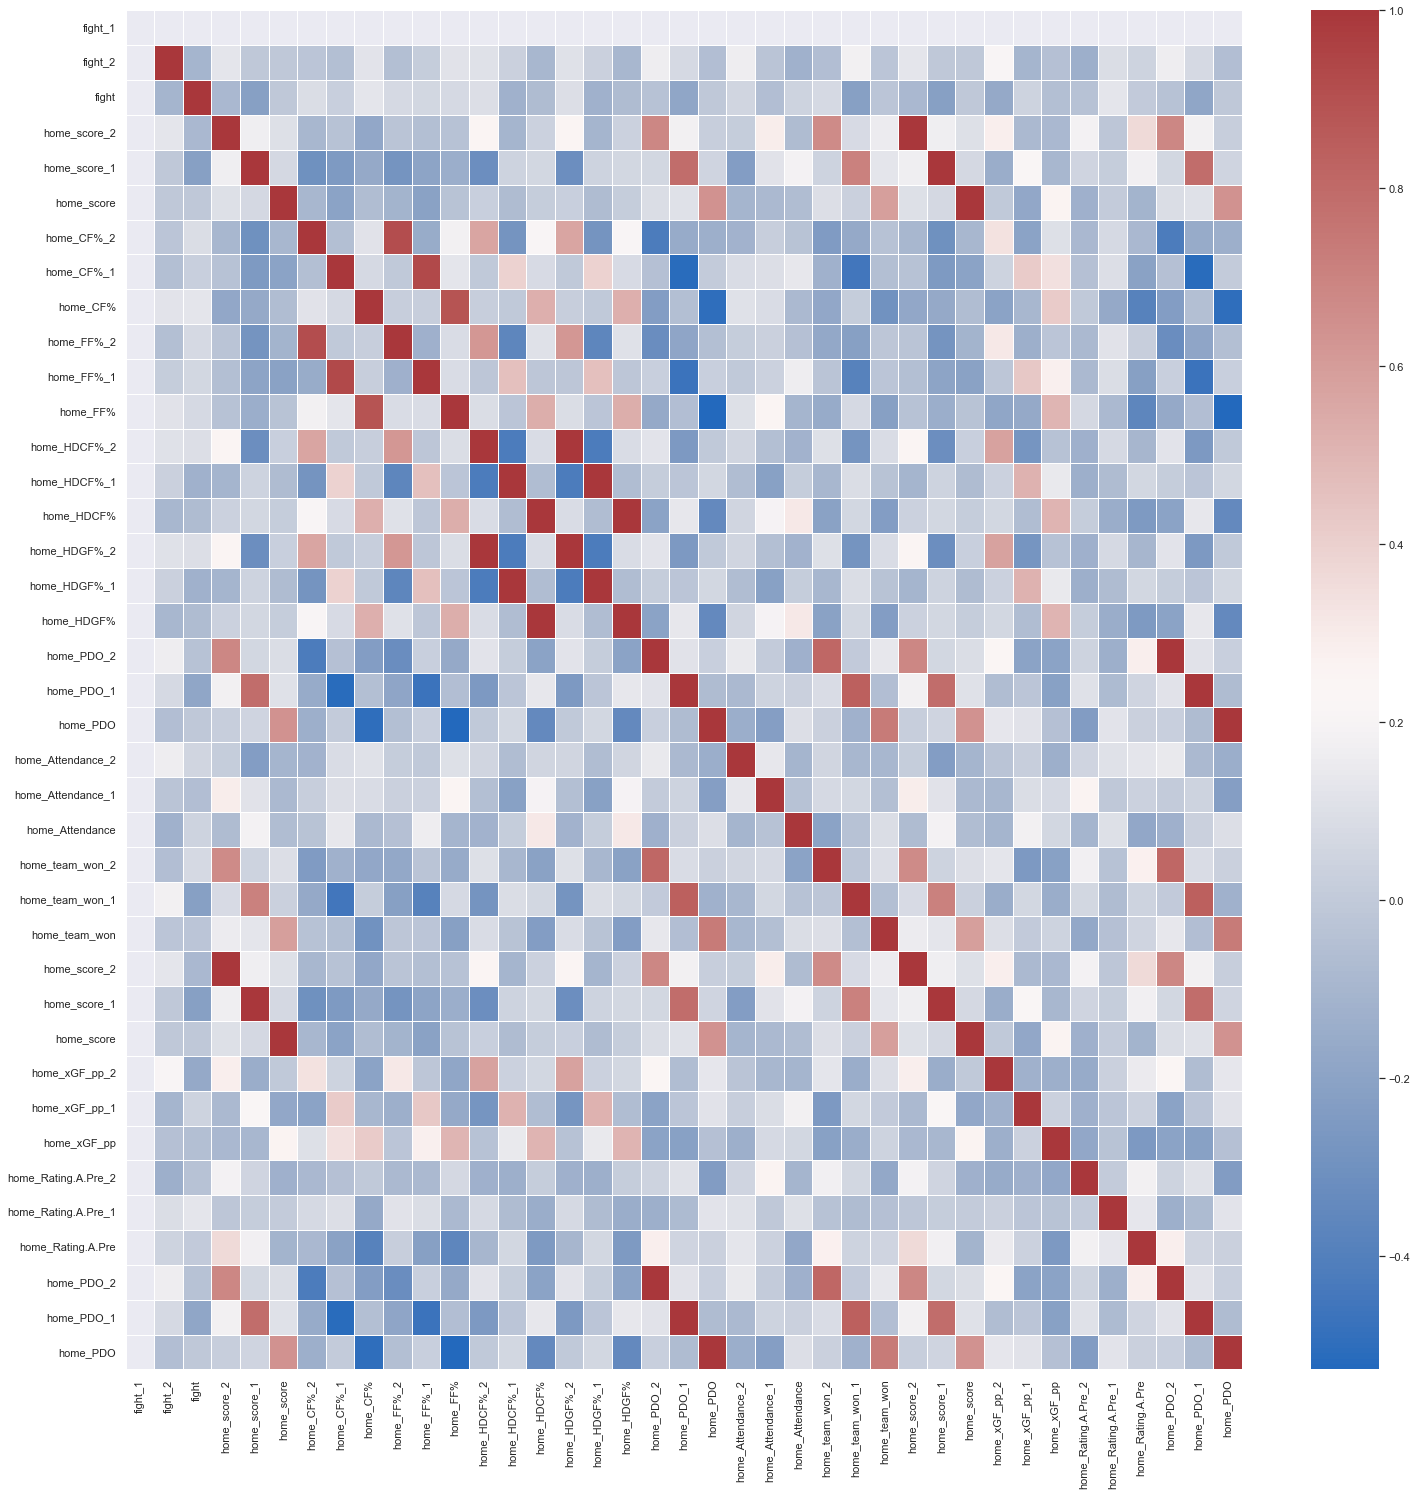

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: MON


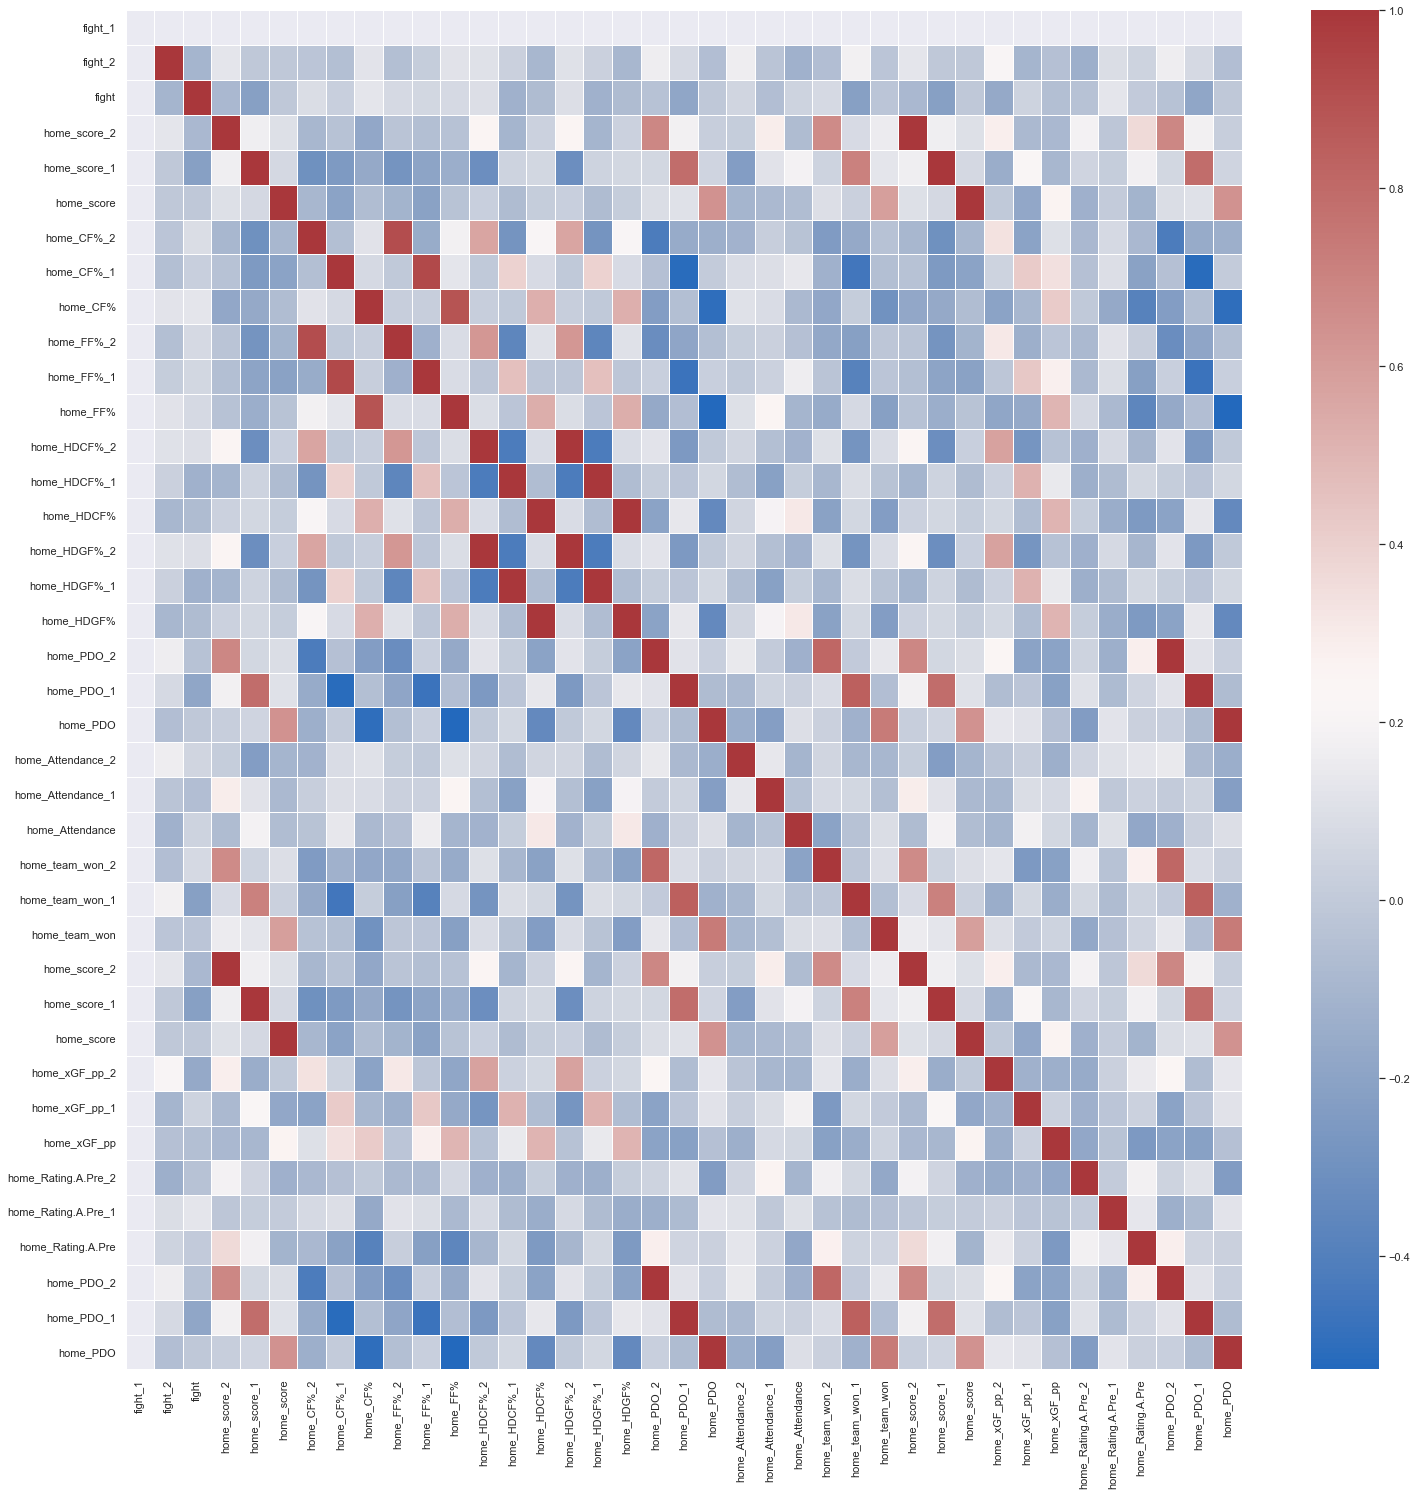

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: NYI


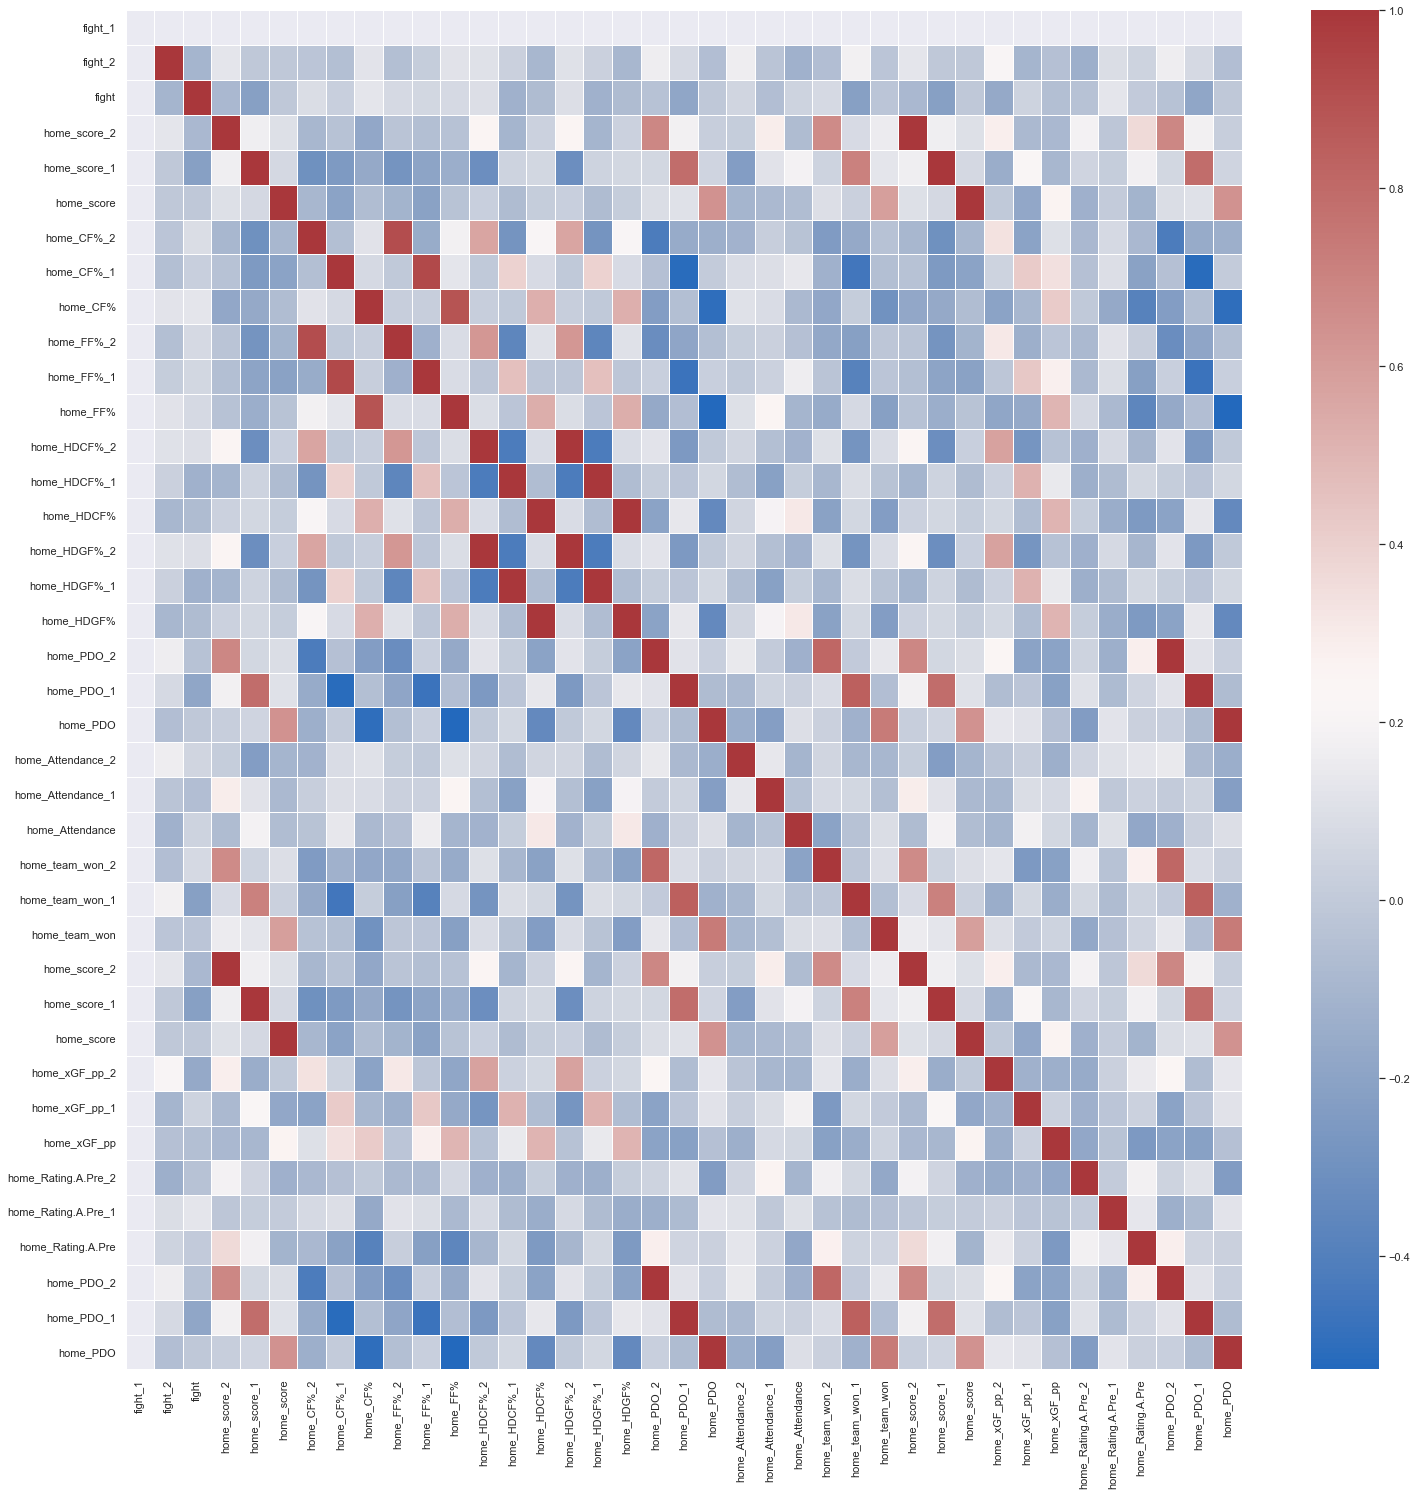

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: DAL


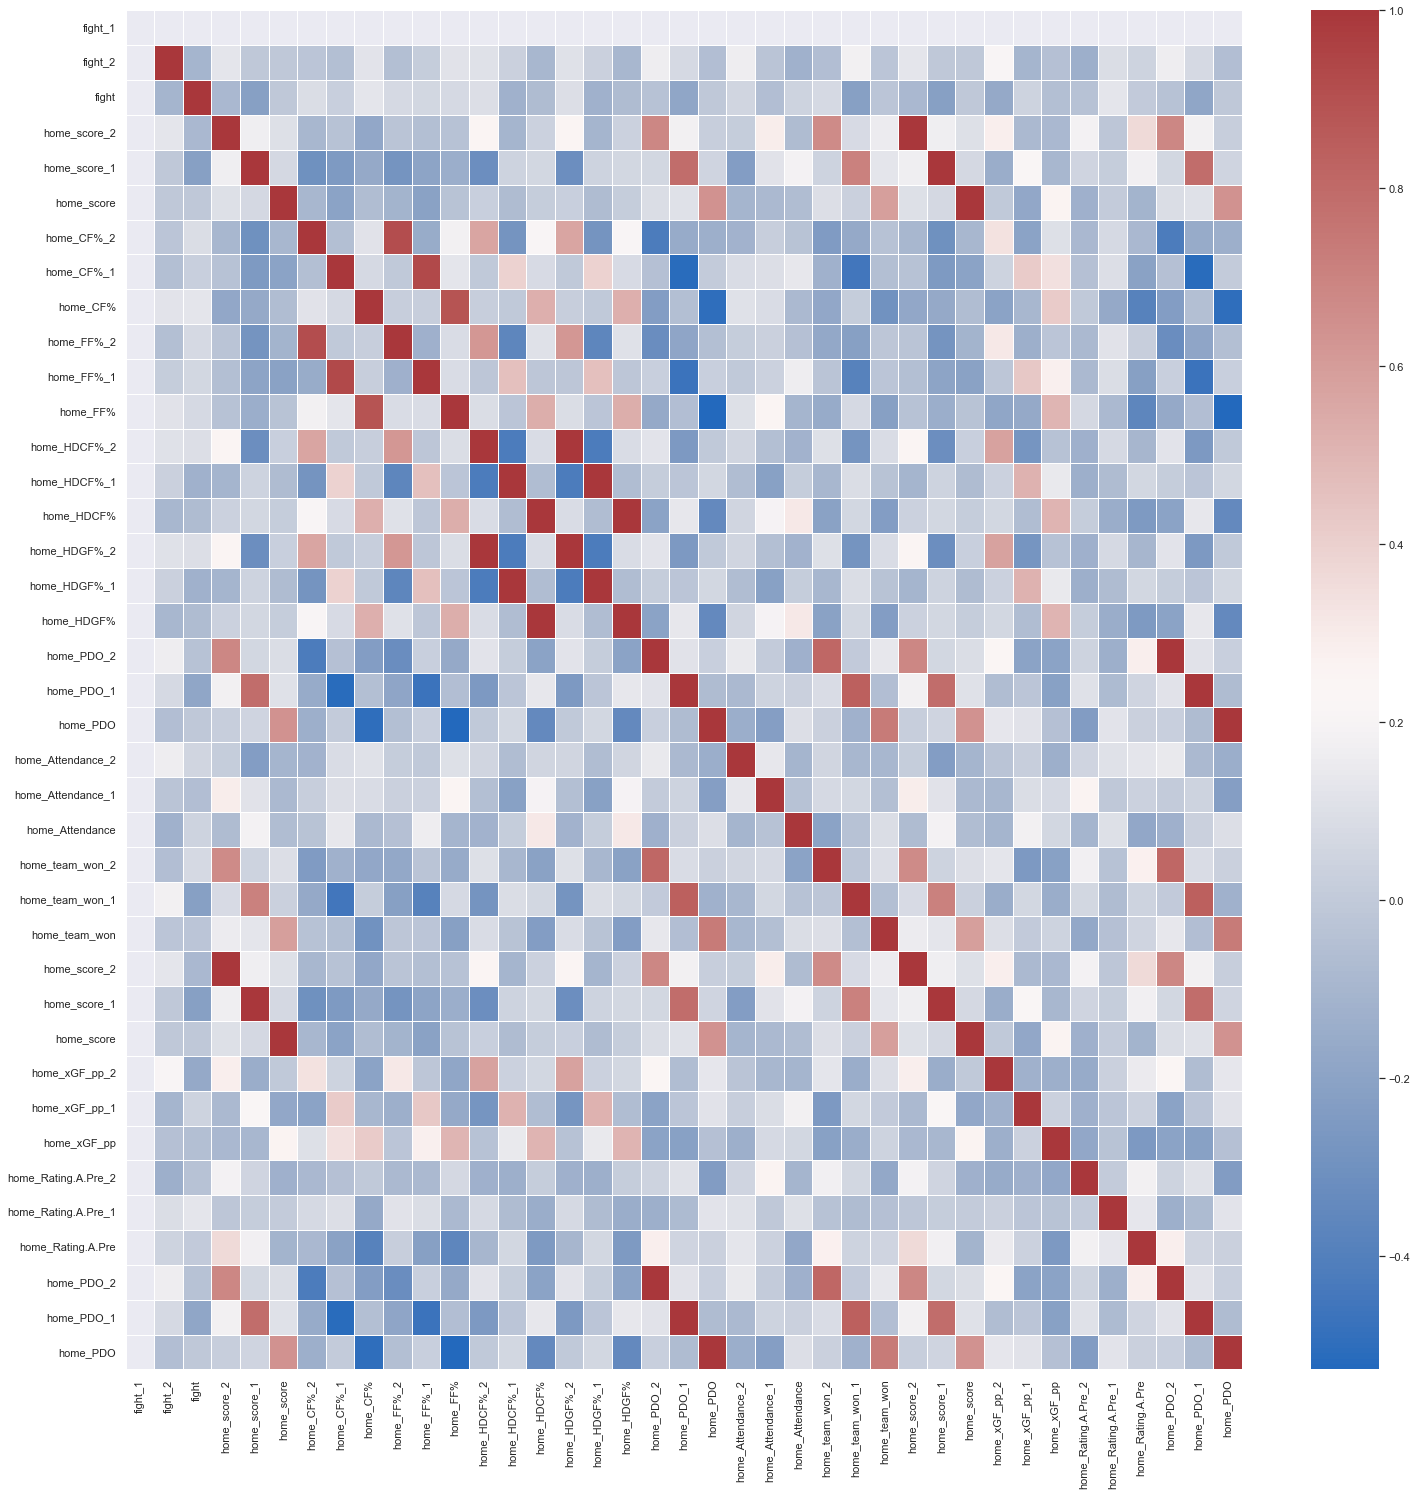

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: EDM


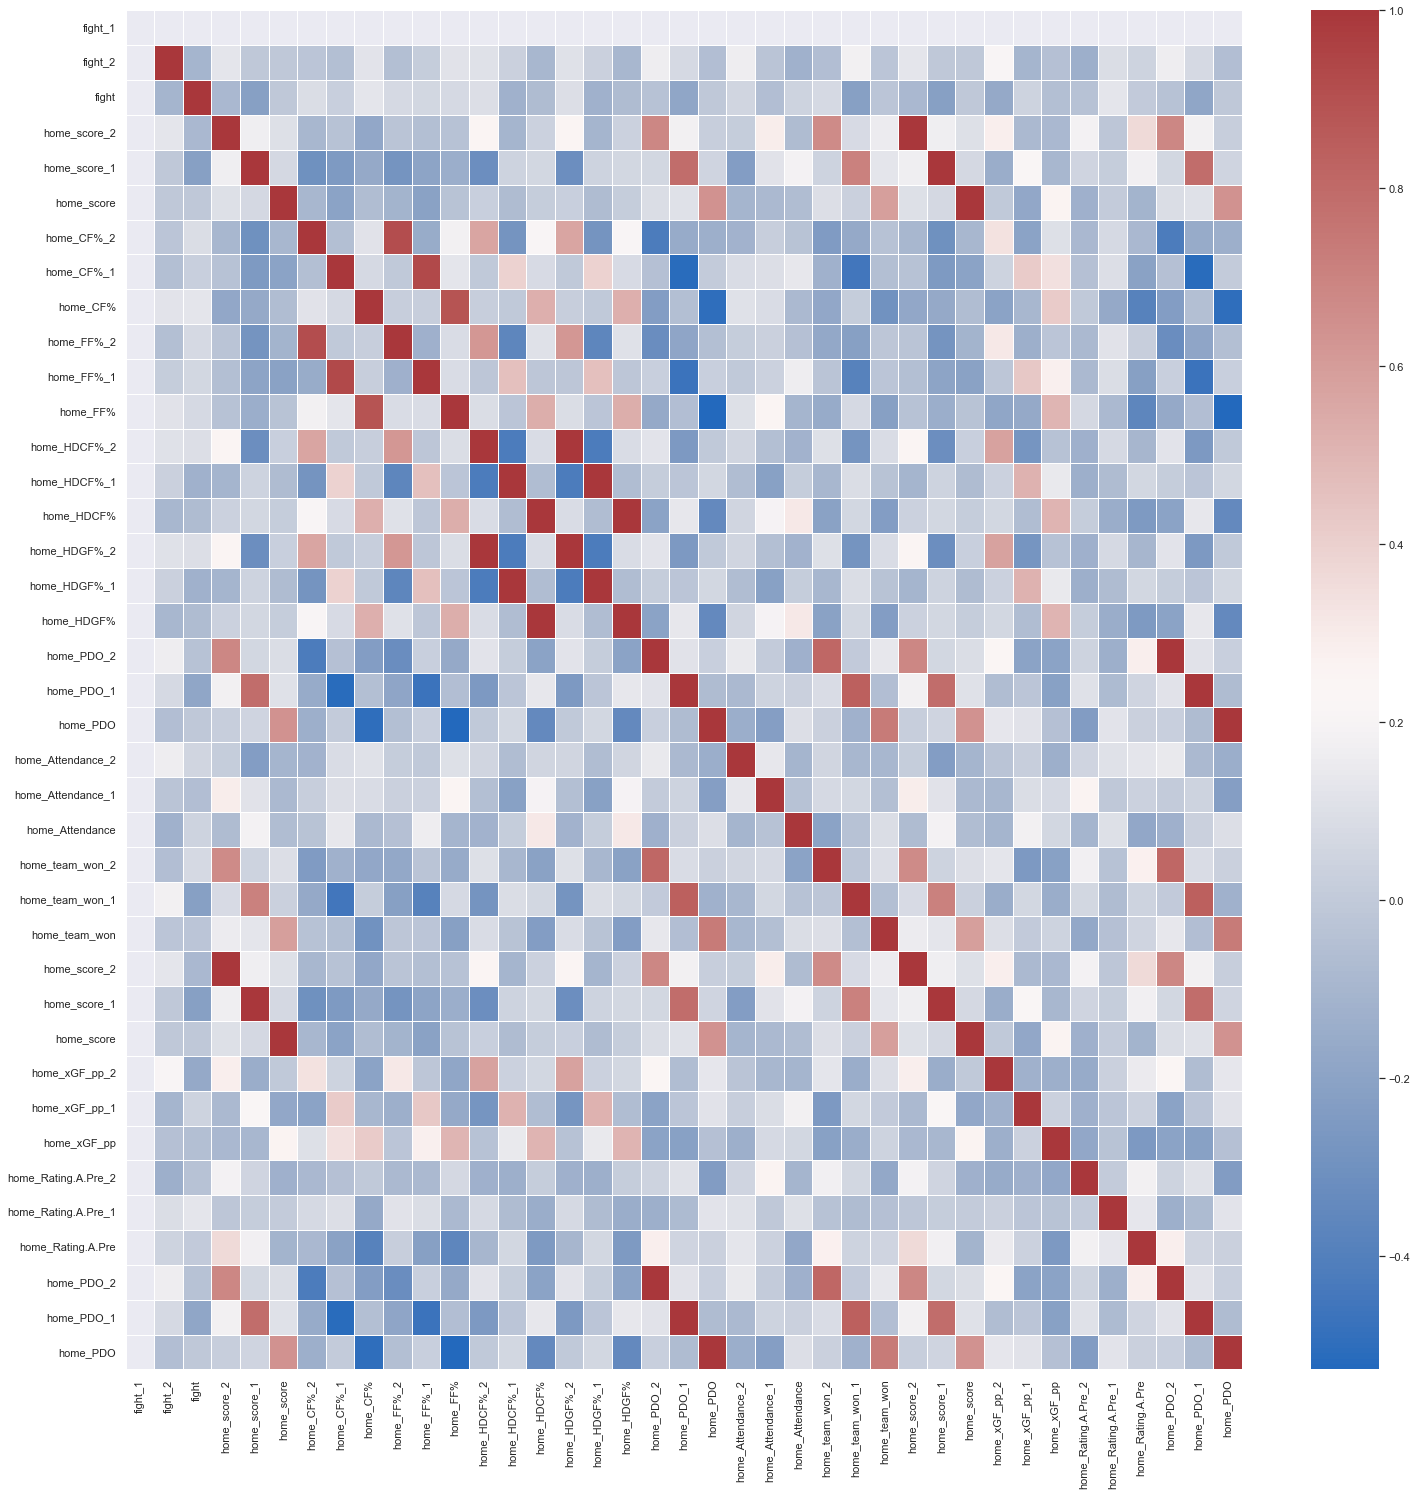

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: SJS


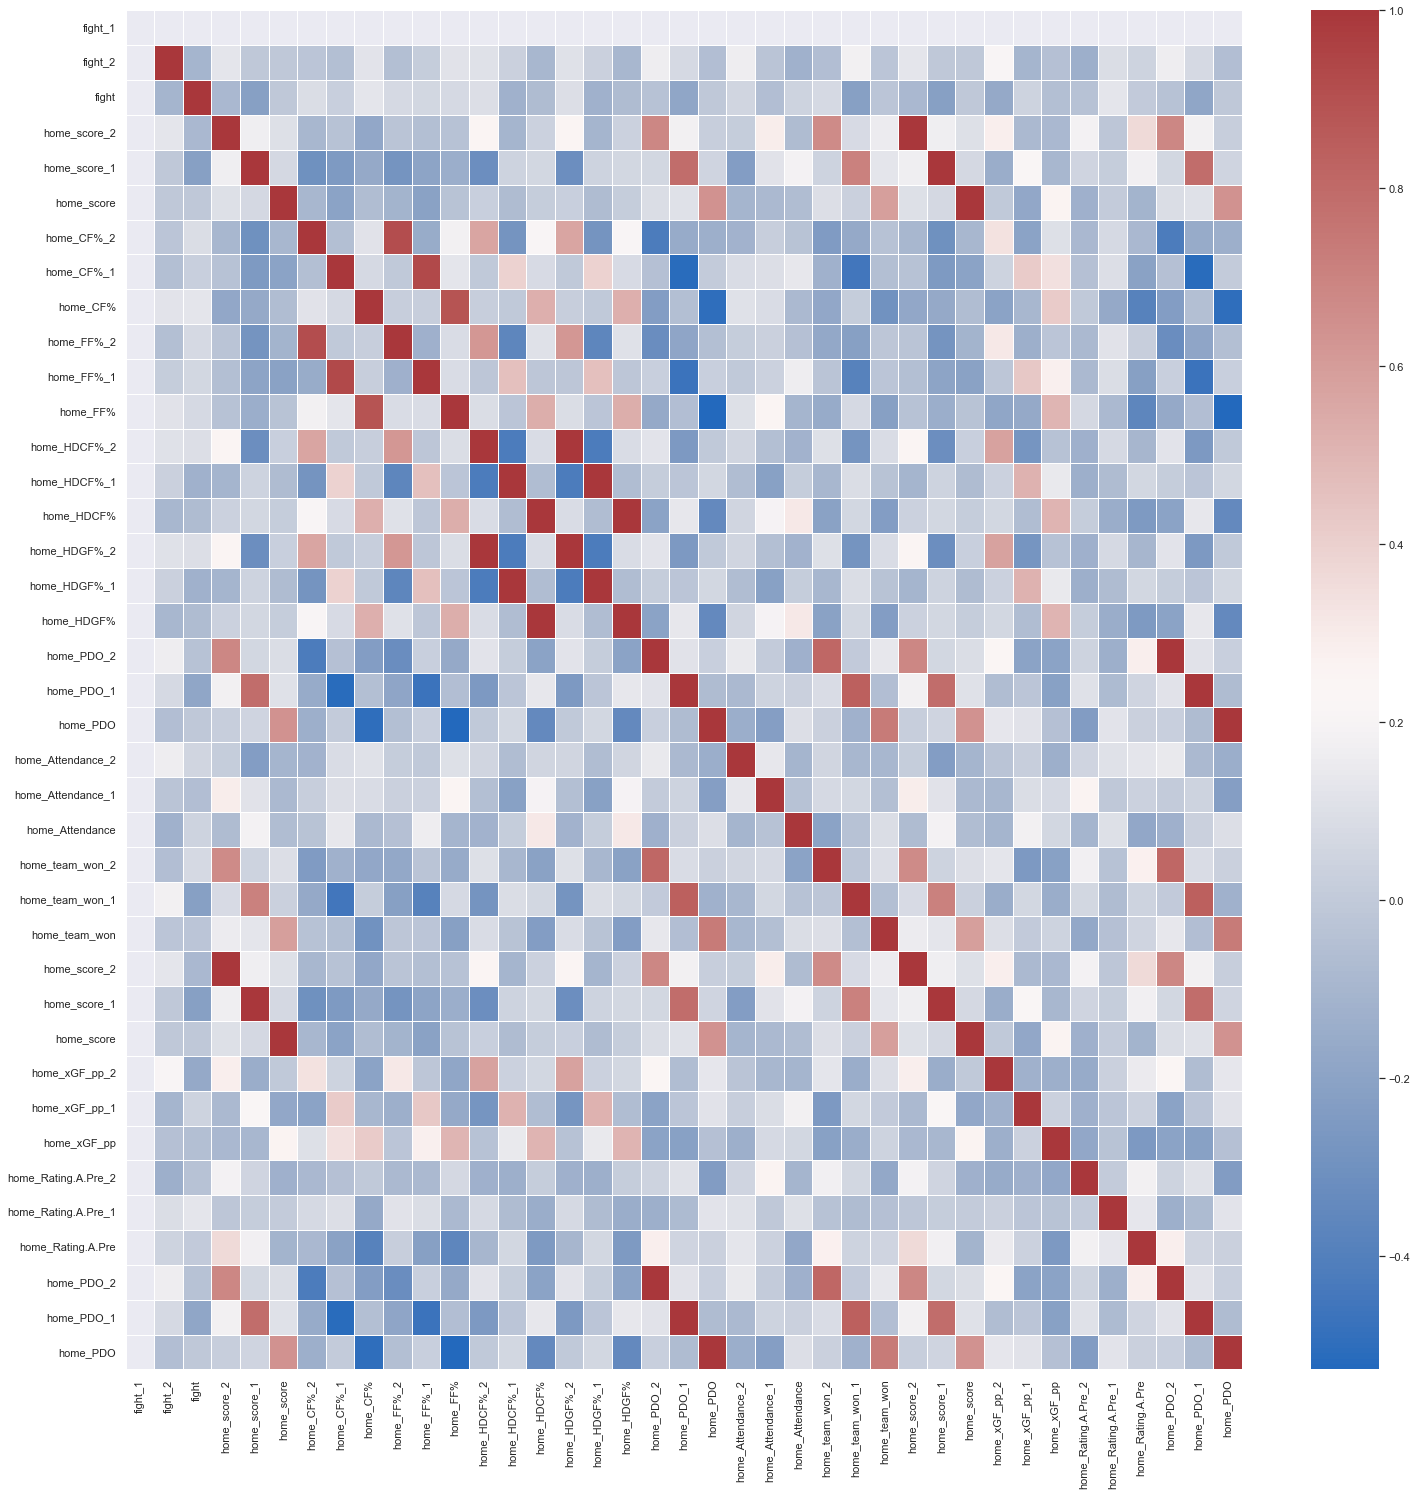

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: WAS


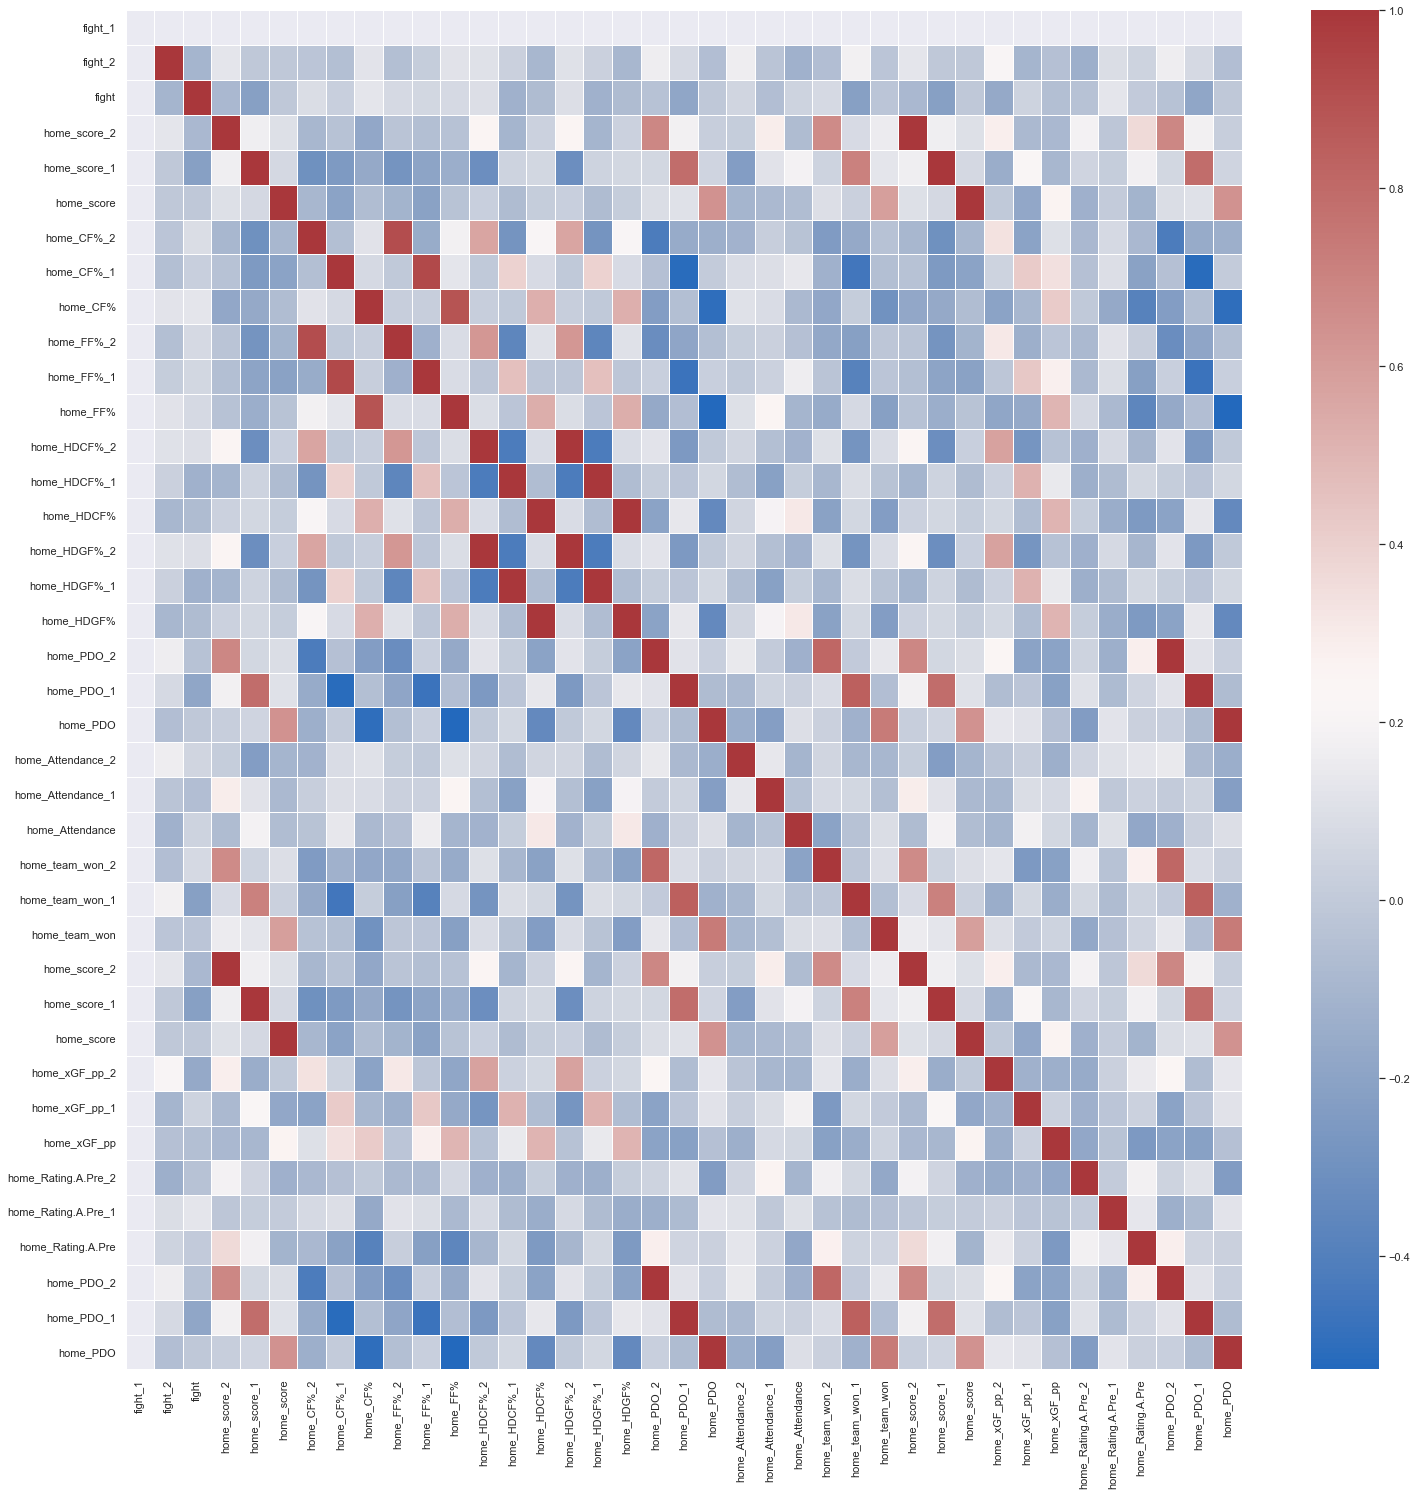

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: WPG


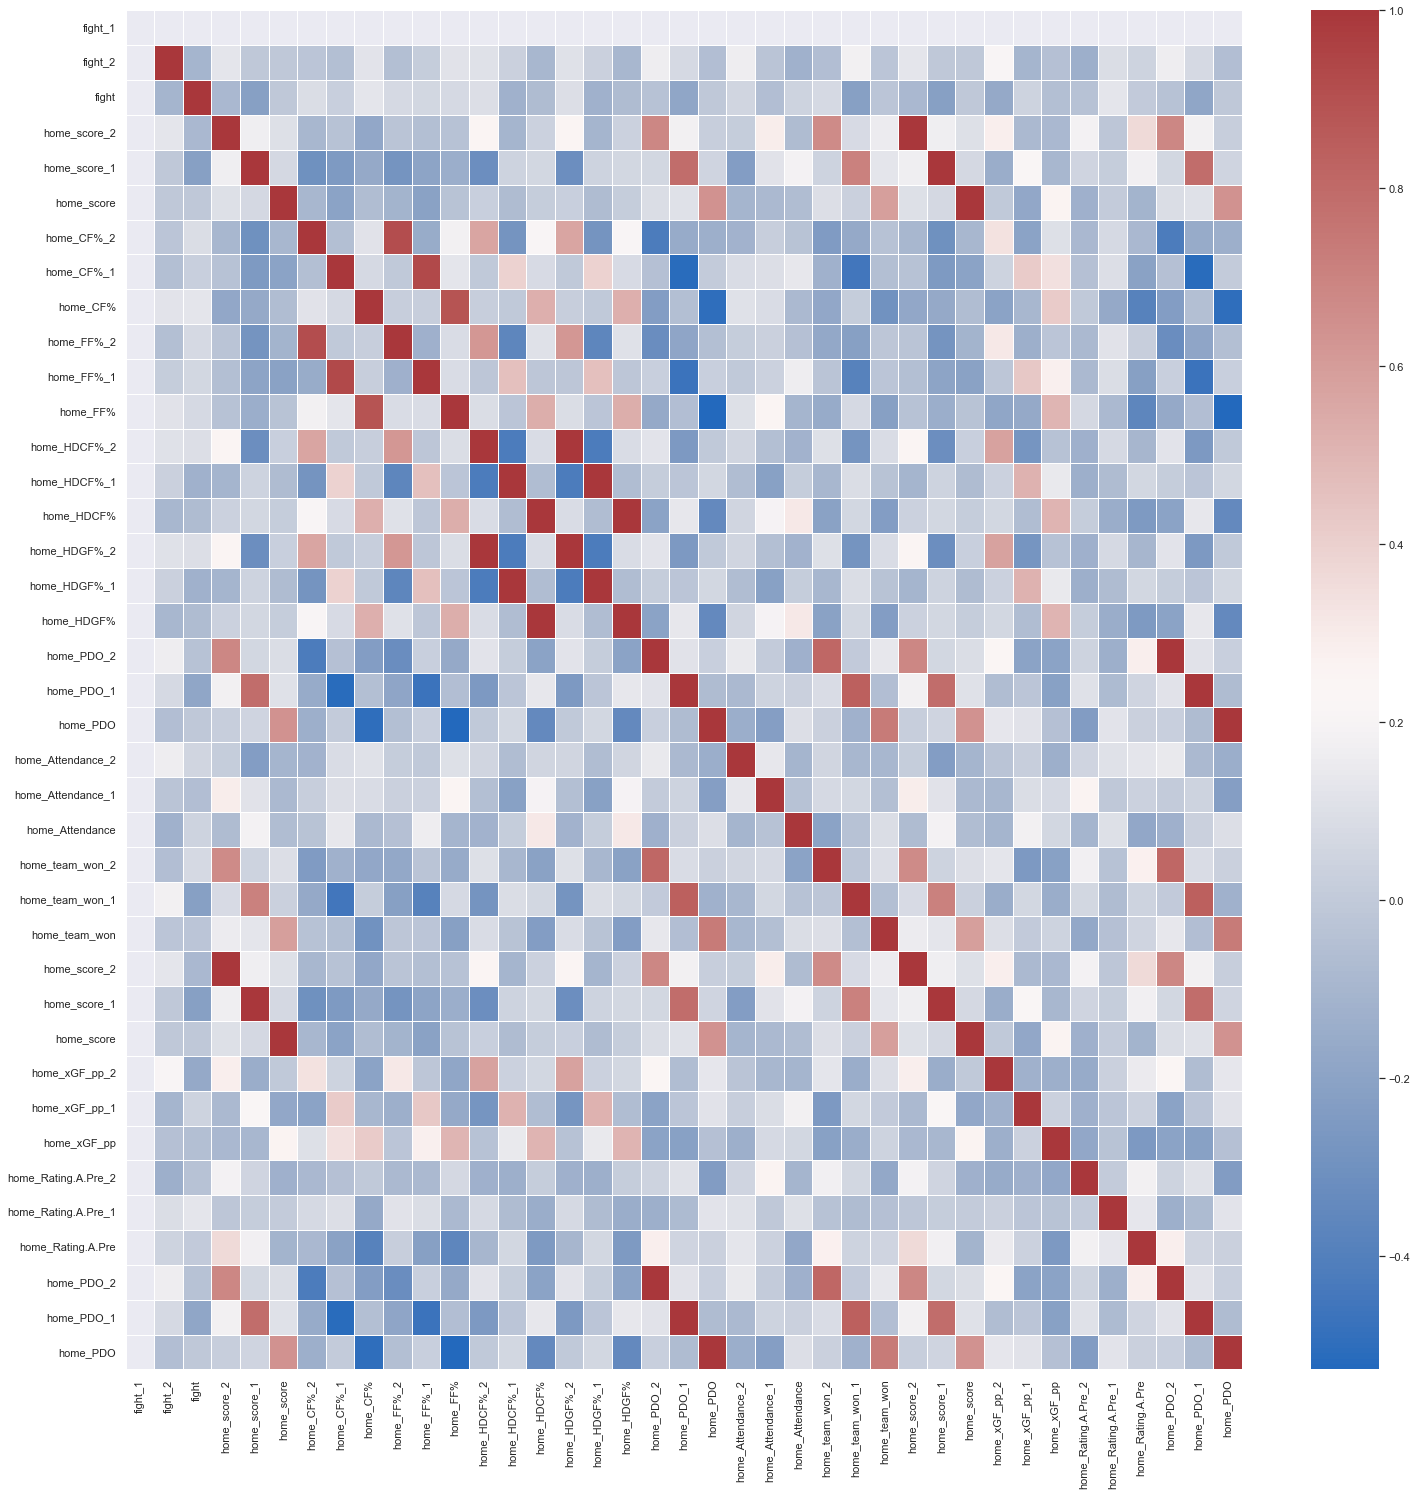

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: MIN


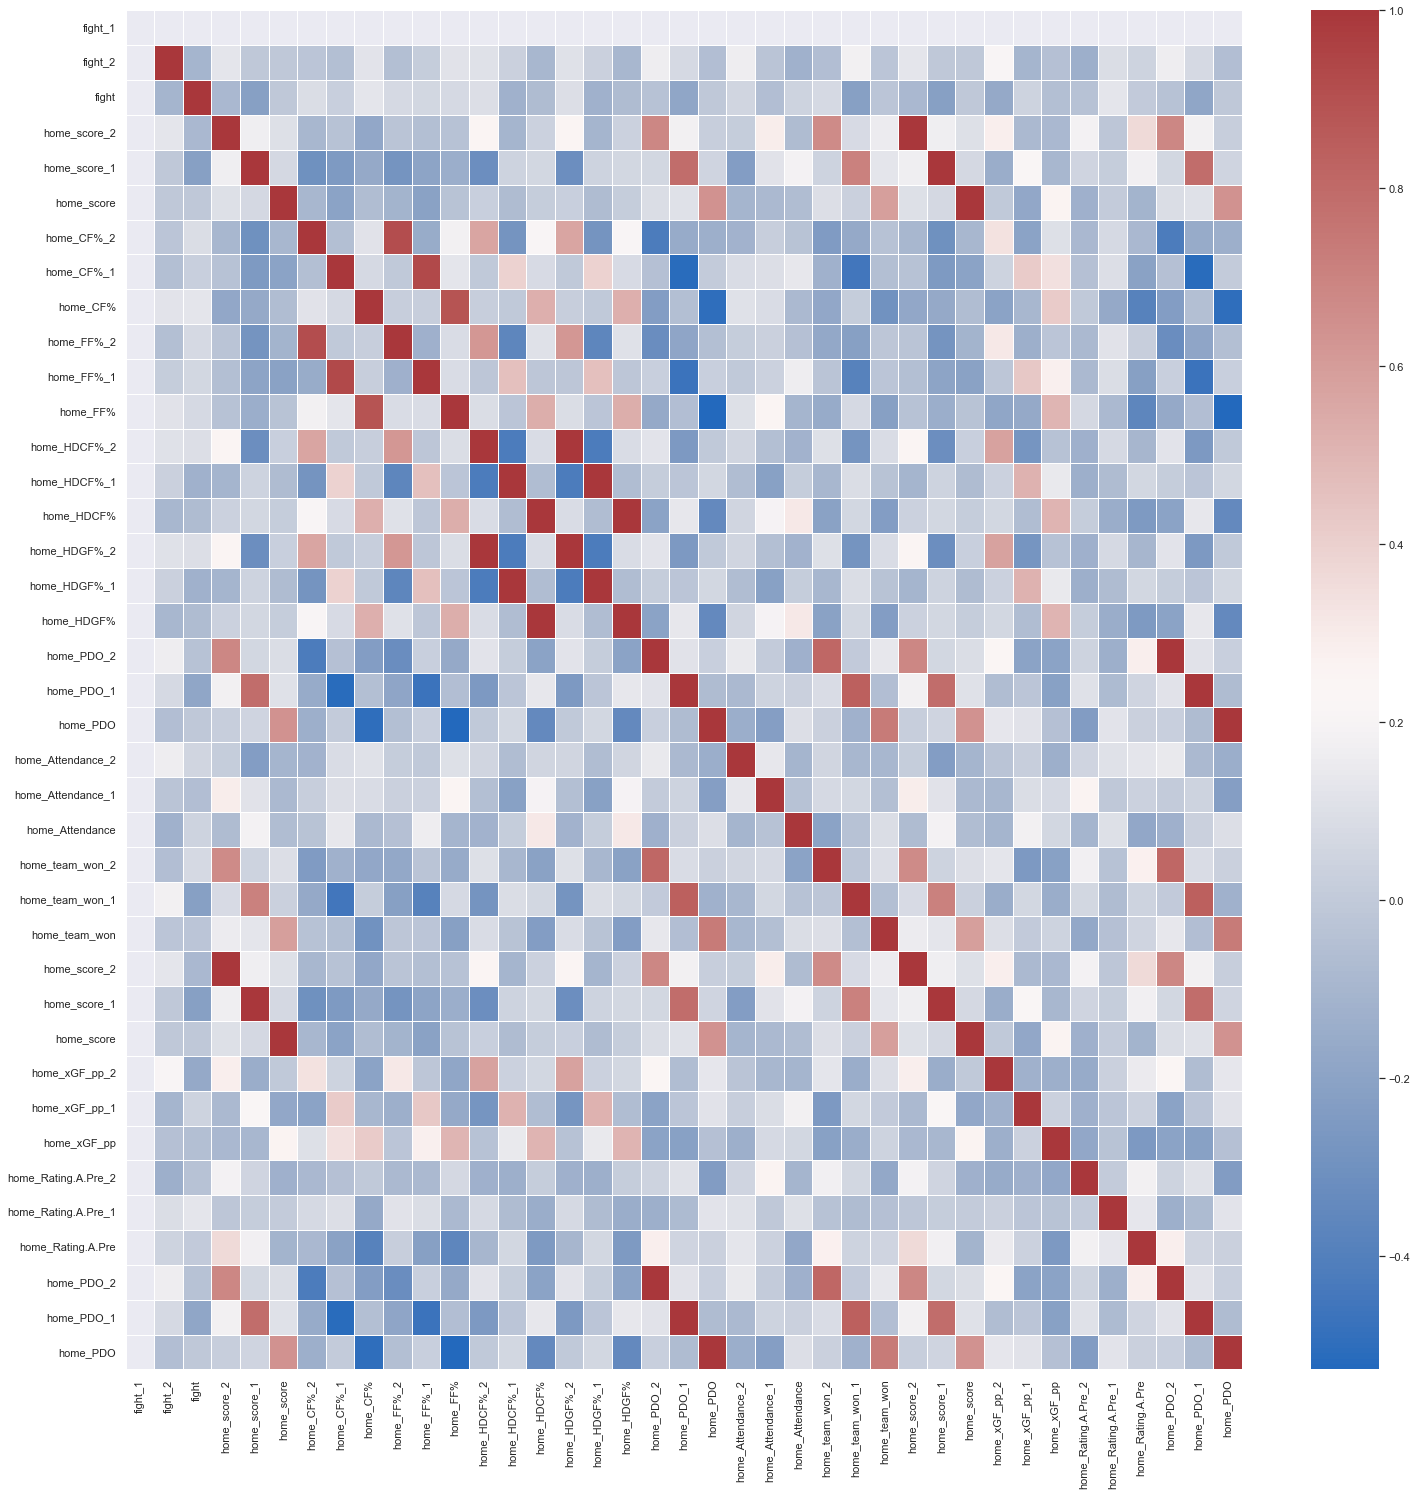

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: BOS


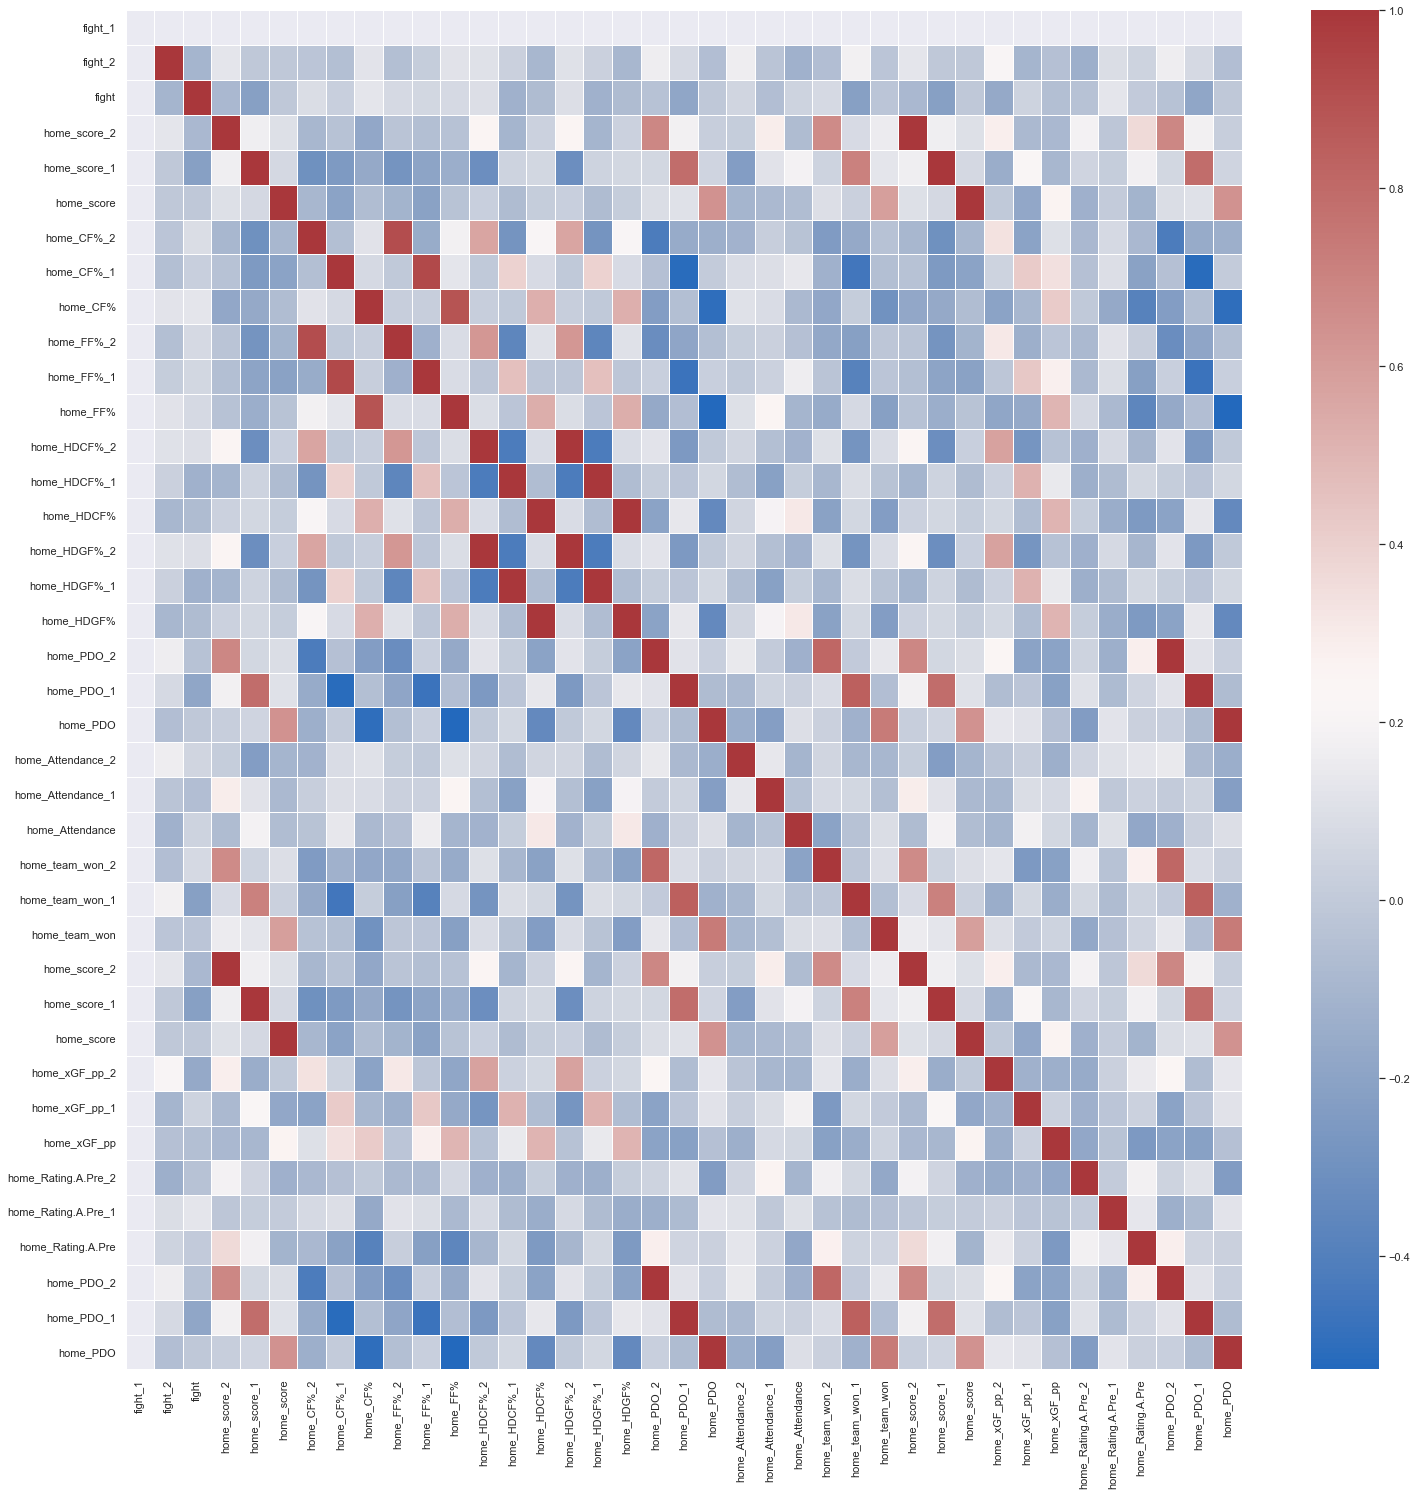

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: PHI


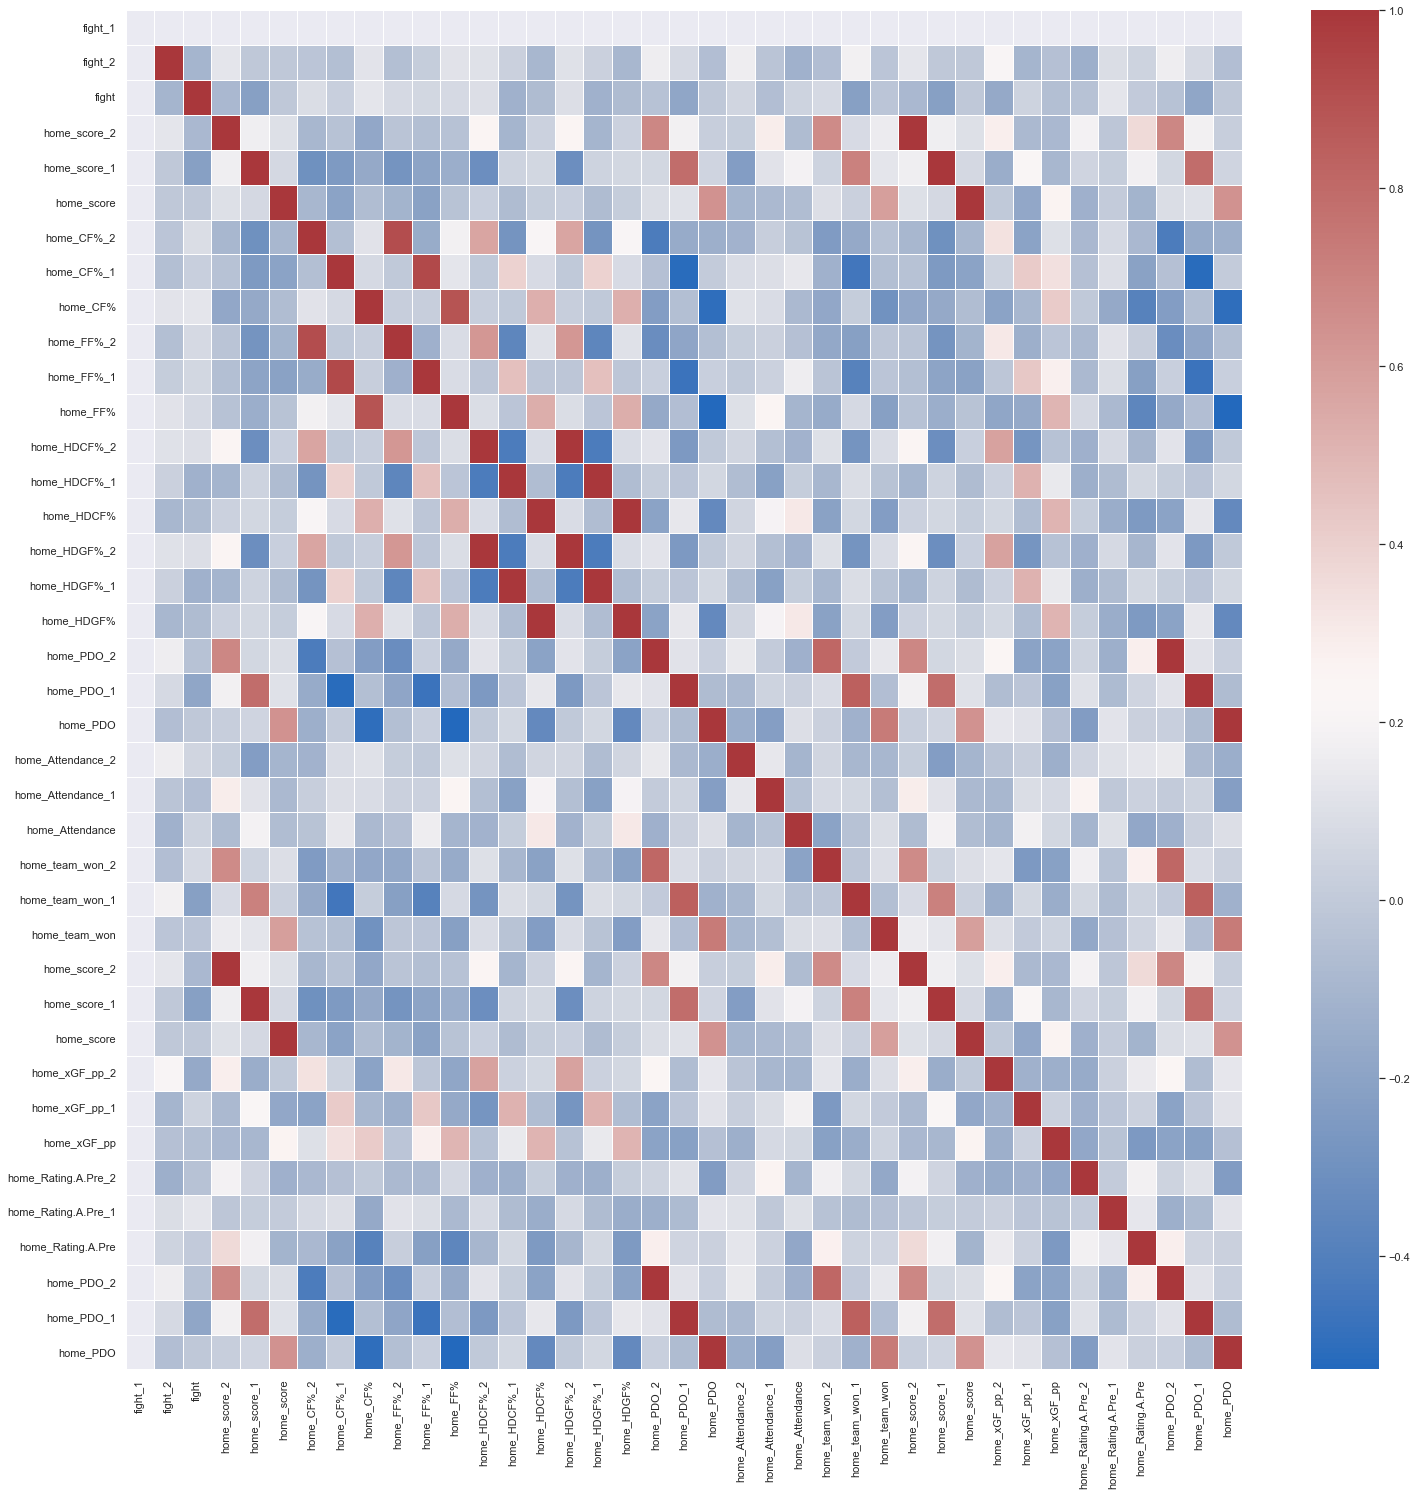

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: NSH


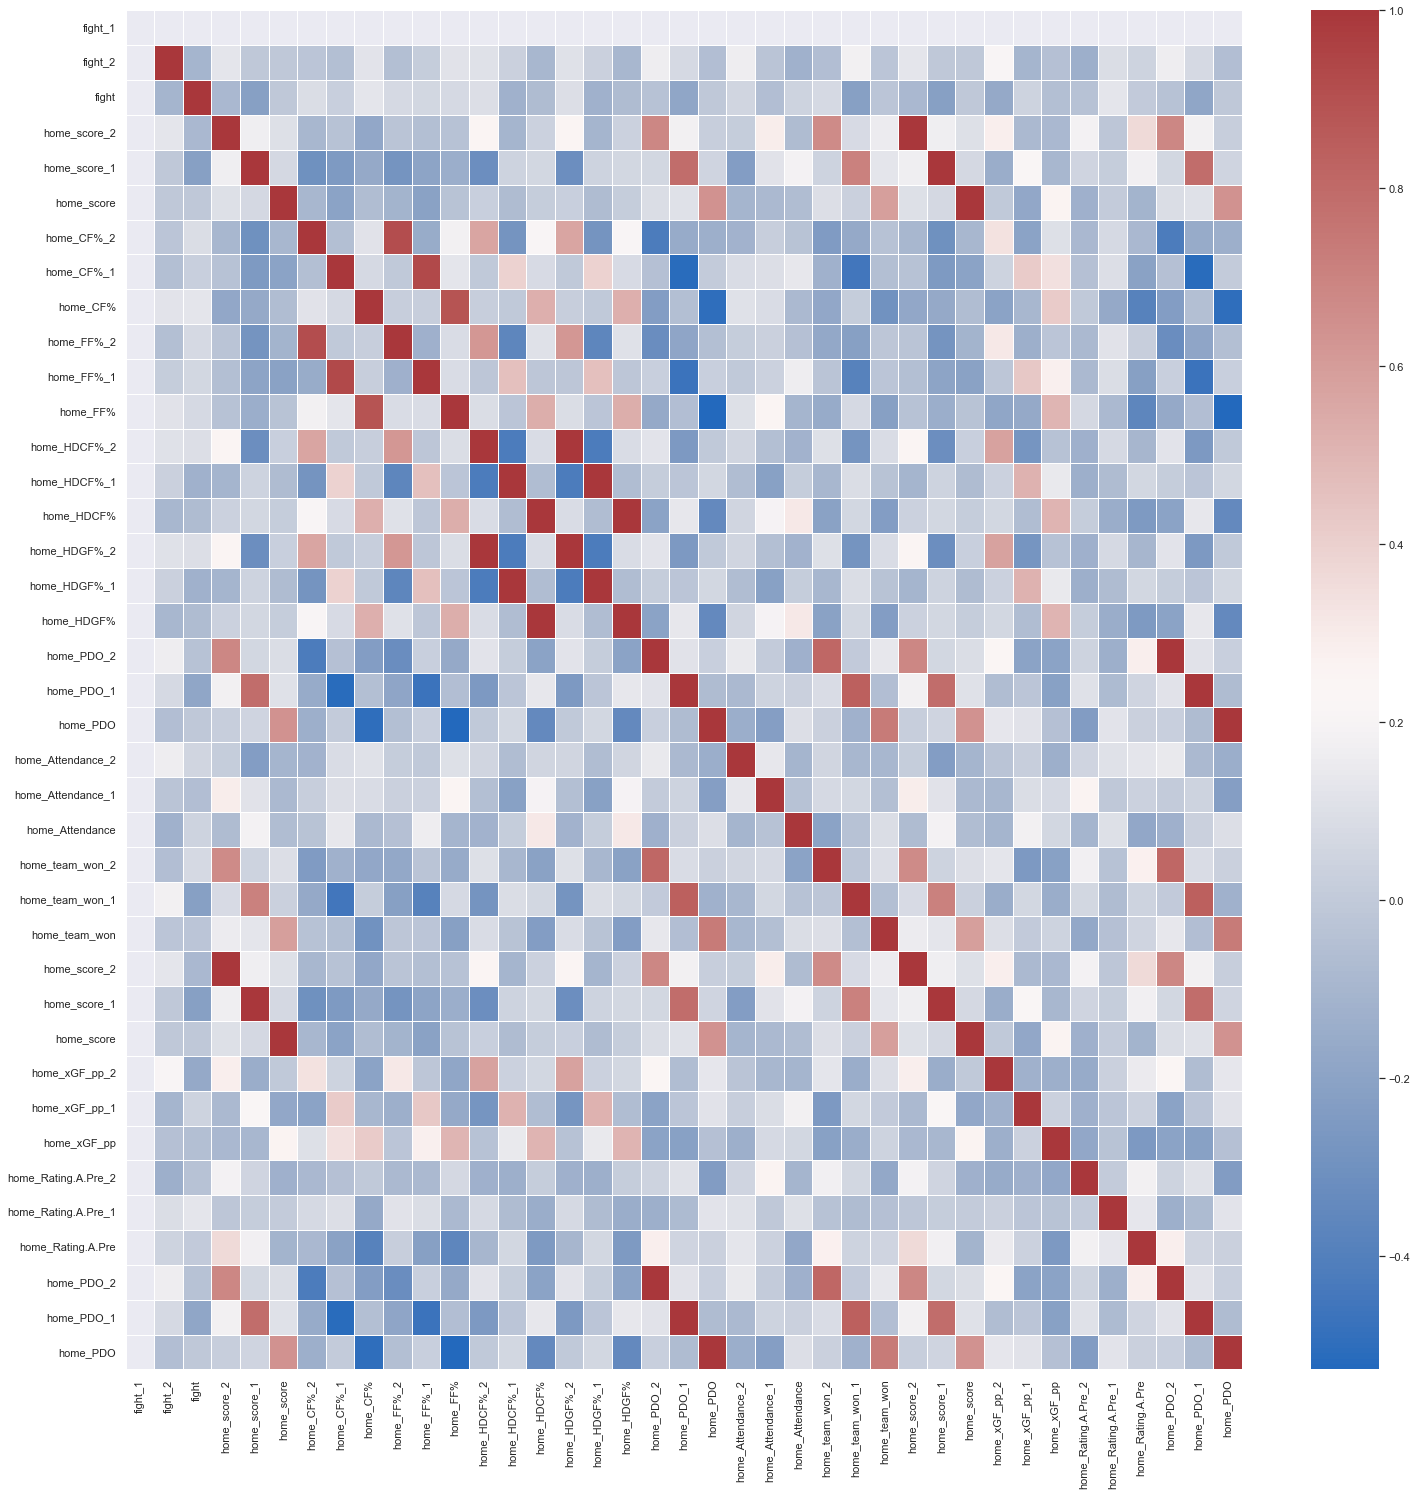

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: CAR


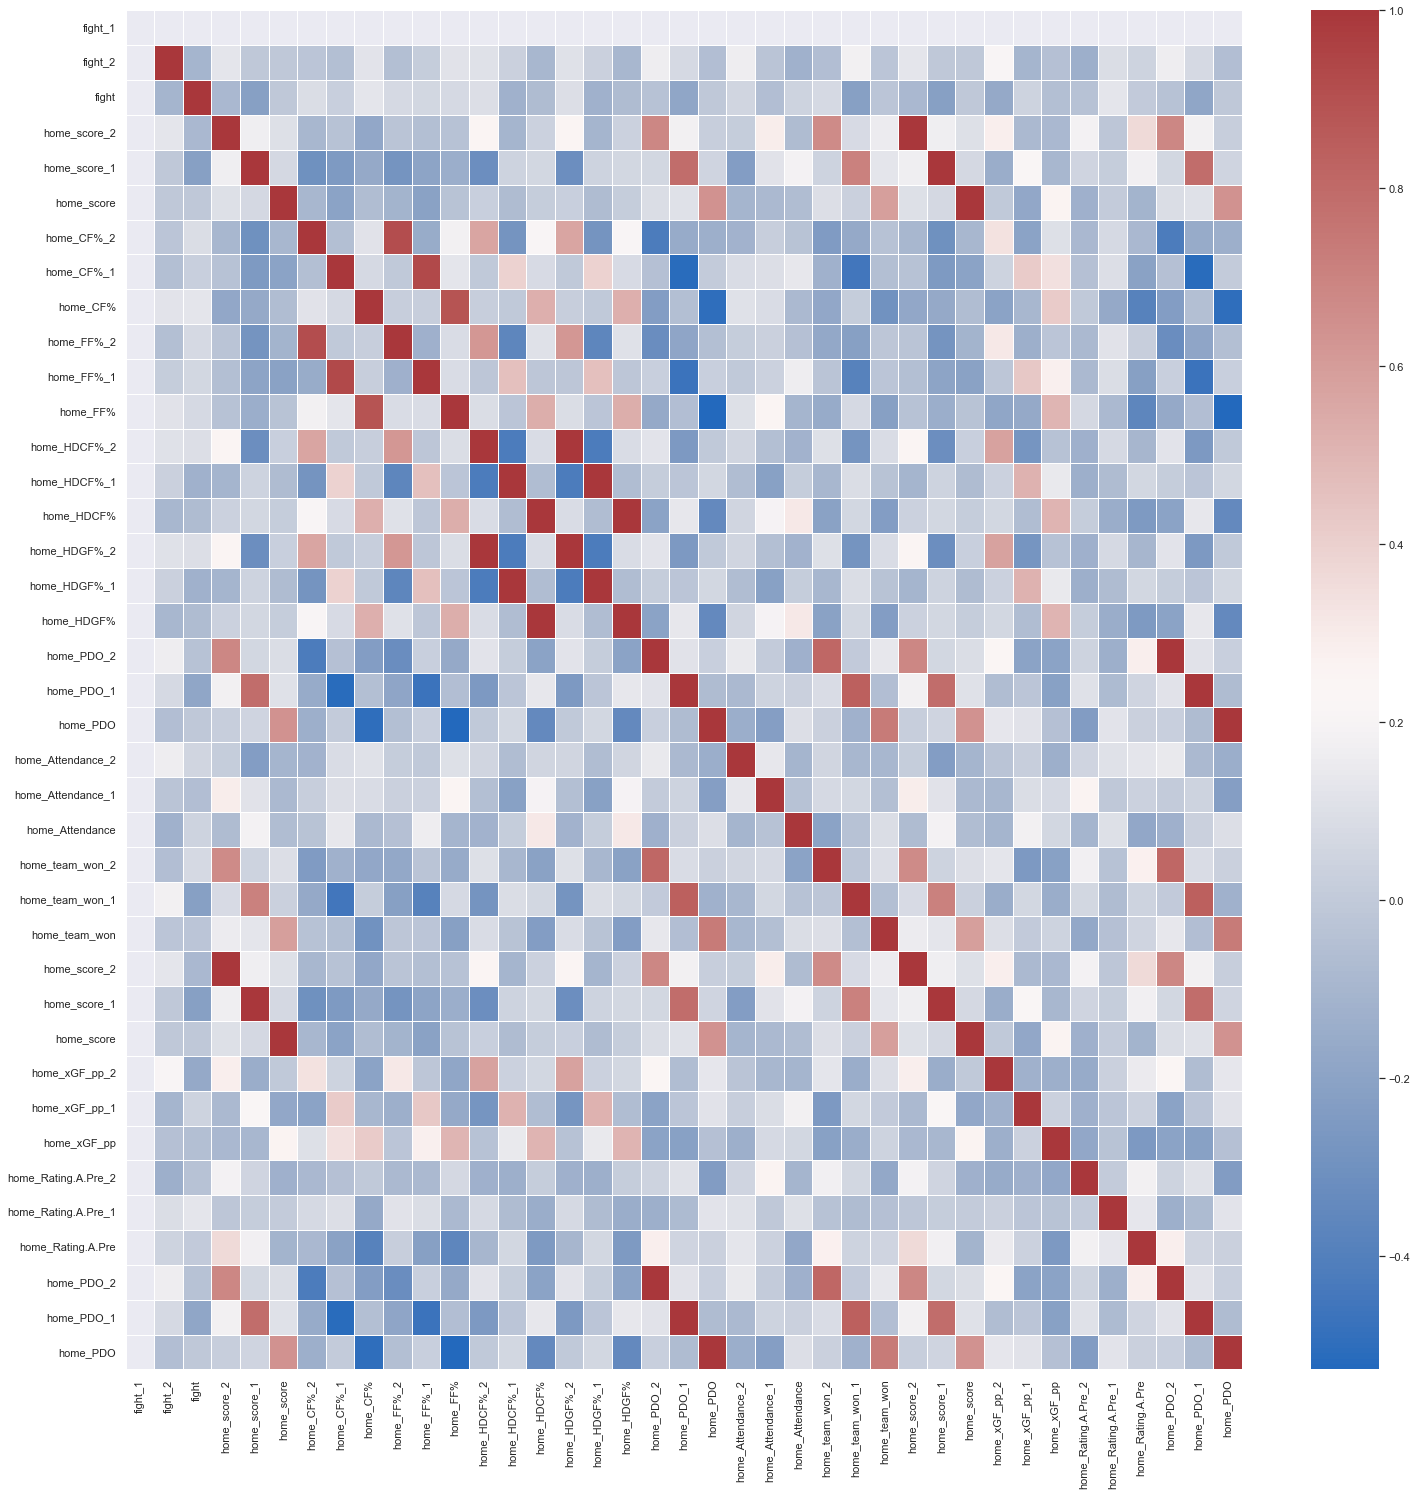

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: TBL


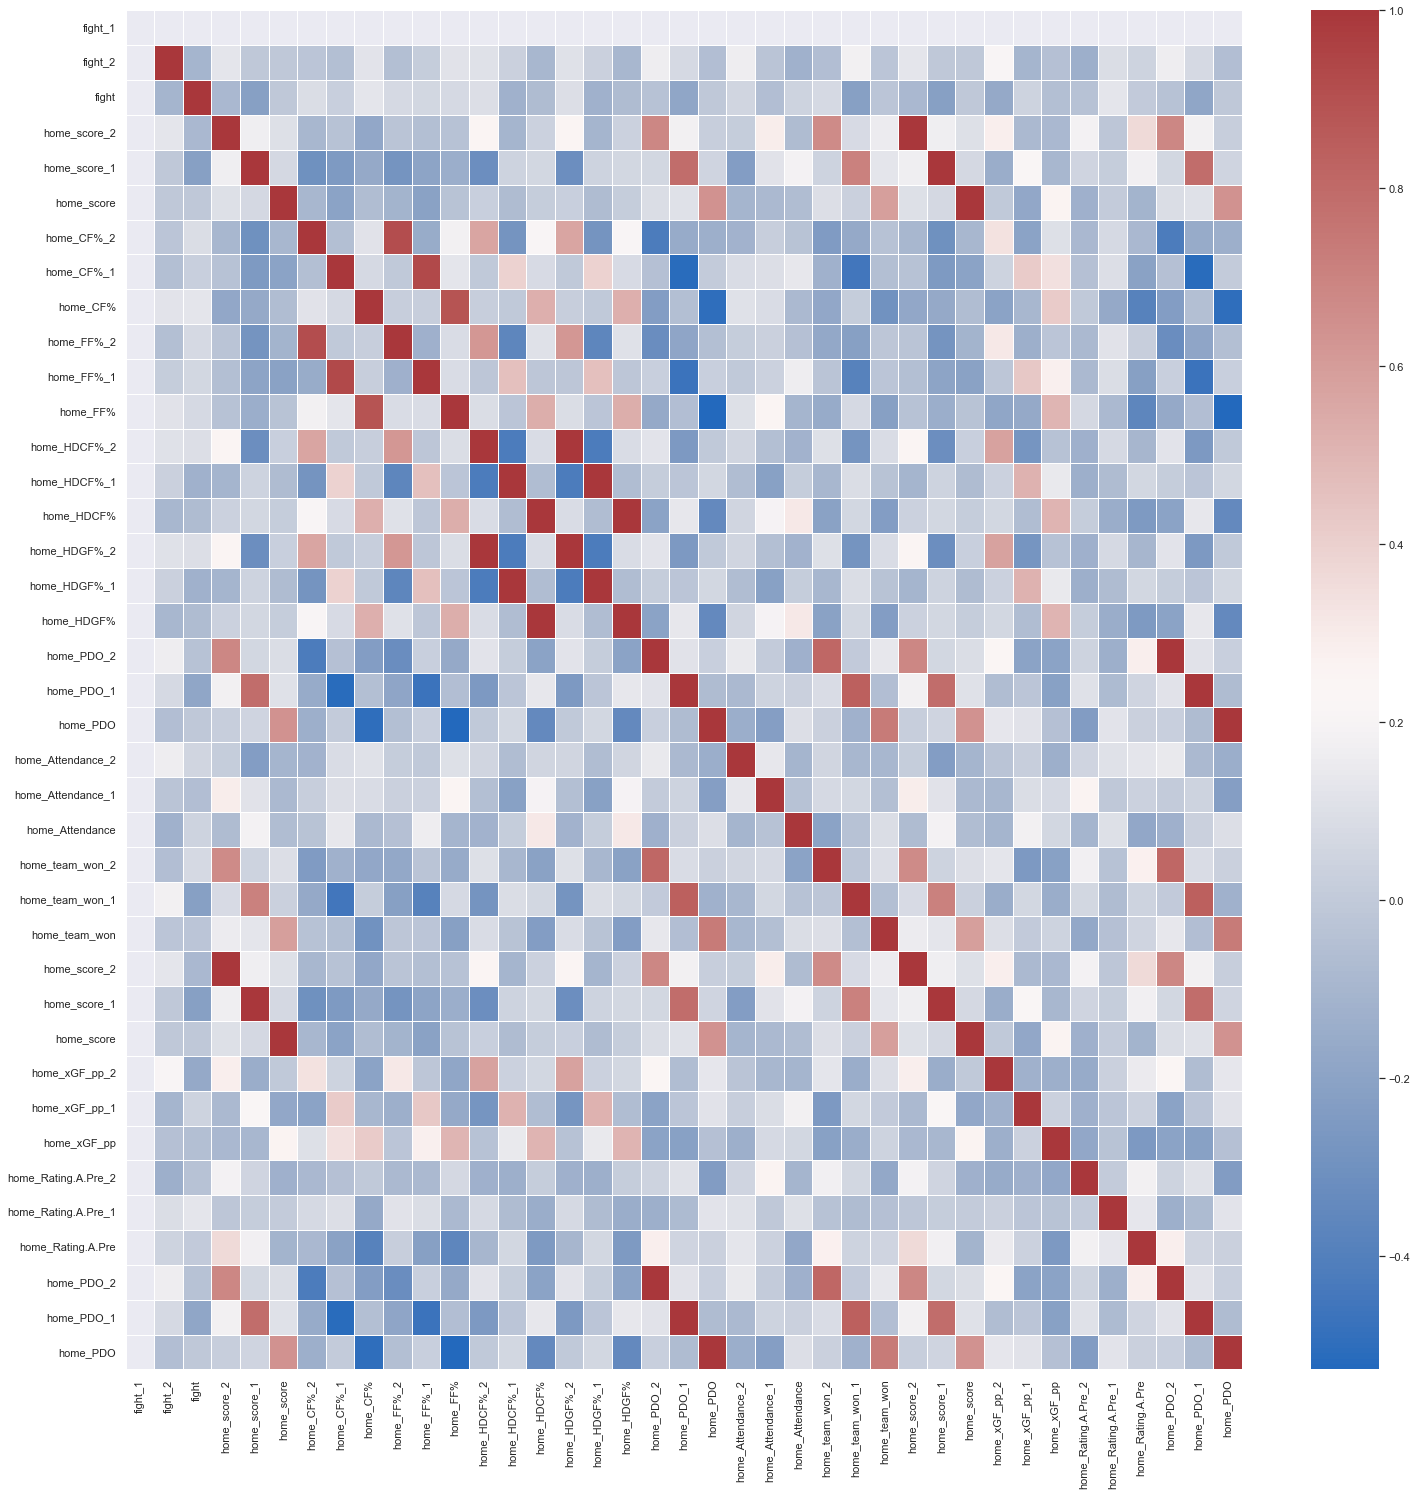

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: DET


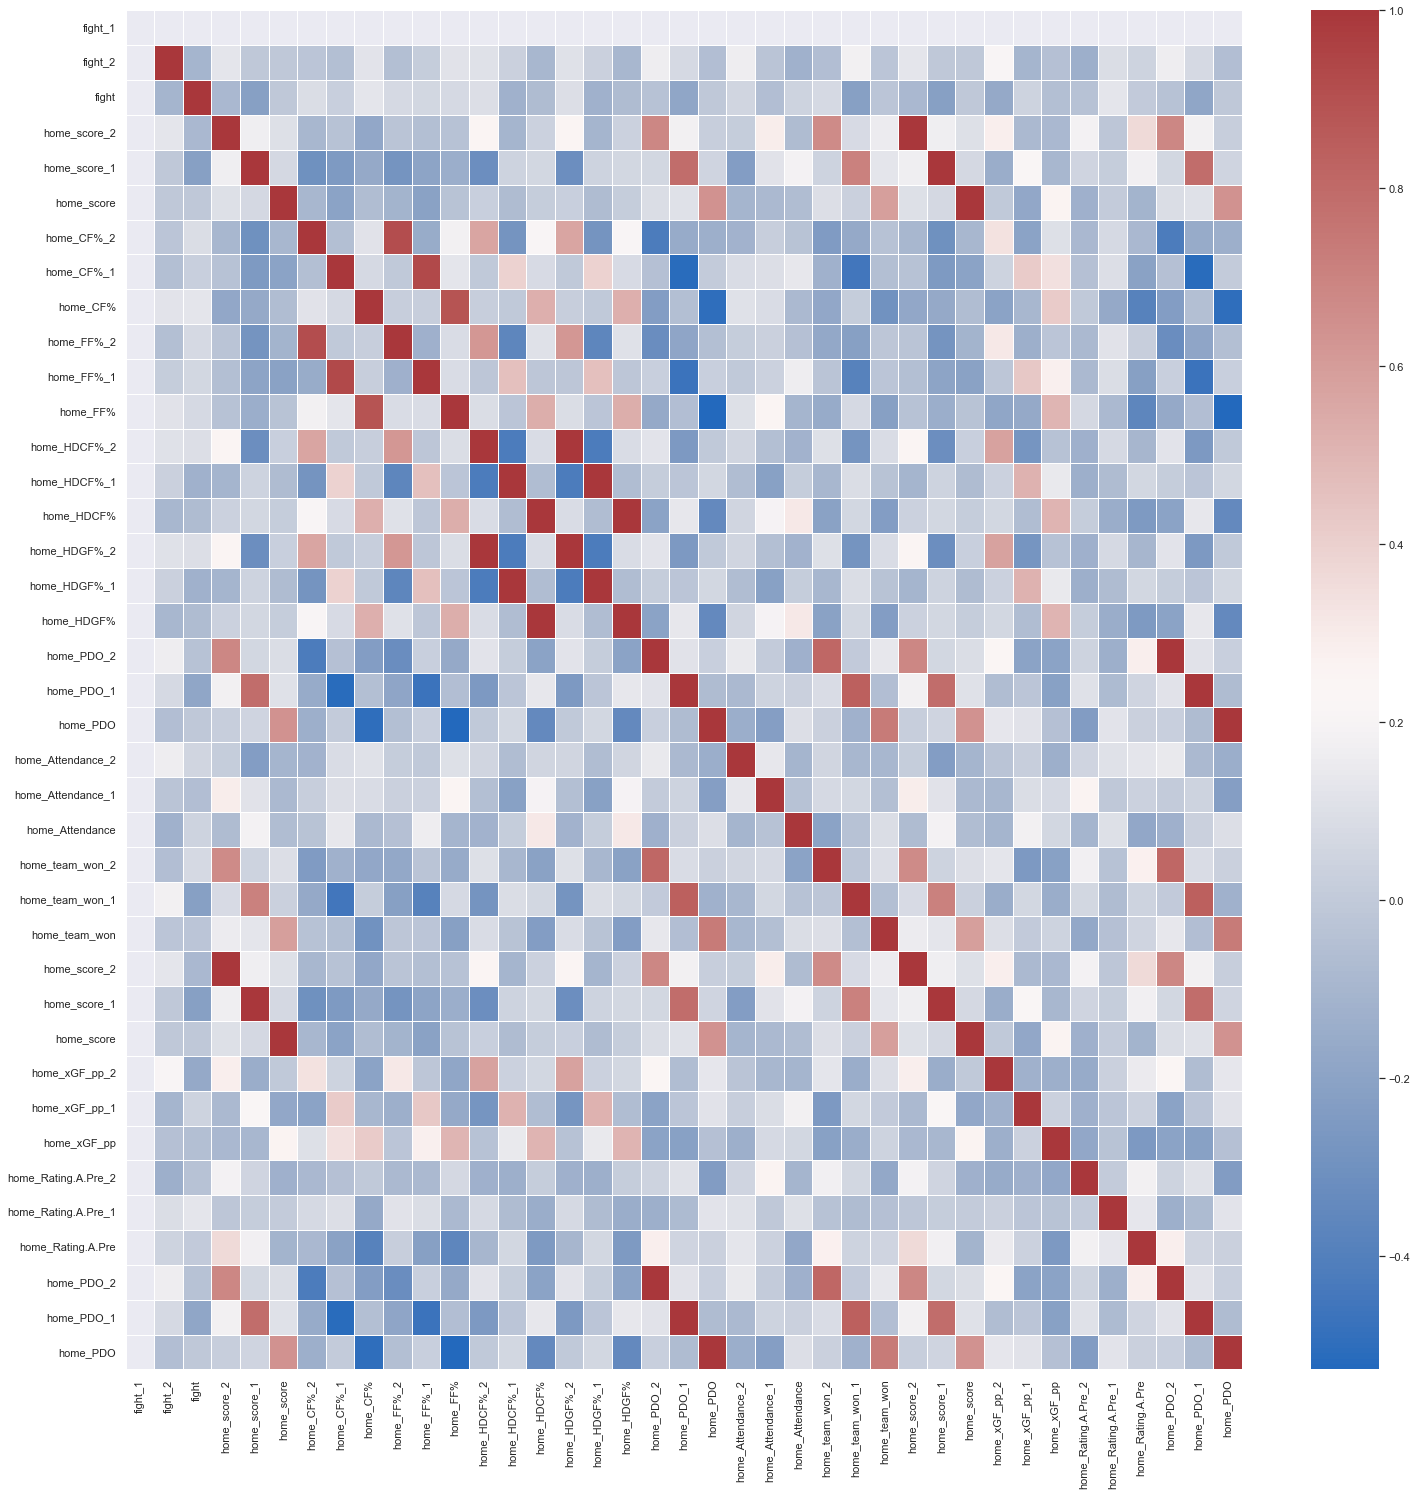

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: TOR


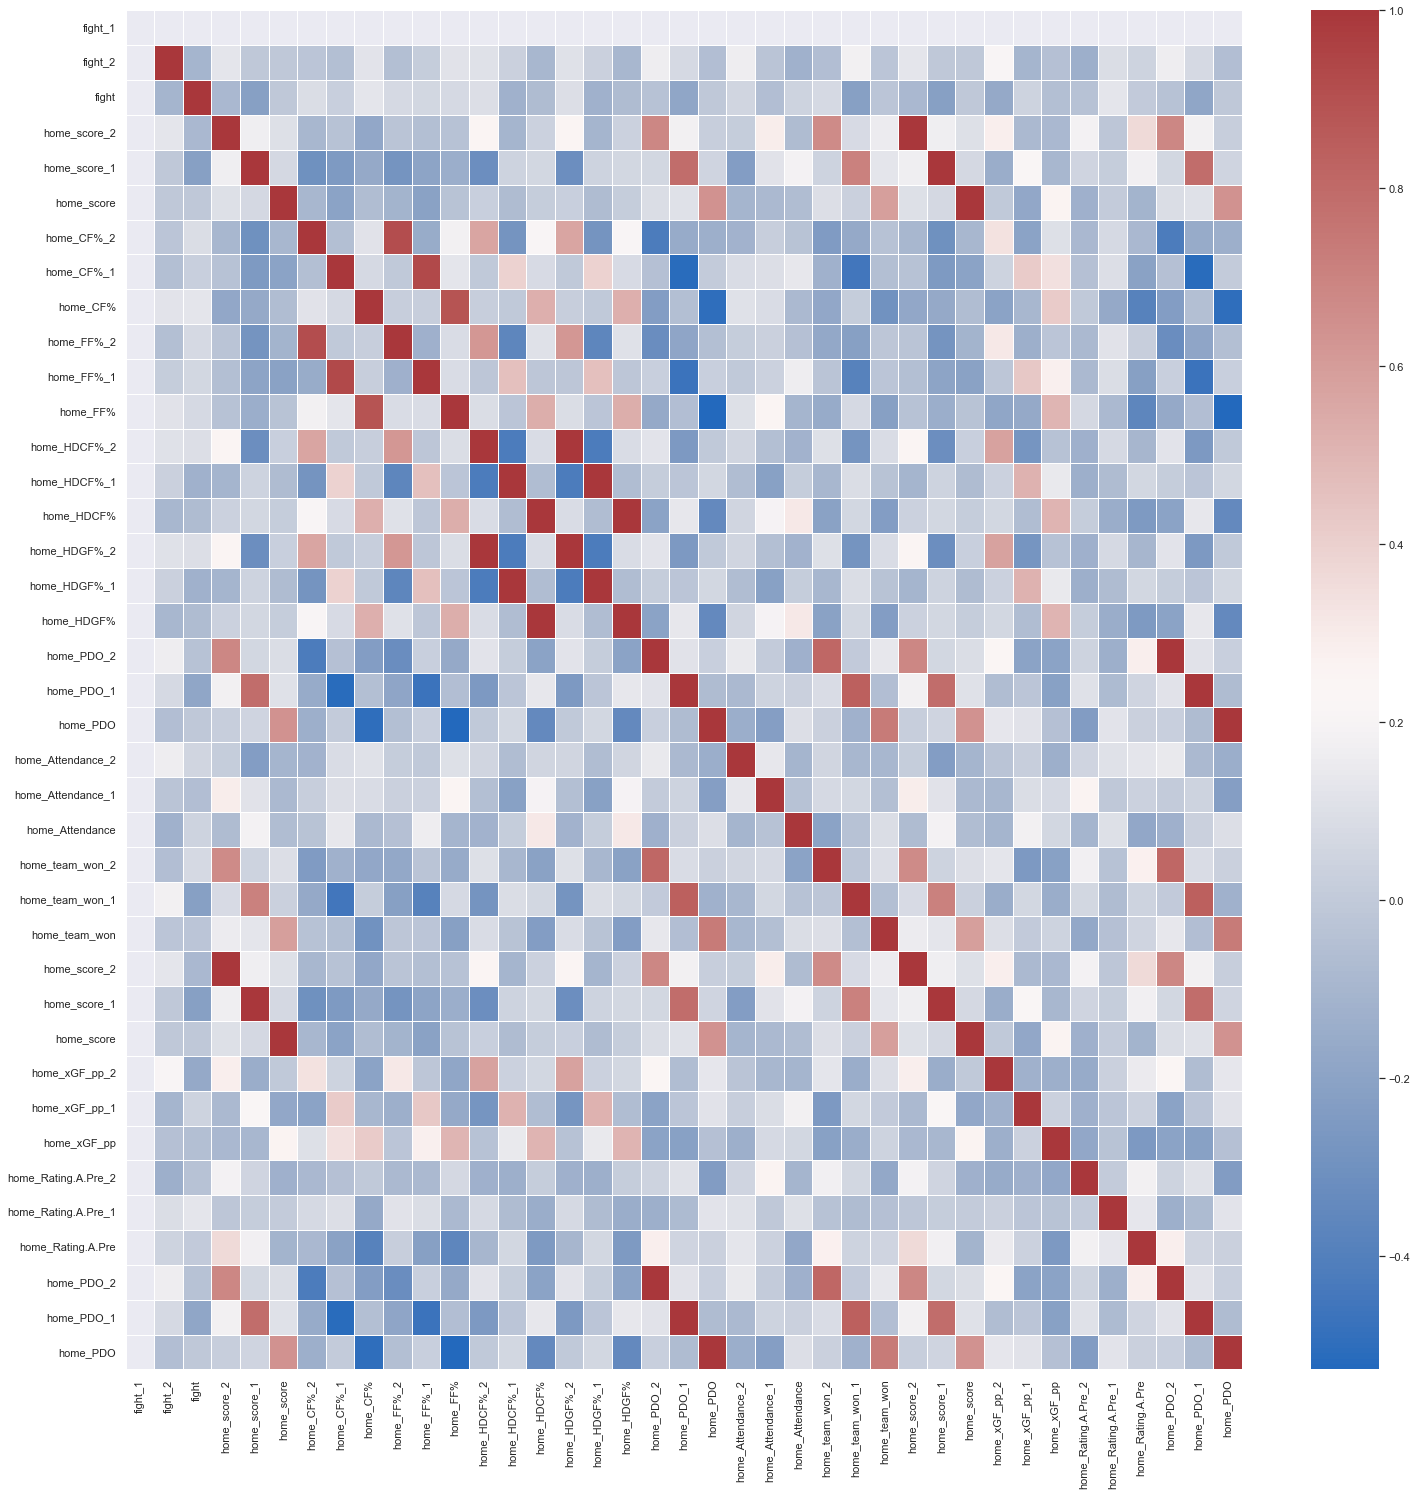

Unnamed: 0_1                     389
game_id_1                 2015020393
date_1           2015-12-05 00:00:00
venue_1             Scottrade Center
home_team_1                      STL
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     515
game_id_1                 2015020515
date_1           2015-12-22 00:00:00
venue_1             Gila River Arena
home_team_1                      ARI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     599
game_id_1                 2015020600
date_1           2016-01-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        616
game_id_1                    2015020619
date_1              2016-01-09 00:00:00
venue_1          SAP Center at San Jose
home_team_1                         SJS
                          ...          
B2B_Status                    Away_only
Season                         20152016
fight                               0.0
home_team_won                         0
away_team_won                         1
Length: 816, dtype: object

Unnamed: 0_1                     664
game_id_1                 2015020662
date_1           2016-01-16 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     684
game_id_1                 2015020684
date_1           2016-01-19 00:00:00
venue_1           Wells Fargo Center
home_team_1                      PHI
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     733
game_id_1                 2015020736
date_1           2016-01-26 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     938
game_id_1                 2015020940
date_1           2016-02-29 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20152016
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     975
game_id_1                 2015020974
date_1           2016-03-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20152016
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                        0
game_id_1                  2016020001
date_1            2016-10-12 00:00:00
venue_1          Canadian Tire Centre
home_team_1                       OTT
                         ...         
B2B_Status                    Neither
Season                       20162017
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                      17
game_id_1                 2016020017
date_1           2016-10-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     163
game_id_1                 2016020163
date_1           2016-11-05 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     232
game_id_1                 2016020233
date_1           2016-11-15 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     312
game_id_1                 2016020313
date_1           2016-11-26 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     362
game_id_1                 2016020367
date_1           2016-12-03 00:00:00
venue_1                 Rogers Arena
home_team_1                      VAN
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     390
game_id_1                 2016020391
date_1           2016-12-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     425
game_id_1                 2016020425
date_1           2016-12-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     502
game_id_1                 2016020503
date_1           2016-12-22 00:00:00
venue_1                 Pepsi Center
home_team_1                      COL
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2016020559
date_1           2017-01-01 00:00:00
venue_1           Exhibition Stadium
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     593
game_id_1                 2016020594
date_1           2017-01-07 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     773
game_id_1                 2016020774
date_1           2017-02-04 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                 Home_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     821
game_id_1                 2016020821
date_1           2017-02-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     837
game_id_1                 2016020838
date_1           2017-02-14 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2016020885
date_1           2017-02-21 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1089
game_id_1                 2016021091
date_1           2017-03-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20162017
fight                            1.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1131
game_id_1                 2016021131
date_1           2017-03-28 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                    1198
game_id_1                 2016021198
date_1           2017-04-06 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                      Both
Season                      20162017
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                      45
game_id_1                 2017020046
date_1           2017-10-11 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     122
game_id_1                 2017020123
date_1           2017-10-23 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     250
game_id_1                 2017020250
date_1           2017-11-11 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     297
game_id_1                 2017020298
date_1           2017-11-18 00:00:00
venue_1                  Centre Bell
home_team_1                      MON
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     386
game_id_1                 2017020387
date_1           2017-11-30 00:00:00
venue_1                 Rogers Place
home_team_1                      EDM
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     516
game_id_1                 2017020516
date_1           2017-12-19 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     617
game_id_1                 2017020617
date_1           2018-01-04 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     687
game_id_1                 2017020687
date_1           2018-01-16 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                          754
game_id_1                      2017020754
date_1                2018-01-25 00:00:00
venue_1          American Airlines Center
home_team_1                           DAL
                           ...           
B2B_Status                      Away_only
Season                           20172018
fight                                 0.0
home_team_won                           0
away_team_won                           1
Length: 816, dtype: object

Unnamed: 0_1                    1016
game_id_1                 2017021015
date_1           2018-03-05 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                 Away_only
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1083
game_id_1                 2017021083
date_1           2018-03-15 00:00:00
venue_1               KeyBank Center
home_team_1                      BUF
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1154
game_id_1                 2017021153
date_1           2018-03-24 00:00:00
venue_1            Air Canada Centre
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20172018
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       53
game_id_1                  2018020052
date_1            2018-10-11 00:00:00
venue_1          Little Caesars Arena
home_team_1                       DET
                         ...         
B2B_Status                    Neither
Season                       20182019
fight                             0.0
home_team_won                       1
away_team_won                       0
Length: 816, dtype: object

Unnamed: 0_1                     448
game_id_1                 2018020446
date_1           2018-12-08 00:00:00
venue_1                    TD Garden
home_team_1                      BOS
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                       863
game_id_1                   2018020859
date_1             2019-02-10 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                     Neither
Season                        20182019
fight                              0.0
home_team_won                        0
away_team_won                        1
Length: 816, dtype: object

Unnamed: 0_1                    1006
game_id_1                 2018021002
date_1           2019-03-02 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20182019
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     454
game_id_1                 2019020459
date_1           2019-12-07 00:00:00
venue_1            Enterprise Center
home_team_1                      STL
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     558
game_id_1                 2019020556
date_1           2019-12-21 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                       829
game_id_1                   2019020825
date_1             2020-02-05 00:00:00
venue_1          Madison Square Garden
home_team_1                        NYR
                         ...          
B2B_Status                   Away_only
Season                        20192020
fight                              0.0
home_team_won                        1
away_team_won                        0
Length: 816, dtype: object

Unnamed: 0_1                     884
game_id_1                 2019020881
date_1           2020-02-13 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                 Away_only
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                     936
game_id_1                 2019020933
date_1           2020-02-20 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     954
game_id_1                 2019020951
date_1           2020-02-22 00:00:00
venue_1             Scotiabank Arena
home_team_1                      TOR
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            1.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Unnamed: 0_1                     990
game_id_1                 2019020987
date_1           2020-02-27 00:00:00
venue_1                  BB&T Center
home_team_1                      FLA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      1
away_team_won                      0
Length: 816, dtype: object

Unnamed: 0_1                    1052
game_id_1                 2019021048
date_1           2020-03-06 00:00:00
venue_1                 Honda Center
home_team_1                      ANA
                        ...         
B2B_Status                   Neither
Season                      20192020
fight                            0.0
home_team_won                      0
away_team_won                      1
Length: 816, dtype: object

Team Name: VGK


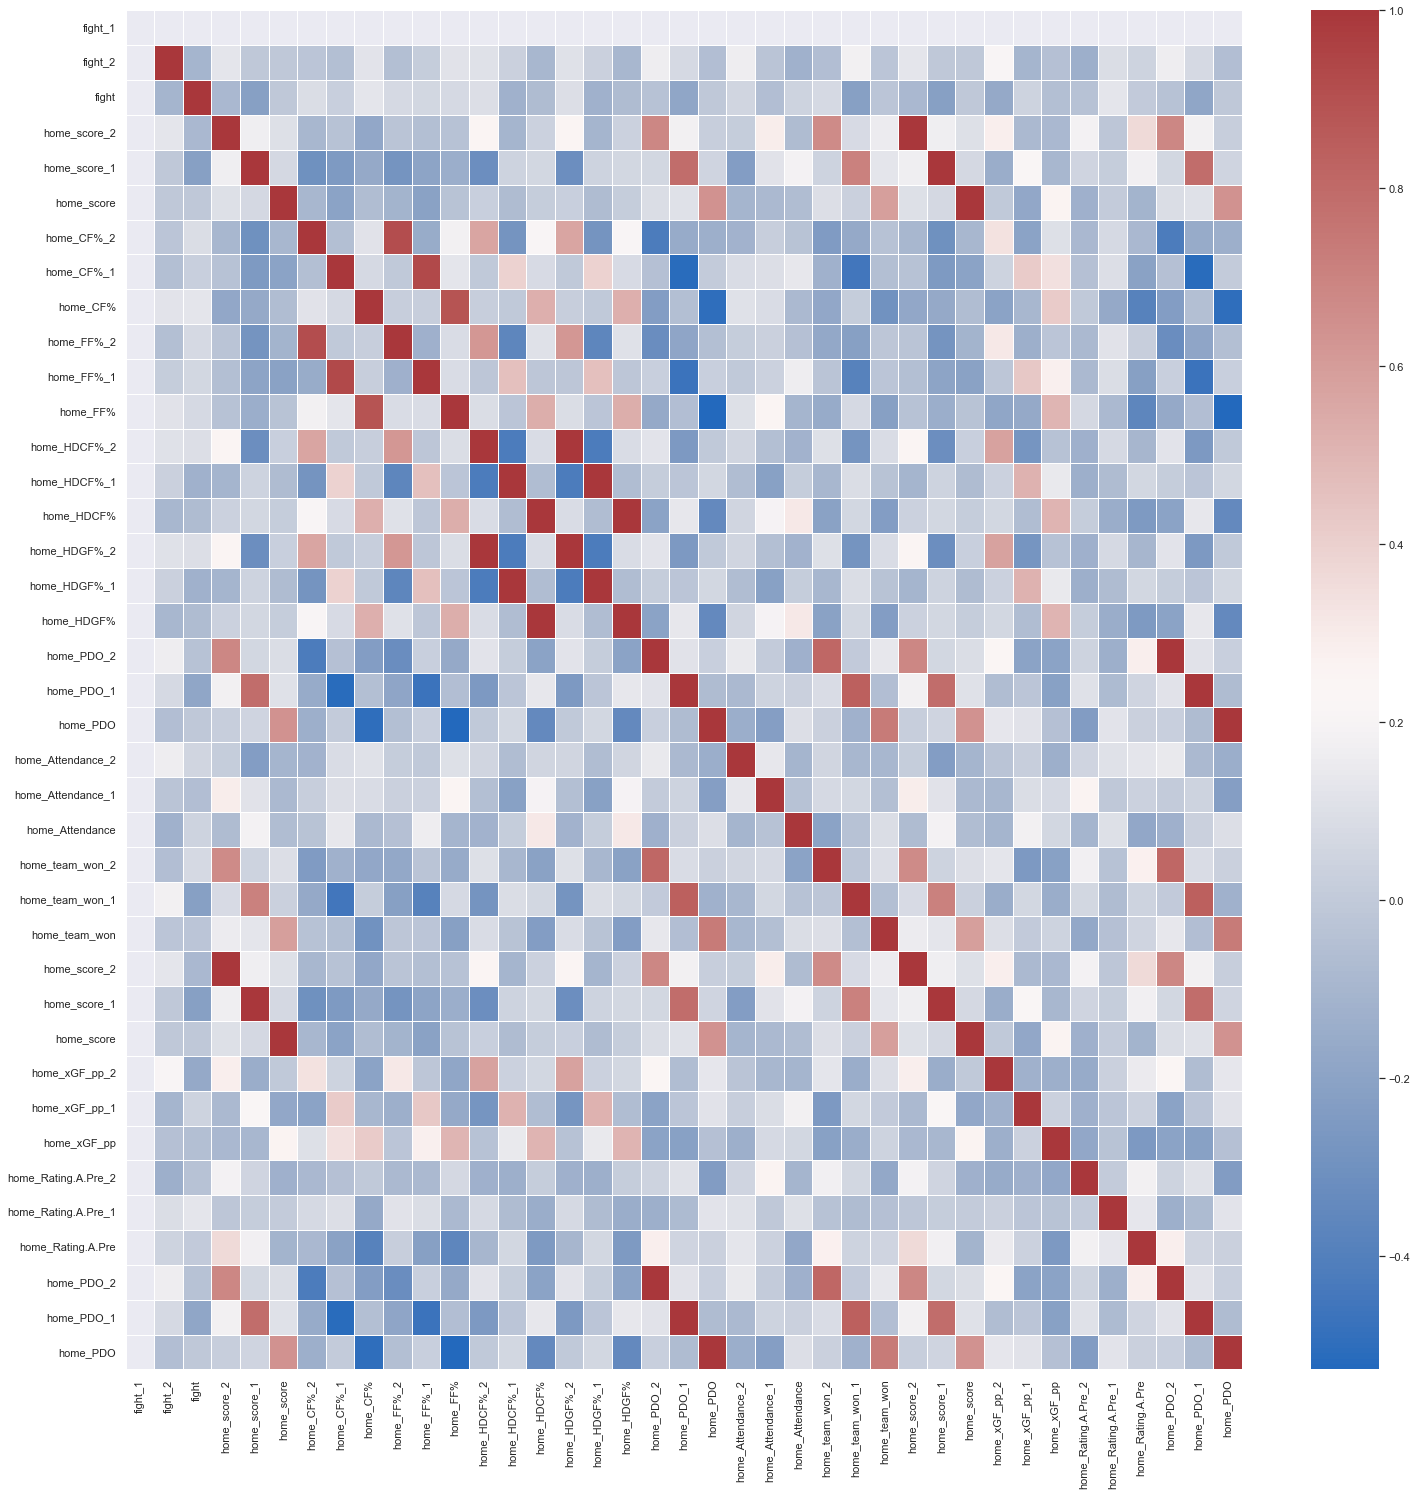

In [59]:
final_dataframe = pd.DataFrame()

teams = list(fight['home_team'].unique())

for team in teams:

    fight_index = set(fight[(fight['home_team'] == 'TOR') | (fight['away_team'] == 'TOR')].index)
    match_index = match[(match['home_team'] == 'TOR') | (match['away_team'] == 'TOR')].index


    df = pd.DataFrame()
    for idx in range(len(match_index)):

        if match_index[idx] in fight_index:
#             two_matches.append(match_index[idx])
            s1 = match.iloc[match_index[idx], :]
            s1 = s1.add_suffix('_1')

            if idx+1 < len(match_index):
#                 two_matches.append(match_index[idx+1])
                s2 = match.iloc[match_index[idx+1], :]
                s2 = s2.add_suffix('_2')
                s1 = pd.concat([s1,s2])

            if idx+2 < len(match_index):
#                 two_matches.append(match_index[idx+2])
                s3 = match.iloc[match_index[idx+2], :]
                s1 = pd.concat([s1,s3])
            display(s1)
            df = df.append(s1, ignore_index=True)
    df = df[features]
    print('Team Name:', team)
    sns.heatmap(df.corr(), linewidths=1, cmap = 'vlag')
    sns.set(rc = {'figure.figsize':(25,25)})
    plt.show()
    final_dataframe = final_dataframe.append(df, ignore_index = True)
    
                                           

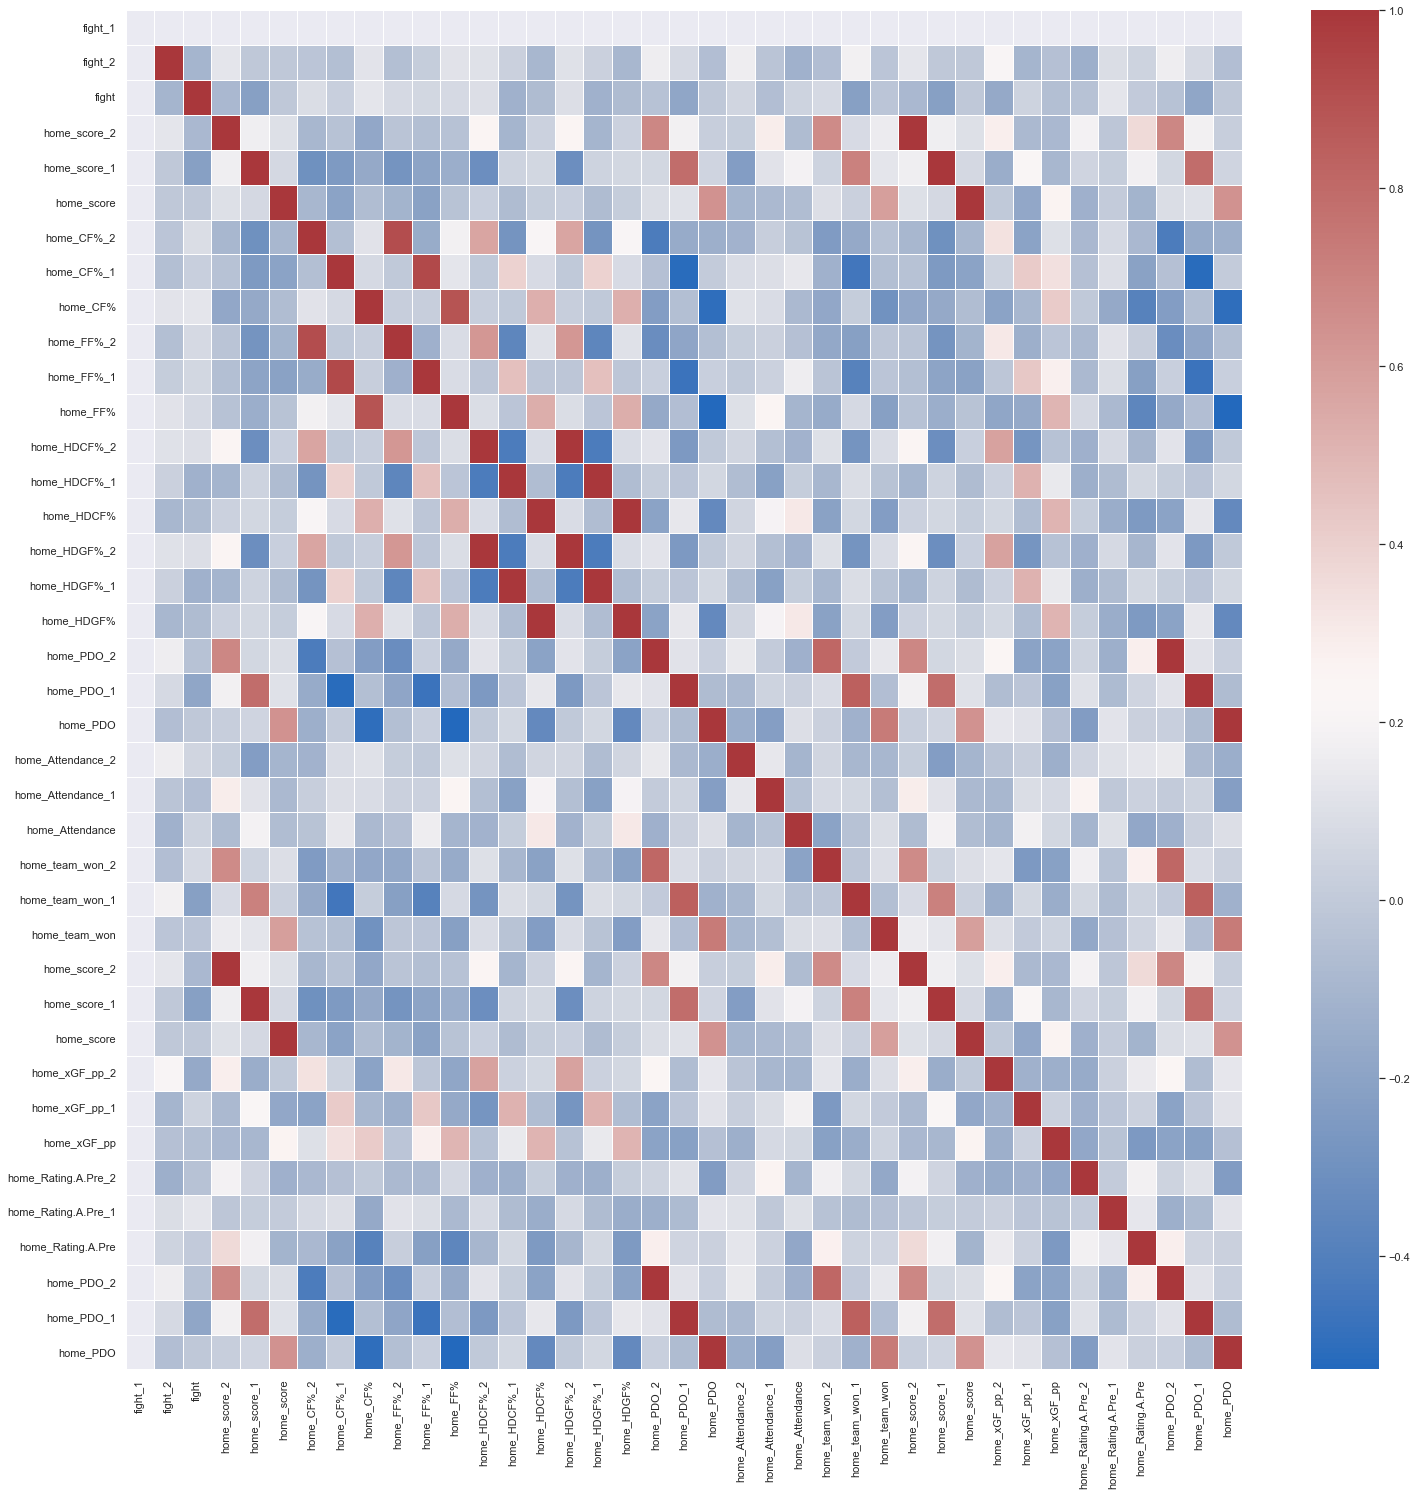

In [60]:
sns.heatmap(final_dataframe.corr(), linewidths=1, cmap = 'vlag')
sns.set(rc = {'figure.figsize':(25,25)})
plt.show()

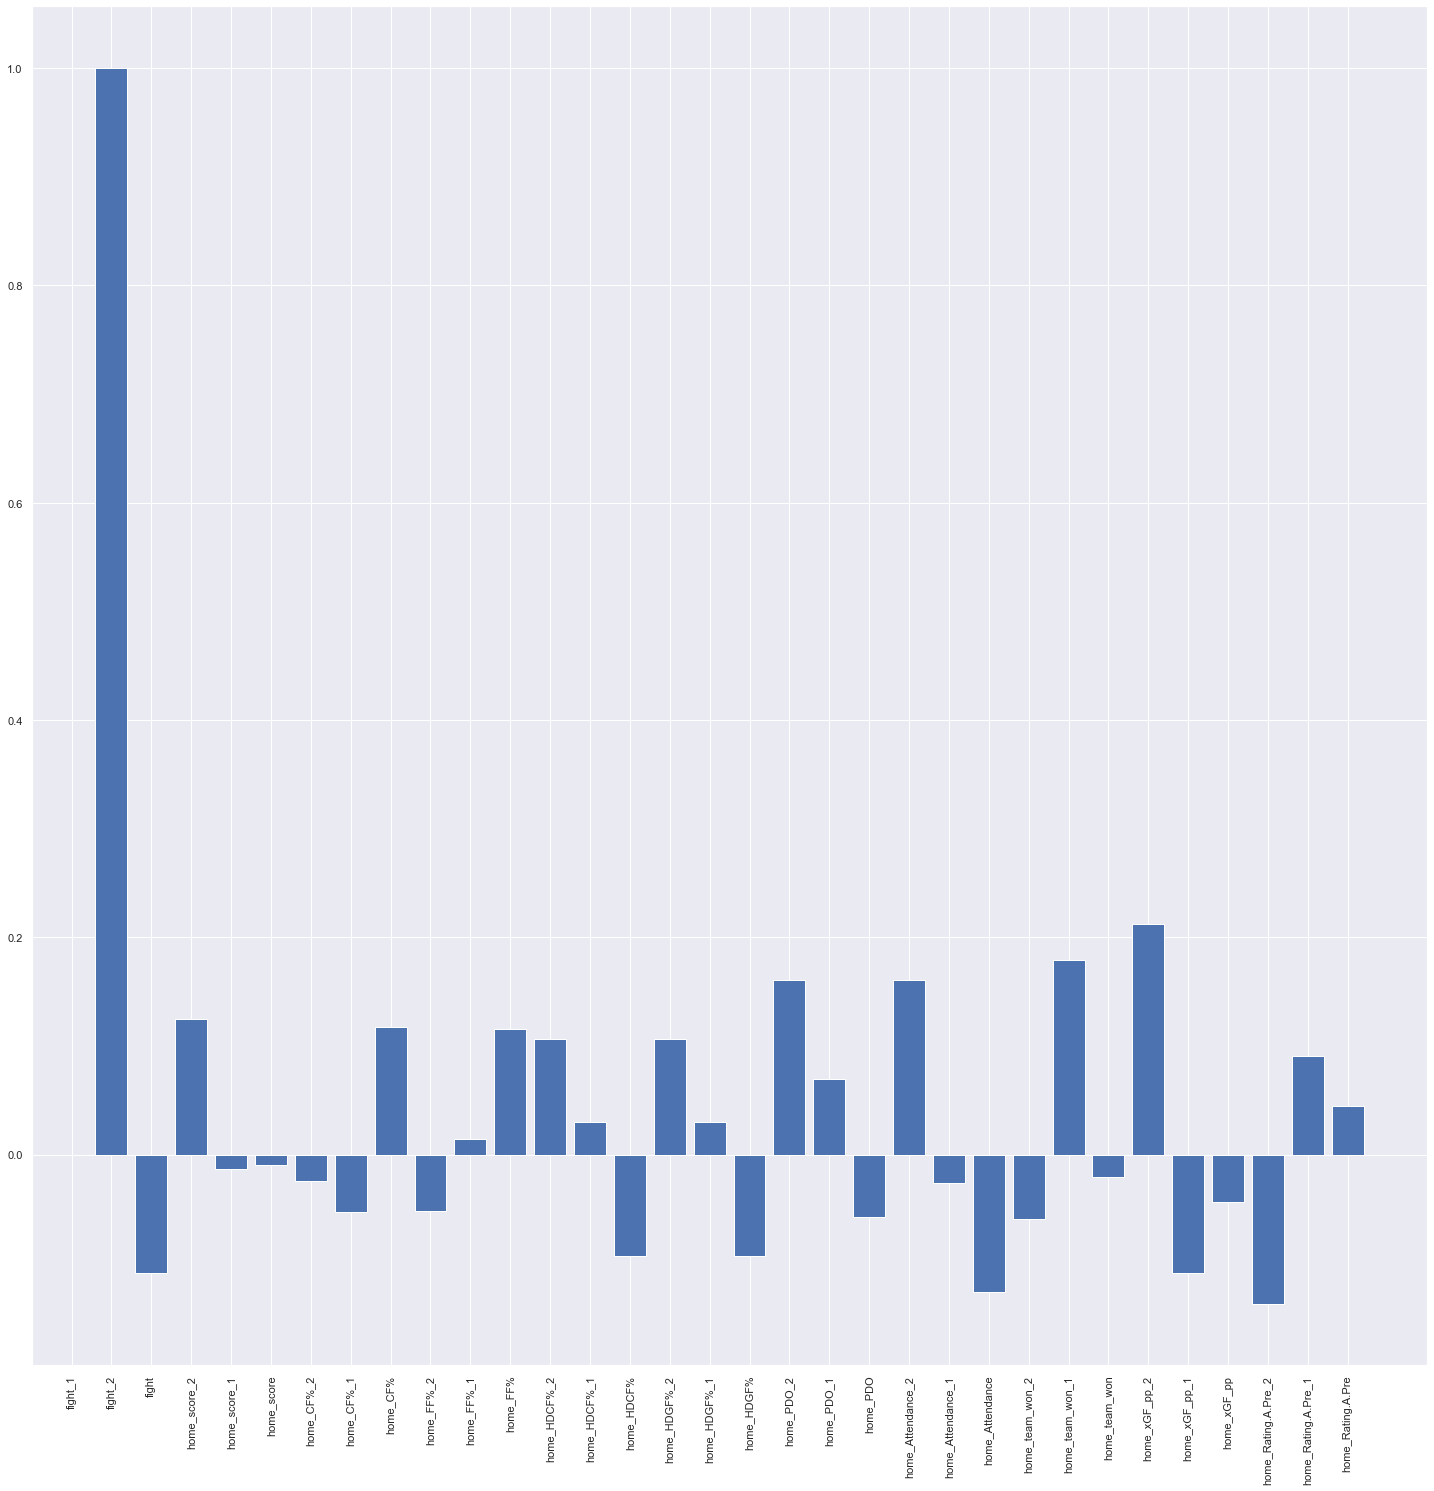

In [72]:
plt.bar(final_dataframe.columns, final_dataframe.corr().iloc[1, :])
plt.xticks(rotation ='vertical')
plt.show()

In [73]:
final_dataframe.columns

Index(['fight_1', 'fight_2', 'fight', 'home_score_2', 'home_score_1',
       'home_score', 'home_CF%_2', 'home_CF%_1', 'home_CF%', 'home_FF%_2',
       'home_FF%_1', 'home_FF%', 'home_HDCF%_2', 'home_HDCF%_1', 'home_HDCF%',
       'home_HDGF%_2', 'home_HDGF%_1', 'home_HDGF%', 'home_PDO_2',
       'home_PDO_1', 'home_PDO', 'home_Attendance_2', 'home_Attendance_1',
       'home_Attendance', 'home_team_won_2', 'home_team_won_1',
       'home_team_won', 'home_score_2', 'home_score_1', 'home_score',
       'home_xGF_pp_2', 'home_xGF_pp_1', 'home_xGF_pp', 'home_Rating.A.Pre_2',
       'home_Rating.A.Pre_1', 'home_Rating.A.Pre', 'home_PDO_2', 'home_PDO_1',
       'home_PDO'],
      dtype='object')